<a href="https://colab.research.google.com/github/Engr-Umer/Engr-Umer/blob/main/Forecasting_using_ARIMA_and_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data-driven Strategy for Short-Term Load Forecasting of Power Systems**
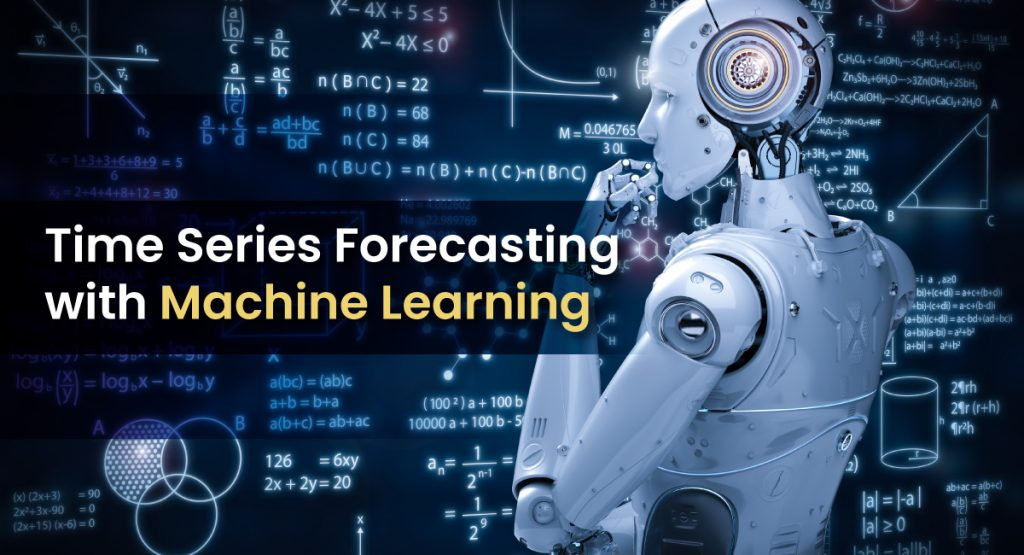
## Supervisors:


*   **Dr. Mansoor Ashraf (University of Engineering & Technology, Taxila)**
*   **Engr. Faizan Hamayat (National Center for Physics, Islamabad)**


## Group Members:



*   Muhammad Umer Mujahid
*   Muhammad Zahadat Abdullah
*   Muhammad Faizan Nusrat




**Table Of Contents**
1. Data Pre-processing
2. Data Transformation
3. Data Visualization
4. Correlation between features
5. Time-Series Analysis
6. Anomaly Detection
7. Time-Series Forecasting using Baseline Method
8. Time-Series Forecasting using ARIMA Method
9. Time-Series Forecasting using LSTM Method

In [ ]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import time

from sklearn.ensemble import IsolationForest
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.layers import LSTM, Dense, Dropout
from keras.regularizers import l2
from keras.optimizers import Adam

## Part 1 - Data Pre-processing

**Import CSV file from Google Drive.**

In [ ]:
from google.colab import drive
drive.mount ("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
home=pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/FYP-Data.csv')
home.head()
home

<ipython-input-7-40f5ef1f76e8>:1: DtypeWarning: Columns (0,27) have mixed types. Specify dtype option on import or set low_memory=False.
  home=pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/FYP-Data.csv')


time  use [kW]  gen [kW]  House overall [kW]  Dishwasher [kW]  \
0       1451624400  0.932833  0.003483            0.932833         0.000033   
1       1451624401  0.934333  0.003467            0.934333         0.000000   
2       1451624402  0.931817  0.003467            0.931817         0.000017   
3       1451624403  1.022050  0.003483            1.022050         0.000017   
4       1451624404  1.139400  0.003467            1.139400         0.000133   
...            ...       ...       ...                 ...              ...   
503906  1452128306  1.599333  0.003233            1.599333         0.000050   
503907  1452128307  1.924267  0.003217            1.924267         0.000033   
503908  1452128308  1.978200  0.003217            1.978200         0.000050   
503909  1452128309  1.990950  0.003233            1.990950         0.000050   
503910           \       NaN       NaN                 NaN              NaN   

        Furnace 1 [kW]  Furnace 2 [kW]  Home office [kW]  Fridge [kW]  \
0             0.020700        0.061917          0.442633     0.124150   
1             0.020717        0.063817          0.444067     0.124000   
2             0.020700        0.062317          0.446067     0.123533   
3             0.106900        0.068517          0.446583     0.123133   
4             0.236933        0.063983          0.446533     0.122850   
...                ...             ...               ...          ...   
503906        0.104017        0.625033          0.041750     0.005233   
503907        0.422383        0.637733          0.042033     0.004983   
503908        0.495667        0.620367          0.042100     0.005333   
503909        0.494700        0.634133          0.042100     0.004917   
503910             NaN             NaN               NaN          NaN   

        Wine cellar [kW]  ...  visibility     summary  apparentTemperature  \
0               0.006983  ...       10.00       Clear                29.26   
1               0.006983  ...       10.00       Clear                29.26   
2               0.006983  ...       10.00       Clear                29.26   
3               0.006983  ...       10.00       Clear                29.26   
4               0.006850  ...       10.00       Clear                29.26   
...                  ...  ...         ...         ...                  ...   
503906          0.008433  ...        8.74  Light Rain                29.45   
503907          0.008467  ...        8.74  Light Rain                29.45   
503908          0.008233  ...        8.74  Light Rain                29.45   
503909          0.008133  ...        8.74  Light Rain                29.45   
503910               NaN  ...         NaN         NaN                  NaN   

        pressure  windSpeed  cloudCover  windBearing  precipIntensity  \
0        1016.91       9.18  cloudCover        282.0           0.0000   
1        1016.91       9.18  cloudCover        282.0           0.0000   
2        1016.91       9.18  cloudCover        282.0           0.0000   
3        1016.91       9.18  cloudCover        282.0           0.0000   
4        1016.91       9.18  cloudCover        282.0           0.0000   
...          ...        ...         ...          ...              ...   
503906   1011.49       6.72        0.31        186.0           0.0101   
503907   1011.49       6.72        0.31        186.0           0.0101   
503908   1011.49       6.72        0.31        186.0           0.0101   
503909   1011.49       6.72        0.31        186.0           0.0101   
503910       NaN        NaN         NaN          NaN              NaN   

        dewPoint  precipProbability  
0          24.40               0.00  
1          24.40               0.00  
2          24.40               0.00  
3          24.40               0.00  
4          24.40               0.00  
...          ...                ...  
503906     31.27               0.51  
503907     31.27               0.51  
503908     31.27               0

In [ ]:
home.tail(5)

time  use [kW]  gen [kW]  House overall [kW]  Dishwasher [kW]  \
503906  1452128306  1.599333  0.003233            1.599333         0.000050   
503907  1452128307  1.924267  0.003217            1.924267         0.000033   
503908  1452128308  1.978200  0.003217            1.978200         0.000050   
503909  1452128309  1.990950  0.003233            1.990950         0.000050   
503910           \       NaN       NaN                 NaN              NaN   

        Furnace 1 [kW]  Furnace 2 [kW]  Home office [kW]  Fridge [kW]  \
503906        0.104017        0.625033          0.041750     0.005233   
503907        0.422383        0.637733          0.042033     0.004983   
503908        0.495667        0.620367          0.042100     0.005333   
503909        0.494700        0.634133          0.042100     0.004917   
503910             NaN             NaN               NaN          NaN   

        Wine cellar [kW]  ...  visibility     summary  apparentTemperature  \
503906          0.008433  ...        8.74  Light Rain                29.45   
503907          0.008467  ...        8.74  Light Rain                29.45   
503908          0.008233  ...        8.74  Light Rain                29.45   
503909          0.008133  ...        8.74  Light Rain                29.45   
503910               NaN  ...         NaN         NaN                  NaN   

        pressure  windSpeed  cloudCover  windBearing  precipIntensity  \
503906   1011.49       6.72        0.31        186.0           0.0101   
503907   1011.49       6.72        0.31        186.0           0.0101   
503908   1011.49       6.72        0.31        186.0           0.0101   
503909   1011.49       6.72        0.31        186.0           0.0101   
503910       NaN        NaN         NaN          NaN              NaN   

        dewPoint  precipProbability  
503906     31.27               0.51  
503907     31.27               0.51  
503908     31.27               0.51  
503909     31.27               0.51  
503910       NaN                NaN  

[5 rows x 32 columns]

**Remove the last row that contains invalid values.**

In [ ]:
#removing the last row as it is invalid
home=home[0:-1]
home

time  use [kW]  gen [kW]  House overall [kW]  Dishwasher [kW]  \
0       1451624400  0.932833  0.003483            0.932833         0.000033   
1       1451624401  0.934333  0.003467            0.934333         0.000000   
2       1451624402  0.931817  0.003467            0.931817         0.000017   
3       1451624403  1.022050  0.003483            1.022050         0.000017   
4       1451624404  1.139400  0.003467            1.139400         0.000133   
...            ...       ...       ...                 ...              ...   
503905  1452128305  1.601233  0.003183            1.601233         0.000050   
503906  1452128306  1.599333  0.003233            1.599333         0.000050   
503907  1452128307  1.924267  0.003217            1.924267         0.000033   
503908  1452128308  1.978200  0.003217            1.978200         0.000050   
503909  1452128309  1.990950  0.003233            1.990950         0.000050   

        Furnace 1 [kW]  Furnace 2 [kW]  Home office [kW]  Fridge [kW]  \
0             0.020700        0.061917          0.442633     0.124150   
1             0.020717        0.063817          0.444067     0.124000   
2             0.020700        0.062317          0.446067     0.123533   
3             0.106900        0.068517          0.446583     0.123133   
4             0.236933        0.063983          0.446533     0.122850   
...                ...             ...               ...          ...   
503905        0.085267        0.642417          0.041783     0.005267   
503906        0.104017        0.625033          0.041750     0.005233   
503907        0.422383        0.637733          0.042033     0.004983   
503908        0.495667        0.620367          0.042100     0.005333   
503909        0.494700        0.634133          0.042100     0.004917   

        Wine cellar [kW]  ...  visibility     summary  apparentTemperature  \
0               0.006983  ...       10.00       Clear                29.26   
1               0.006983  ...       10.00       Clear                29.26   
2               0.006983  ...       10.00       Clear                29.26   
3               0.006983  ...       10.00       Clear                29.26   
4               0.006850  ...       10.00       Clear                29.26   
...                  ...  ...         ...         ...                  ...   
503905          0.008667  ...        8.74  Light Rain                29.45   
503906          0.008433  ...        8.74  Light Rain                29.45   
503907          0.008467  ...        8.74  Light Rain                29.45   
503908          0.008233  ...        8.74  Light Rain                29.45   
503909          0.008133  ...        8.74  Light Rain                29.45   

        pressure  windSpeed  cloudCover  windBearing  precipIntensity  \
0        1016.91       9.18  cloudCover        282.0           0.0000   
1        1016.91       9.18  cloudCover        282.0           0.0000   
2        1016.91       9.18  cloudCover        282.0           0.0000   
3        1016.91       9.18  cloudCover        282.0           0.0000   
4        1016.91       9.18  cloudCover        282.0           0.0000   
...          ...        ...         ...          ...              ...   
503905   1011.49       6.72        0.31        186.0           0.0101   
503906   1011.49       6.72        0.31        186.0           0.0101   
503907   1011.49       6.72        0.31        186.0           0.0101   
503908   1011.49       6.72        0.31        186.0           0.0101   
503909   1011.49       6.72        0.31        186.0           0.0101   

        dewPoint  precipProbability  
0          24.40               0.00  
1          24.40               0.00  
2          24.40               0.00  
3          24.40               0.00  
4          24.40               0.00  
...          ...                ...  
503905     31.27               0.51  
503906     31.27               0.51  
503907     31.27               0

**The column names contain the unit value in the title. Remove the [kW] the columns.**

In [ ]:
#Removing the [KW] from column names
home.columns = [col.replace(' [kW]', '') for col in home.columns]
home.columns

Index(['time', 'use', 'gen', 'House overall', 'Dishwasher', 'Furnace 1',
       'Furnace 2', 'Home office', 'Fridge', 'Wine cellar', 'Garage door',
       'Kitchen 12', 'Kitchen 14', 'Kitchen 38', 'Barn', 'Well', 'Microwave',
       'Living room', 'Solar', 'temperature', 'icon', 'humidity', 'visibility',
       'summary', 'apparentTemperature', 'pressure', 'windSpeed', 'cloudCover',
       'windBearing', 'precipIntensity', 'dewPoint', 'precipProbability'],
      dtype='object')

In [ ]:
home.head()

time       use       gen  House overall  Dishwasher  Furnace 1  \
0  1451624400  0.932833  0.003483       0.932833    0.000033   0.020700   
1  1451624401  0.934333  0.003467       0.934333    0.000000   0.020717   
2  1451624402  0.931817  0.003467       0.931817    0.000017   0.020700   
3  1451624403  1.022050  0.003483       1.022050    0.000017   0.106900   
4  1451624404  1.139400  0.003467       1.139400    0.000133   0.236933   

   Furnace 2  Home office    Fridge  Wine cellar  ...  visibility  summary  \
0   0.061917     0.442633  0.124150     0.006983  ...        10.0    Clear   
1   0.063817     0.444067  0.124000     0.006983  ...        10.0    Clear   
2   0.062317     0.446067  0.123533     0.006983  ...        10.0    Clear   
3   0.068517     0.446583  0.123133     0.006983  ...        10.0    Clear   
4   0.063983     0.446533  0.122850     0.006850  ...        10.0    Clear   

   apparentTemperature  pressure  windSpeed  cloudCover  windBearing  \
0                29.26   1016.91       9.18  cloudCover        282.0   
1                29.26   1016.91       9.18  cloudCover        282.0   
2                29.26   1016.91       9.18  cloudCover        282.0   
3                29.26   1016.91       9.18  cloudCover        282.0   
4                29.26   1016.91       9.18  cloudCover        282.0   

   precipIntensity  dewPoint  precipProbability  
0              0.0      24.4                0.0  
1              0.0      24.4                0.0  
2              0.0      24.4                0.0  
3              0.0      24.4                0.0  
4              0.0      24.4                0.0  

[5 rows x 32 columns]

**There are multiple columns of similar rooms in the dataset. For example, there is 'Furnace 1' and 'Furnace 2'. We can remove the additional columns by summing them.**

In [ ]:
#Summing the columns 'Furnace 1' and 'Furnace 2', since we only need the total energy usage by both the furnaces

home['Furnace'] = home[['Furnace 1', 'Furnace 2']].sum(axis=1)


<ipython-input-12-3059fefa9853>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  home['Furnace'] = home[['Furnace 1', 'Furnace 2']].sum(axis=1)


In [ ]:
#Finding the average usage of all kitchens('Kitchen 12','Kitchen 14','Kitchen 38')
home['Kitchen'] = home[['Kitchen 12','Kitchen 14','Kitchen 38']].mean(axis=1)

<ipython-input-13-d00bdef445e0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  home['Kitchen'] = home[['Kitchen 12','Kitchen 14','Kitchen 38']].mean(axis=1)


In [ ]:
#Dropping old columns on which the aggregation have been done
home = home.drop(['Furnace 1','Furnace 2','Kitchen 12','Kitchen 14','Kitchen 38'], axis=1)

In [ ]:
home.head()

time       use       gen  House overall  Dishwasher  Home office  \
0  1451624400  0.932833  0.003483       0.932833    0.000033     0.442633   
1  1451624401  0.934333  0.003467       0.934333    0.000000     0.444067   
2  1451624402  0.931817  0.003467       0.931817    0.000017     0.446067   
3  1451624403  1.022050  0.003483       1.022050    0.000017     0.446583   
4  1451624404  1.139400  0.003467       1.139400    0.000133     0.446533   

     Fridge  Wine cellar  Garage door      Barn  ...  apparentTemperature  \
0  0.124150     0.006983     0.013083  0.031350  ...                29.26   
1  0.124000     0.006983     0.013117  0.031500  ...                29.26   
2  0.123533     0.006983     0.013083  0.031517  ...                29.26   
3  0.123133     0.006983     0.013000  0.031500  ...                29.26   
4  0.122850     0.006850     0.012783  0.031500  ...                29.26   

   pressure  windSpeed  cloudCover  windBearing precipIntensity  dewPoint  \
0   1016.91       9.18  cloudCover        282.0             0.0      24.4   
1   1016.91       9.18  cloudCover        282.0             0.0      24.4   
2   1016.91       9.18  cloudCover        282.0             0.0      24.4   
3   1016.91       9.18  cloudCover        282.0             0.0      24.4   
4   1016.91       9.18  cloudCover        282.0             0.0      24.4   

   precipProbability   Furnace   Kitchen  
0                0.0  0.082617  0.000189  
1                0.0  0.084533  0.000189  
2                0.0  0.083017  0.000206  
3                0.0  0.175417  0.000217  
4                0.0  0.300917  0.000261  

[5 rows x 29 columns]

**The column 'time' is in unix timestamp. Convert the timestamp to date and time.**

In [ ]:
#Finding the start time
print('start', time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(int(home['time'].iloc[0]))))

start 2016-01-01 05:00:00


In [ ]:
#Converting the unix timestamp values in the column 'time' to a readable date format
#Setting freq= 'min' since readings are being taken in a time span of one min
time_index = pd.date_range('2016-01-01 05:00' , periods = len(home) , freq='min')
time_index = pd.DatetimeIndex(time_index)
home=home.set_index(time_index)
home=home.drop(['time'] , axis=1)
home.iloc[np.r_[0:5 , -5:0]].iloc[:,0]

2016-01-01 05:00:00    0.932833
2016-01-01 05:01:00    0.934333
2016-01-01 05:02:00    0.931817
2016-01-01 05:03:00    1.022050
2016-01-01 05:04:00    1.139400
2016-12-16 03:25:00    1.601233
2016-12-16 03:26:00    1.599333
2016-12-16 03:27:00    1.924267
2016-12-16 03:28:00    1.978200
2016-12-16 03:29:00    1.990950
Name: use, dtype: float64

**Examine the data type of each column.**

In [ ]:
#Display dataframe info
home.info()
home.describe().transpose()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 503910 entries, 2016-01-01 05:00:00 to 2016-12-16 03:29:00
Freq: T
Data columns (total 28 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   use                  503910 non-null  float64
 1   gen                  503910 non-null  float64
 2   House overall        503910 non-null  float64
 3   Dishwasher           503910 non-null  float64
 4   Home office          503910 non-null  float64
 5   Fridge               503910 non-null  float64
 6   Wine cellar          503910 non-null  float64
 7   Garage door          503910 non-null  float64
 8   Barn                 503910 non-null  float64
 9   Well                 503910 non-null  float64
 10  Microwave            503910 non-null  float64
 11  Living room          503910 non-null  float64
 12  Solar                503910 non-null  float64
 13  temperature          503910 non-null  float64
 14  icon                 50391

count         mean         std         min  \
use                  503910.0     0.858962    1.058207    0.000000   
gen                  503910.0     0.076229    0.128428    0.000000   
House overall        503910.0     0.858962    1.058207    0.000000   
Dishwasher           503910.0     0.031368    0.190951    0.000000   
Home office          503910.0     0.081287    0.104466    0.000083   
Fridge               503910.0     0.063556    0.076199    0.000067   
Wine cellar          503910.0     0.042137    0.057967    0.000017   
Garage door          503910.0     0.014139    0.014292    0.000017   
Barn                 503910.0     0.058530    0.202706    0.000000   
Well                 503910.0     0.015642    0.137841    0.000000   
Microwave            503910.0     0.010983    0.098859    0.000000   
Living room          503910.0     0.035313    0.096056    0.000000   
Solar                503910.0     0.076229    0.128428    0.000000   
temperature          503910.0    50.741935   19.113807  -12.640000   
humidity             503910.0     0.664085    0.194389    0.130000   
visibility           503910.0     9.253444    1.611186    0.270000   
apparentTemperature  503910.0    48.263382   22.027916  -32.080000   
pressure             503910.0  1016.301625    7.895185  986.400000   
windSpeed            503910.0     6.649936    3.982716    0.000000   
windBearing          503910.0   202.356843  106.520474    0.000000   
precipIntensity      503910.0     0.002598    0.011257    0.000000   
dewPoint             503910.0    38.694013   19.087939  -27.240000   
precipProbability    503910.0     0.056453    0.165836    0.000000   
Furnace              503910.0     0.235989    0.273885    0.000300   
Kitchen              503910.0     0.003263    0.026628    0.000000   

                             25%          50%          75%          max  
use                     0.367667     0.562333     0.970250    14.714567  
gen                     0.003367     0.004283     0.083917     0.613883  
House overall           0.367667     0.562333     0.970250    14.714567  
Dishwasher              0.000000     0.000017     0.000233     1.401767  
Home office             0.040383     0.042217     0.068283     0.971750  
Fridge                  0.005083     0.005433     0.125417     0.851267  
Wine cellar             0.007133     0.008083     0.053192     1.273933  
Garage door             0.012733     0.012933     0.013100     1.088983  
Barn                    0.029833     0.031317     0.032883     7.027900  
Well                    0.000983     0.001000     0.001017     1.633017  
Microwave               0.003617     0.004000     0.004067     1.929800  
Living room             0.001483     0.001617     0.001750     0.465217  
Solar                   0.003367     0.004283     0.083917     0.613883  
temperature            35.770000    50.320000    66.260000    93.720000  
humidity                0.510000     0.680000     0.840000     0.980000  
visibility              9.420000    10.000000    10.000000    10.000000  
apparentTemperature    31.090000    50.320000    66.260000   101.120000  
pressure             1011.290000  1016.530000  1021.480000  1042.460000  
windSpeed               3.660000     5.930000     8.940000    22.910000  
windBearing           148.000000   208.000000   295.000000   359.000000  
precipIntensity         0.000000     0.000000     0.000000     0.191000  
dewPoint               24.600000    39.030000    54.790000    75.490000  
precipProbability       0.000000     0.000000     0.000000     0.840000  
Furnace                 0.085300     0.088950     0.219417     2.472633  
Kitchen                 0.000200     0.000250     0.000283     0.755289

In [ ]:
#Drop columns 'icon' and 'summary' as their data type is 'object'
home = home.drop(['icon', 'summary'], axis=1)

In [ ]:
#Examining the unique values of the attribute 'cloudCover' to see if there is any invalid data that needs to be handled
home['cloudCover'].unique()

array(['cloudCover', '0.75', '0', '1', '0.31', '0.44', '0.13', '0.19',
       '0.25', '0.16', '0.21', '0.15', '0.14', '0.27', '0.28', '0.17',
       '0.05', '0.1', '0.26', '0.29', '0.11', '0.09', '0.12', '0.06',
       '0.02', '0.08', '0.04', '0.35', '0.22', '0.23', '0.54', '0.39',
       '0.03', '0.07', '0.76', '0.62', '0.18', '0.79', '0.48', '0.24',
       '0.57', 0.24, 1.0, 0.31, 0.28, 0.15, 0.41, 0.1, 0.12, 0.08, 0.09,
       0.19, 0.04, 0.05, 0.29, 0.27, 0.35, 0.18, 0.06, 0.03, 0.11, 0.14,
       0.25, 0.78, 0.0, 0.16, 0.21, 0.23, 0.17, 0.75, 0.26, 0.2, 0.76,
       0.13, 0.77, 0.46, 0.07, 0.55, 0.02, 0.01, 0.51, 0.47, 0.5, 0.4,
       0.3, 0.22, 0.43, 0.33, 0.6, 0.68, 0.66, 0.45, 0.34, 0.52, 0.67,
       0.48, 0.49, 0.39, 0.37, 0.62, 0.36, 0.79, 0.61, 0.38, 0.42, 0.53,
       0.63, 0.44, 0.54, 0.32, 0.56, 0.58, 0.72, 0.57, 0.73, 0.71, 0.64,
       0.59], dtype=object)

In [ ]:
#We see that for some rows we have an invalid value for cloudCover.
home[home['cloudCover'] == 'cloudCover'].shape

(58, 26)

In [ ]:
#We replace these missing values with the next valid observation we have
home['cloudCover'].replace(['cloudCover'] , method='bfill' , inplace = True)
home['cloudCover'] = home['cloudCover'].astype('float')

In [ ]:
home['cloudCover']

2016-01-01 05:00:00    0.75
2016-01-01 05:01:00    0.75
2016-01-01 05:02:00    0.75
2016-01-01 05:03:00    0.75
2016-01-01 05:04:00    0.75
                       ... 
2016-12-16 03:25:00    0.31
2016-12-16 03:26:00    0.31
2016-12-16 03:27:00    0.31
2016-12-16 03:28:00    0.31
2016-12-16 03:29:00    0.31
Freq: T, Name: cloudCover, Length: 503910, dtype: float64

In [ ]:
#It seems use and House overall show the same data
home[['use', 'House overall']].head()

use  House overall
2016-01-01 05:00:00  0.932833       0.932833
2016-01-01 05:01:00  0.934333       0.934333
2016-01-01 05:02:00  0.931817       0.931817
2016-01-01 05:03:00  1.022050       1.022050
2016-01-01 05:04:00  1.139400       1.139400

<Axes: >

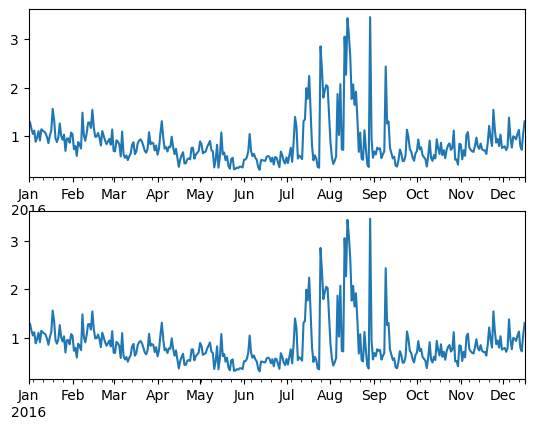

In [ ]:
# Let's visualize these use and House overall to confirm they show the same data so that we could remove one of the columns
fig, axes = plt.subplots (nrows=2, ncols=1)
home['use'].resample('D').mean().plot(ax=axes[0])
home['House overall'].resample('D').mean().plot(ax=axes[1])

In [ ]:
#Since the above plot confirms both the columns indicate the same data lets go ahead and remove 'House overall'
home=home.drop(columns=['House overall'])
home.shape

(503910, 25)

<Axes: >

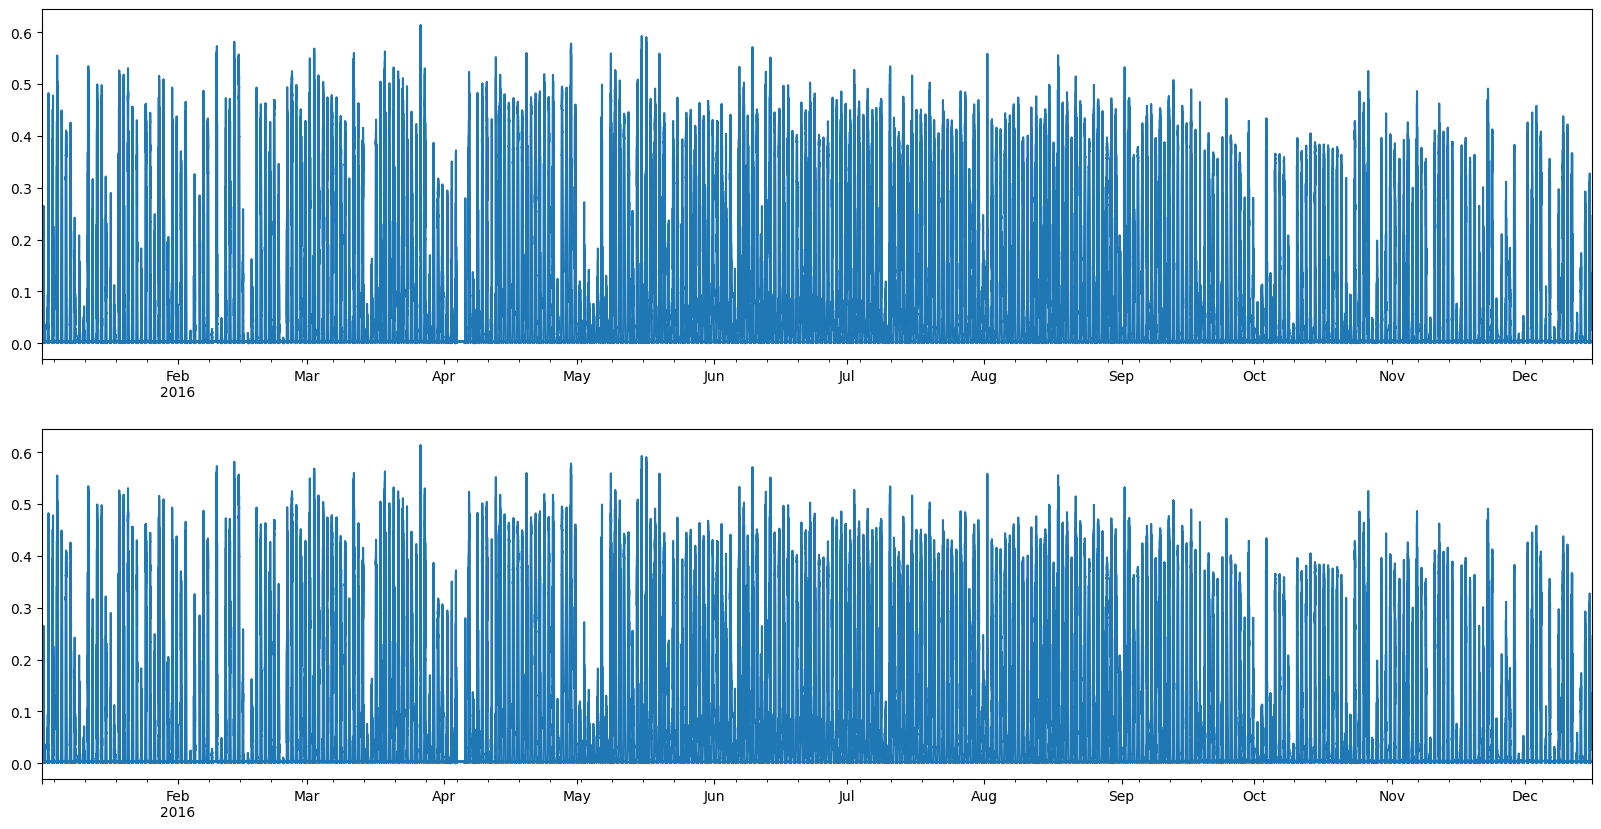

In [ ]:
#Similarly, the attributes 'gen' and 'Solar' show the same data. Let's visualize these two columns to confirm the same
fig, axes = plt.subplots(nrows=2, ncols=1)
home['gen'].plot(ax=axes[0], figsize=(20,10))
home['Solar'].plot(ax=axes[1], figsize=(20,10))

In [ ]:
#Dropping the column 'Solar' since it shows the same data as 'gen'
home=home.drop(columns=['Solar'])
home.shape

(503910, 24)

In [ ]:
# Renaming columns
home.rename(columns={'use': 'Use', 'gen': 'Generation', 'Home office': 'Home Office',
                   'Wine cellar': 'Wine Cellar', 'Garage door': 'Garage Door',
                   'Living room': 'Living Room', 'temperature': 'Temperature',
                   'humidity':'Humidity','visibility': 'Visibility',
                   'apparentTemperature': 'Apparent Temperature',
                   'pressure': 'Pressure', 'windspeed': 'Wind Speed',
                   'cloudCover': 'Cloud Cover', 'windBearing': 'Wind Bearing',
                   'precipIntensity': 'Precipitation Intensity',
                   'dewPoint': 'Dew Point','windSpeed':'Wind Speed',
                   'precipProbability': 'Precipitation Probability'} , inplace=True)

In [ ]:
home.columns

Index(['Use', 'Generation', 'Dishwasher', 'Home Office', 'Fridge',
       'Wine Cellar', 'Garage Door', 'Barn', 'Well', 'Microwave',
       'Living Room', 'Temperature', 'Humidity', 'Visibility',
       'Apparent Temperature', 'Pressure', 'Wind Speed', 'Cloud Cover',
       'Wind Bearing', 'Precipitation Intensity', 'Dew Point',
       'Precipitation Probability', 'Furnace', 'Kitchen'],
      dtype='object')

In [ ]:
home.shape

(503910, 24)

## Part 2 - Data Transformation

In [ ]:
#Creating two separate dataframe objects with energy and weather data respectively.
energy_data = home.filter(items = ['Generation', 'Use', 'Dishwasher',
                                 'Furnace', 'Home Office', 'Fridge',
                                 'Wine Cellar','Garage Door','Kitchen',
                                 'Barn','Well','Microwave','Living Room'])
weather_data = home.filter(items=['Temperature','Humidity', 'Visibility', 'Pressure','Apparent Temperature','Wind Speed','Wind Bearing', 'Dew Point'])

In [ ]:
energy_data.head()

Generation       Use  Dishwasher   Furnace  Home Office  \
2016-01-01 05:00:00    0.003483  0.932833    0.000033  0.082617     0.442633   
2016-01-01 05:01:00    0.003467  0.934333    0.000000  0.084533     0.444067   
2016-01-01 05:02:00    0.003467  0.931817    0.000017  0.083017     0.446067   
2016-01-01 05:03:00    0.003483  1.022050    0.000017  0.175417     0.446583   
2016-01-01 05:04:00    0.003467  1.139400    0.000133  0.300917     0.446533   

                       Fridge  Wine Cellar  Garage Door   Kitchen      Barn  \
2016-01-01 05:00:00  0.124150     0.006983     0.013083  0.000189  0.031350   
2016-01-01 05:01:00  0.124000     0.006983     0.013117  0.000189  0.031500   
2016-01-01 05:02:00  0.123533     0.006983     0.013083  0.000206  0.031517   
2016-01-01 05:03:00  0.123133     0.006983     0.013000  0.000217  0.031500   
2016-01-01 05:04:00  0.122850     0.006850     0.012783  0.000261  0.031500   

                         Well  Microwave  Living Room  
2016-01-01 05:00:00  0.001017   0.004067     0.001517  
2016-01-01 05:01:00  0.001017   0.004067     0.001650  
2016-01-01 05:02:00  0.001000   0.004067     0.001650  
2016-01-01 05:03:00  0.001017   0.004067     0.001617  
2016-01-01 05:04:00  0.001017   0.004067     0.001583

In [ ]:
weather_data.head()

Temperature  Humidity  Visibility  Pressure  \
2016-01-01 05:00:00        36.14      0.62        10.0   1016.91   
2016-01-01 05:01:00        36.14      0.62        10.0   1016.91   
2016-01-01 05:02:00        36.14      0.62        10.0   1016.91   
2016-01-01 05:03:00        36.14      0.62        10.0   1016.91   
2016-01-01 05:04:00        36.14      0.62        10.0   1016.91   

                     Apparent Temperature  Wind Speed  Wind Bearing  Dew Point  
2016-01-01 05:00:00                 29.26        9.18         282.0       24.4  
2016-01-01 05:01:00                 29.26        9.18         282.0       24.4  
2016-01-01 05:02:00                 29.26        9.18         282.0       24.4  
2016-01-01 05:03:00                 29.26        9.18         282.0       24.4  
2016-01-01 05:04:00                 29.26        9.18         282.0       24.4

In [ ]:
#Generating the energy data per day
energy_per_day = energy_data.resample('D').sum()
energy_per_day.head()

Generation          Use  Dishwasher     Furnace  Home Office  \
2016-01-01   18.026200  1366.269517   59.517171  492.020017    64.668783   
2016-01-02   76.051300  1851.521067   63.154404  683.761967   145.570317   
2016-01-03   74.081433  1651.128133  105.508668  613.630533   196.064167   
2016-01-04  108.525017  1500.686017   58.880760  605.129767   180.650867   
2016-01-05  148.107500  1597.968867   72.973254  817.065250   133.360867   

               Fridge  Wine Cellar  Garage Door   Kitchen        Barn  \
2016-01-01  94.740300    29.093367    15.228367  3.873278   99.622950   
2016-01-02  74.851733    24.096767    19.246333  5.154752  185.776967   
2016-01-03  92.149033    32.989533    19.444933  6.364001  146.493667   
2016-01-04  71.016683    20.980700    19.249983  5.782085   47.837017   
2016-01-05  80.135633    30.792300    19.773067  4.918163   50.166067   

                 Well  Microwave  Living Room  
2016-01-01  30.537233  12.961117    77.071667  
2016-01-02  33.688133  12.480300    71.142950  
2016-01-03  31.955233  19.066117    42.779250  
2016-01-04  43.438883  20.249933    93.077467  
2016-01-05  19.157417  16.658967    44.483650

In [ ]:
#Generating the energy data per week
energy_per_week = energy_data.resample('W').sum()
energy_per_week.head()

Generation           Use  Dishwasher      Furnace  Home Office  \
2016-01-03  168.158933   4868.918717  228.180243  1789.412517   406.303267   
2016-01-10  572.221083  10281.065683  322.905918  4309.503517  1060.328917   
2016-01-17  446.667833  10365.530000  415.871596  4661.908917  1036.034600   
2016-01-24  773.163450  11446.274100  328.069396  5650.391533   845.905650   
2016-01-31  636.354167   9294.364817  318.545145  3861.230900   695.367683   

                Fridge  Wine Cellar  Garage Door    Kitchen        Barn  \
2016-01-03  261.741067    86.179667    53.919633  15.392031  431.893583   
2016-01-10  595.732950   180.574800   139.934433  34.102771  691.477933   
2016-01-17  538.311483   201.654983   138.471933  34.200943  467.751483   
2016-01-24  501.469017   177.311500   136.808333  35.232993  871.137733   
2016-01-31  539.017367   195.041583   135.907333  35.082345  851.749650   

                  Well   Microwave  Living Room  
2016-01-03   96.180600   44.507533   190.993867  
2016-01-10  161.061051  104.610683   475.712567  
2016-01-17  165.124600   90.808833   446.148850  
2016-01-24  173.225900   88.269900   431.383199  
2016-01-31  170.518450  101.335400   376.918150

In [ ]:
#Generating the energy data per month
energy_per_month = energy_data.resample('M').sum()
energy_per_month.head()

Generation           Use   Dishwasher       Furnace  Home Office  \
2016-01-31  2596.565467  46256.153317  1613.572299  20272.447383  4043.940117   
2016-02-29  2704.221700  41558.035267  1399.090831  19171.333067  2850.642583   
2016-03-31  3795.807367  34026.880883  1506.501997  13046.526433  3511.736400   
2016-04-30  3893.534950  29662.845900  1443.403725   9393.876000  3173.250717   
2016-05-31  3670.712050  25550.843150  1180.812253   5957.877471  2768.990462   

                 Fridge  Wine Cellar  Garage Door     Kitchen         Barn  \
2016-01-31  2436.271883   840.762533   605.041667  154.011083  3314.010383   
2016-02-29  2225.080050   832.488483   572.159733  137.273728  2817.221550   
2016-03-31  2393.101050  1268.479517   614.368167  134.469697  1791.915983   
2016-04-30  2454.983017  1548.467600   627.425083  103.812260  2626.763767   
2016-05-31  2648.659933  1561.469854   617.532683   99.109124  3321.740146   

                  Well   Microwave  Living Room  
2016-01-31  766.110601  429.532350  1921.156633  
2016-02-29  741.079083  388.025434  1408.870900  
2016-03-31  731.827333  426.910884  1585.980033  
2016-04-30  658.356017  488.510350  1571.712033  
2016-05-31  450.940233  406.917284  1179.055583

In [ ]:
#Generating the data per day
data_per_day = home.resample('D').sum()
data_per_day.head()

Use  Generation  Dishwasher  Home Office     Fridge  \
2016-01-01  1366.269517   18.026200   59.517171    64.668783  94.740300   
2016-01-02  1851.521067   76.051300   63.154404   145.570317  74.851733   
2016-01-03  1651.128133   74.081433  105.508668   196.064167  92.149033   
2016-01-04  1500.686017  108.525017   58.880760   180.650867  71.016683   
2016-01-05  1597.968867  148.107500   72.973254   133.360867  80.135633   

            Wine Cellar  Garage Door        Barn       Well  Microwave  ...  \
2016-01-01    29.093367    15.228367   99.622950  30.537233  12.961117  ...   
2016-01-02    24.096767    19.246333  185.776967  33.688133  12.480300  ...   
2016-01-03    32.989533    19.444933  146.493667  31.955233  19.066117  ...   
2016-01-04    20.980700    19.249983   47.837017  43.438883  20.249933  ...   
2016-01-05    30.792300    19.773067   50.166067  19.157417  16.658967  ...   

            Apparent Temperature    Pressure  Wind Speed  Cloud Cover  \
2016-01-01              33989.34  1156803.96     8420.92       763.18   
2016-01-02              35226.44  1460895.76    11733.58       338.40   
2016-01-03              38548.42  1453861.98    10967.42       267.08   
2016-01-04              15936.88  1463662.42    16165.70       218.70   
2016-01-05               3973.98  1489091.46     9592.18        15.76   

            Wind Bearing  Precipitation Intensity  Dew Point  \
2016-01-01      300606.0                   0.1276   27849.26   
2016-01-02      380922.0                   0.0000   26637.98   
2016-01-03      327054.0                   0.0000   30604.26   
2016-01-04      460508.0                   0.0000   14835.90   
2016-01-05      419634.0                   0.0000   -3292.16   

            Precipitation Probability     Furnace   Kitchen  
2016-01-01                       2.32  492.020017  3.873278  
2016-01-02                       0.00  683.761967  5.154752  
2016-01-03                       0.00  613.630533  6.364001  
2016-01-04                       0.00  605.129767  5.782085  
2016-01-05                       0.00  817.065250  4.918163  

[5 rows x 24 columns]

In [ ]:
#Generating the data per week
data_per_week = home.resample('W').sum()
data_per_week.head()

Use  Generation  Dishwasher  Home Office      Fridge  \
2016-01-03   4868.918717  168.158933  228.180243   406.303267  261.741067   
2016-01-10  10281.065683  572.221083  322.905918  1060.328917  595.732950   
2016-01-17  10365.530000  446.667833  415.871596  1036.034600  538.311483   
2016-01-24  11446.274100  773.163450  328.069396   845.905650  501.469017   
2016-01-31   9294.364817  636.354167  318.545145   695.367683  539.017367   

            Wine Cellar  Garage Door        Barn        Well   Microwave  ...  \
2016-01-03    86.179667    53.919633  431.893583   96.180600   44.507533  ...   
2016-01-10   180.574800   139.934433  691.477933  161.061051  104.610683  ...   
2016-01-17   201.654983   138.471933  467.751483  165.124600   90.808833  ...   
2016-01-24   177.311500   136.808333  871.137733  173.225900   88.269900  ...   
2016-01-31   195.041583   135.907333  851.749650  170.518450  101.335400  ...   

            Apparent Temperature     Pressure  Wind Speed  Cloud Cover  \
2016-01-03             107764.20   4071561.70    31121.92      1368.66   
2016-01-10             219394.18  10307420.68    60283.02      2091.16   
2016-01-17             217676.78  10170652.08    71121.46      2607.70   
2016-01-24             122670.56  10244380.24   108330.22       873.92   
2016-01-31             305171.48  10199331.02    74918.20      1157.10   

            Wind Bearing  Precipitation Intensity  Dew Point  \
2016-01-03     1008582.0                   0.1276   85091.50   
2016-01-10     1754670.0                  36.0238  171047.74   
2016-01-17     2137412.0                  15.3004  172398.62   
2016-01-24     2376090.0                   0.8062   70767.78   
2016-01-31     2299440.0                   0.2378  235415.32   

            Precipitation Probability      Furnace    Kitchen  
2016-01-03                       2.32  1789.412517  15.392031  
2016-01-10                     530.70  4309.503517  34.102771  
2016-01-17                     370.04  4661.908917  34.200943  
2016-01-24                      28.42  5650.391533  35.232993  
2016-01-31                       4.06  3861.230900  35.082345  

[5 rows x 24 columns]

In [ ]:
#Generating the data per month
data_per_month = home.resample('M').sum()
data_per_month.head()

Use   Generation   Dishwasher  Home Office       Fridge  \
2016-01-31  46256.153317  2596.565467  1613.572299  4043.940117  2436.271883   
2016-02-29  41558.035267  2704.221700  1399.090831  2850.642583  2225.080050   
2016-03-31  34026.880883  3795.807367  1506.501997  3511.736400  2393.101050   
2016-04-30  29662.845900  3893.534950  1443.403725  3173.250717  2454.983017   
2016-05-31  25550.843150  3670.712050  1180.812253  2768.990462  2648.659933   

            Wine Cellar  Garage Door         Barn        Well   Microwave  \
2016-01-31   840.762533   605.041667  3314.010383  766.110601  429.532350   
2016-02-29   832.488483   572.159733  2817.221550  741.079083  388.025434   
2016-03-31  1268.479517   614.368167  1791.915983  731.827333  426.910884   
2016-04-30  1548.467600   627.425083  2626.763767  658.356017  488.510350   
2016-05-31  1561.469854   617.532683  3321.740146  450.940233  406.917284   

            ...  Apparent Temperature     Pressure  Wind Speed  Cloud Cover  \
2016-01-31  ...             972677.20  44993345.72   345774.82      8098.54   
2016-02-29  ...            1019057.06  42408937.14   335978.38     10598.22   
2016-03-31  ...            1725778.62  45325122.20   348506.48     10633.14   
2016-04-30  ...            1906766.44  43968226.88   279707.68     11887.54   
2016-05-31  ...            2718423.98  45292048.56   272747.04     11204.84   

            Wind Bearing  Precipitation Intensity   Dew Point  \
2016-01-31     9576194.0                  52.4958   734720.96   
2016-02-29     9005914.0                 191.4000   773126.34   
2016-03-31     8826994.0                 102.7296  1266782.82   
2016-04-30     7829250.0                 106.1054  1266699.98   
2016-05-31     8057126.0                 101.3780  2117725.96   

            Precipitation Probability       Furnace     Kitchen  
2016-01-31                     935.54  20272.447383  154.011083  
2016-02-29                    3619.78  19171.333067  137.273728  
2016-03-31                    3029.34  13046.526433  134.469697  
2016-04-30                    2660.28   9393.876000  103.812260  
2016-05-31                    2468.08   5957.877471   99.109124  

[5 rows x 24 columns]

## Part 3 - Data Visualization

<Axes: title={'center': 'Overall energy consumption in kW per day'}>

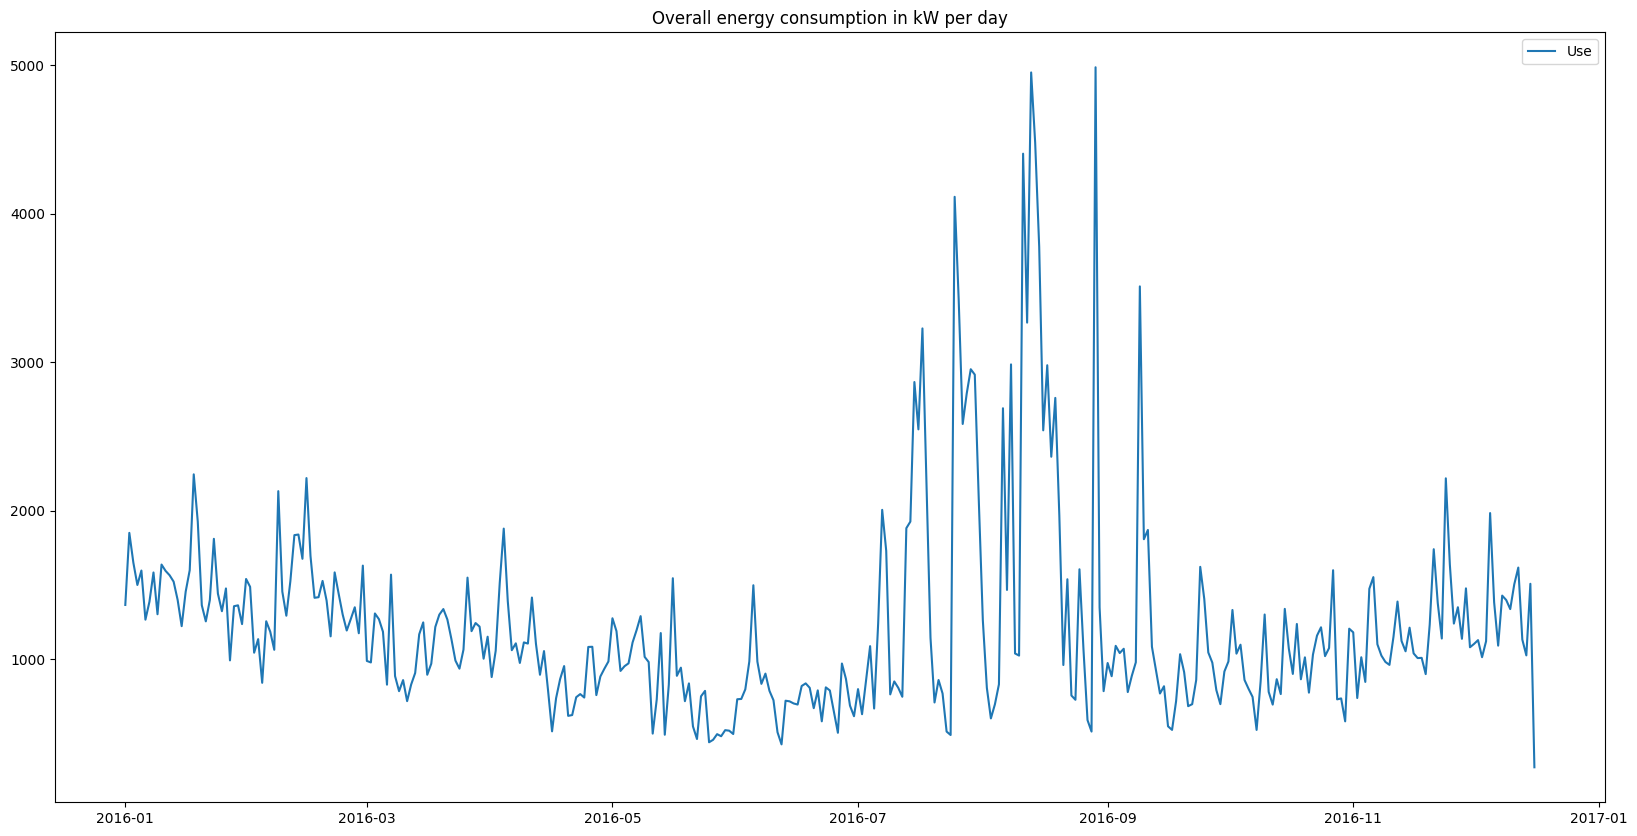

In [ ]:
#Set the width and height of the figure
plt.figure(figsize=(20,10))

#Add title
plt.title("Overall energy consumption in kW per day")
#Plotting the energy consumption per day
sns.lineplot(data = energy_per_day.filter(items=['Use']), dashes=False)

<Axes: title={'center': 'Overall energy consumption in kW per week'}>

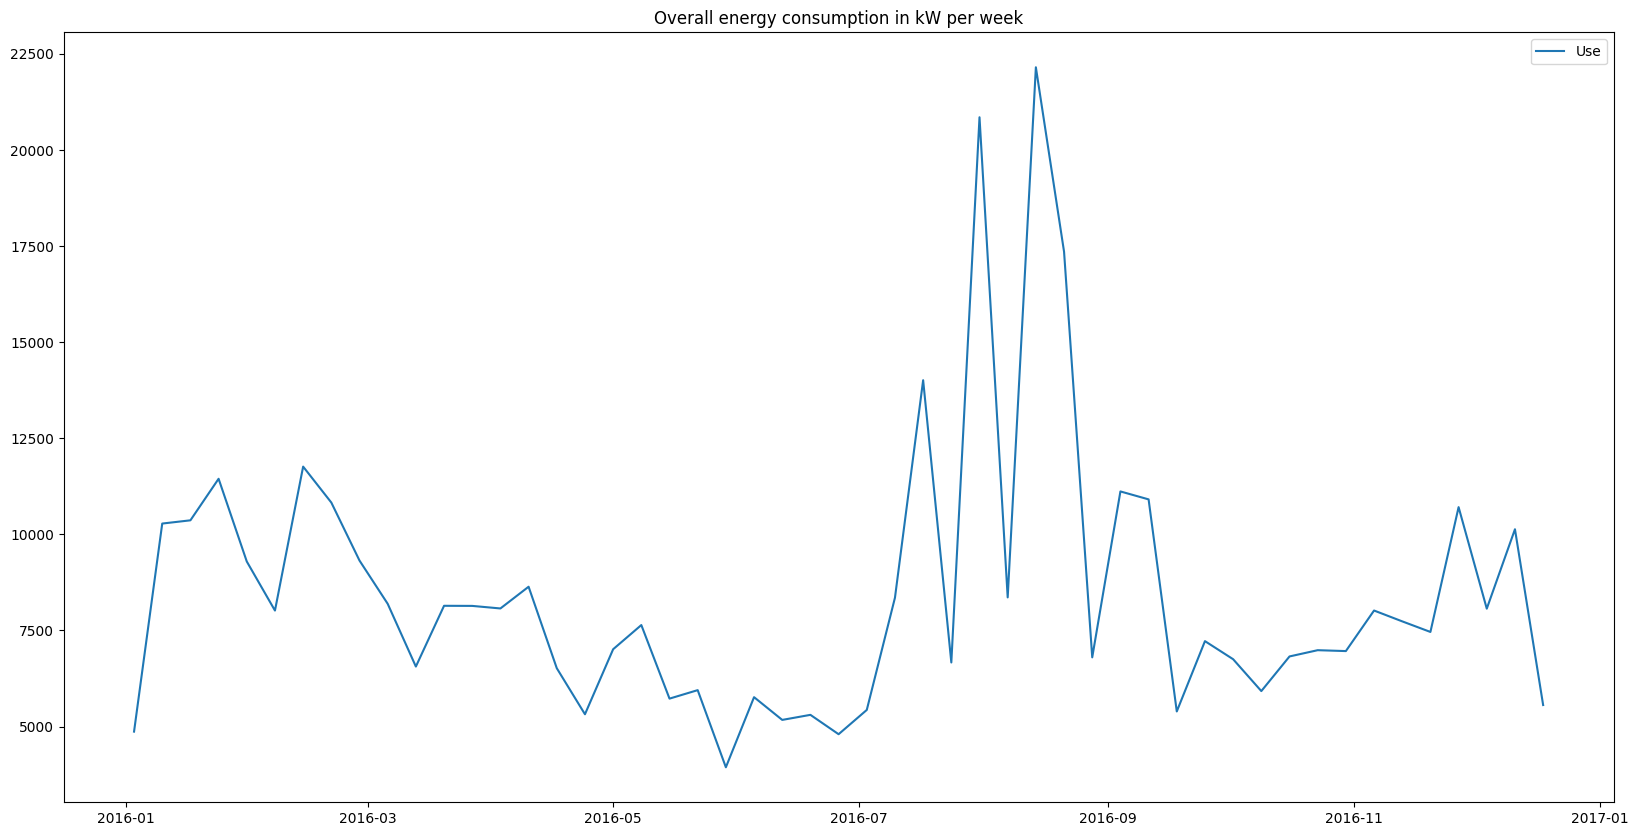

In [ ]:
# Set the width and height of the figure
plt.figure(figsize=(20,10))

# Add title
plt.title("Overall energy consumption in kW per week")
#Plotting the energy consumption per week
sns.lineplot(data = energy_per_week.filter(items=['Use']), dashes=False)

<Axes: title={'center': 'Overall energy consumption in kW per month'}>

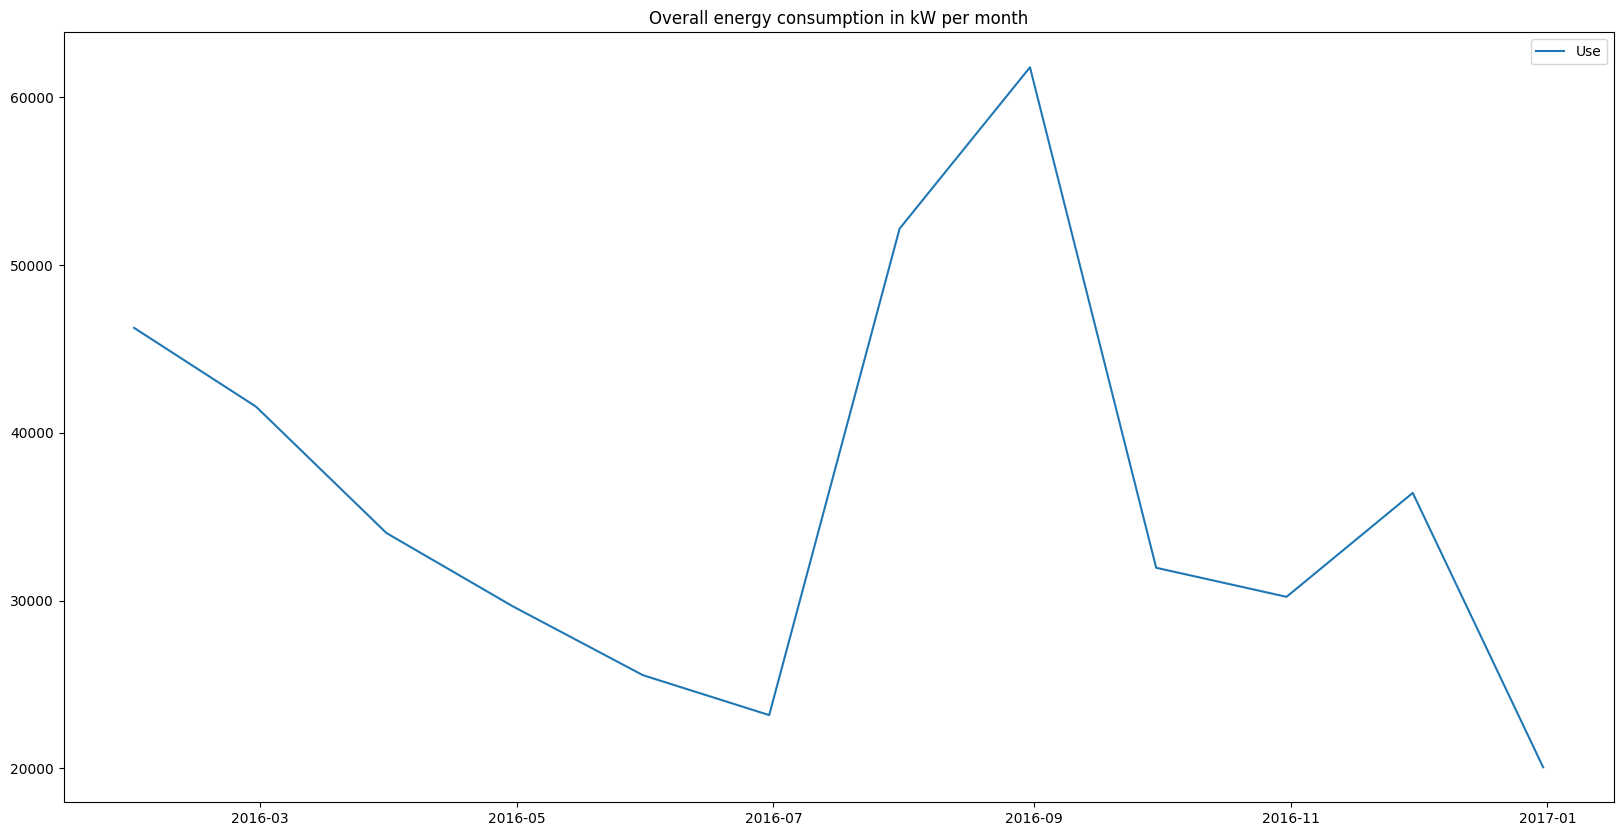

In [ ]:
# Set the width and height of the figure
plt.figure(figsize=(20,10))

# Add title
plt.title("Overall energy consumption in kW per month")
#Plotting the energy consumption per month
sns.lineplot(data = energy_per_month.filter(items=['Use']), dashes=False)

**August and September are the months with the highest energy consumption as per the above plot**

<Axes: title={'center': 'Overall energy generation in kW per day'}>

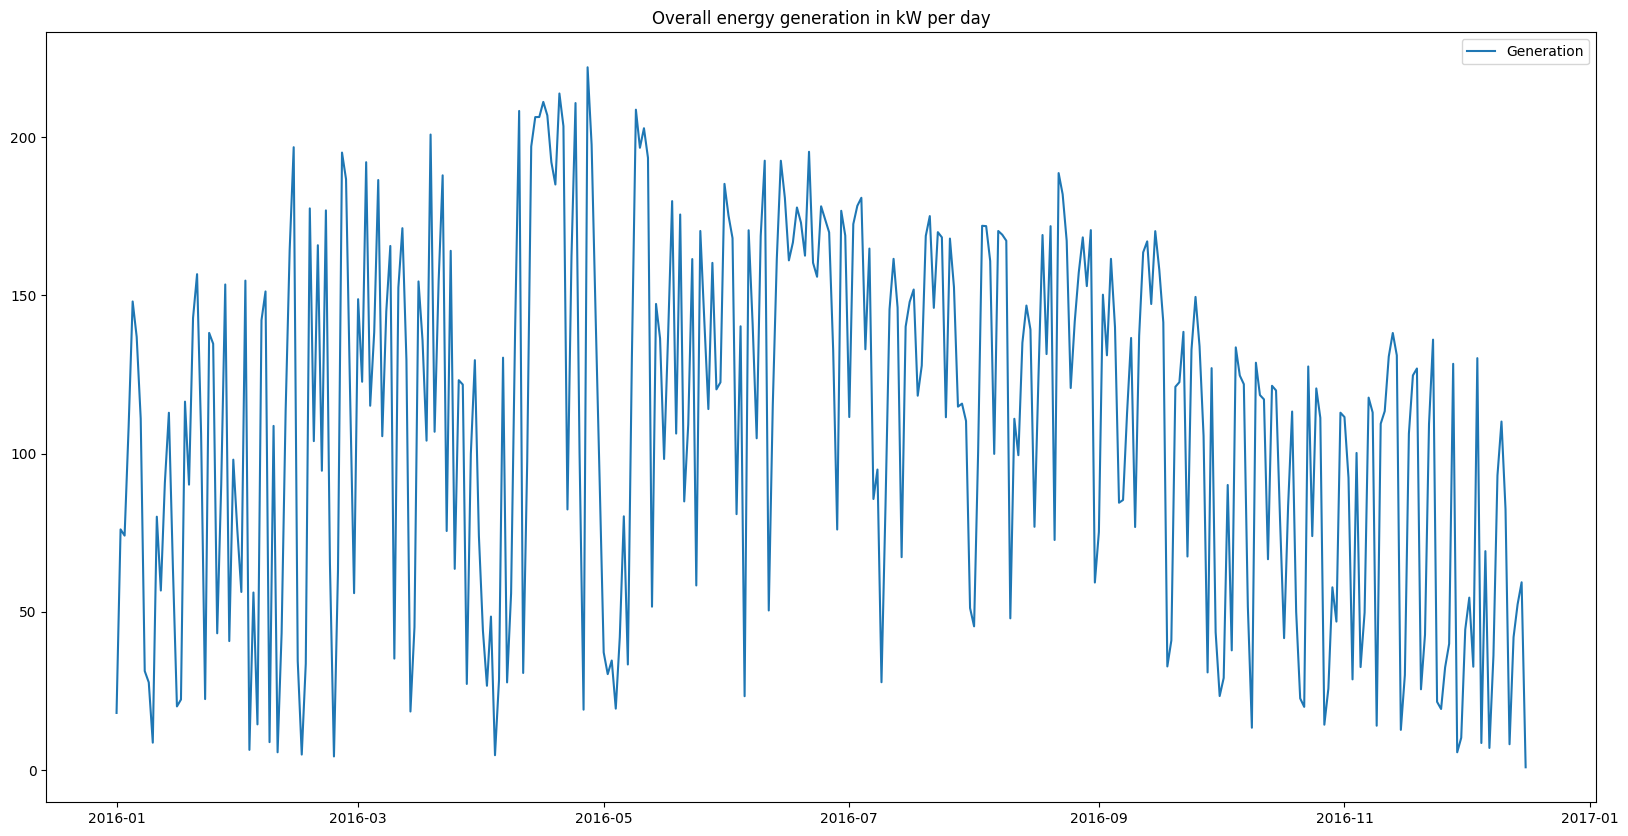

In [ ]:
#Set the width and height of the figure
plt.figure(figsize=(20,10))

#Add title
plt.title("Overall energy generation in kW per day")
#Plotting the energy consumption per day
sns.lineplot(data = energy_per_day.filter(items=['Generation']), dashes=False)

<Axes: title={'center': 'Overall energy generation in kW per week'}>

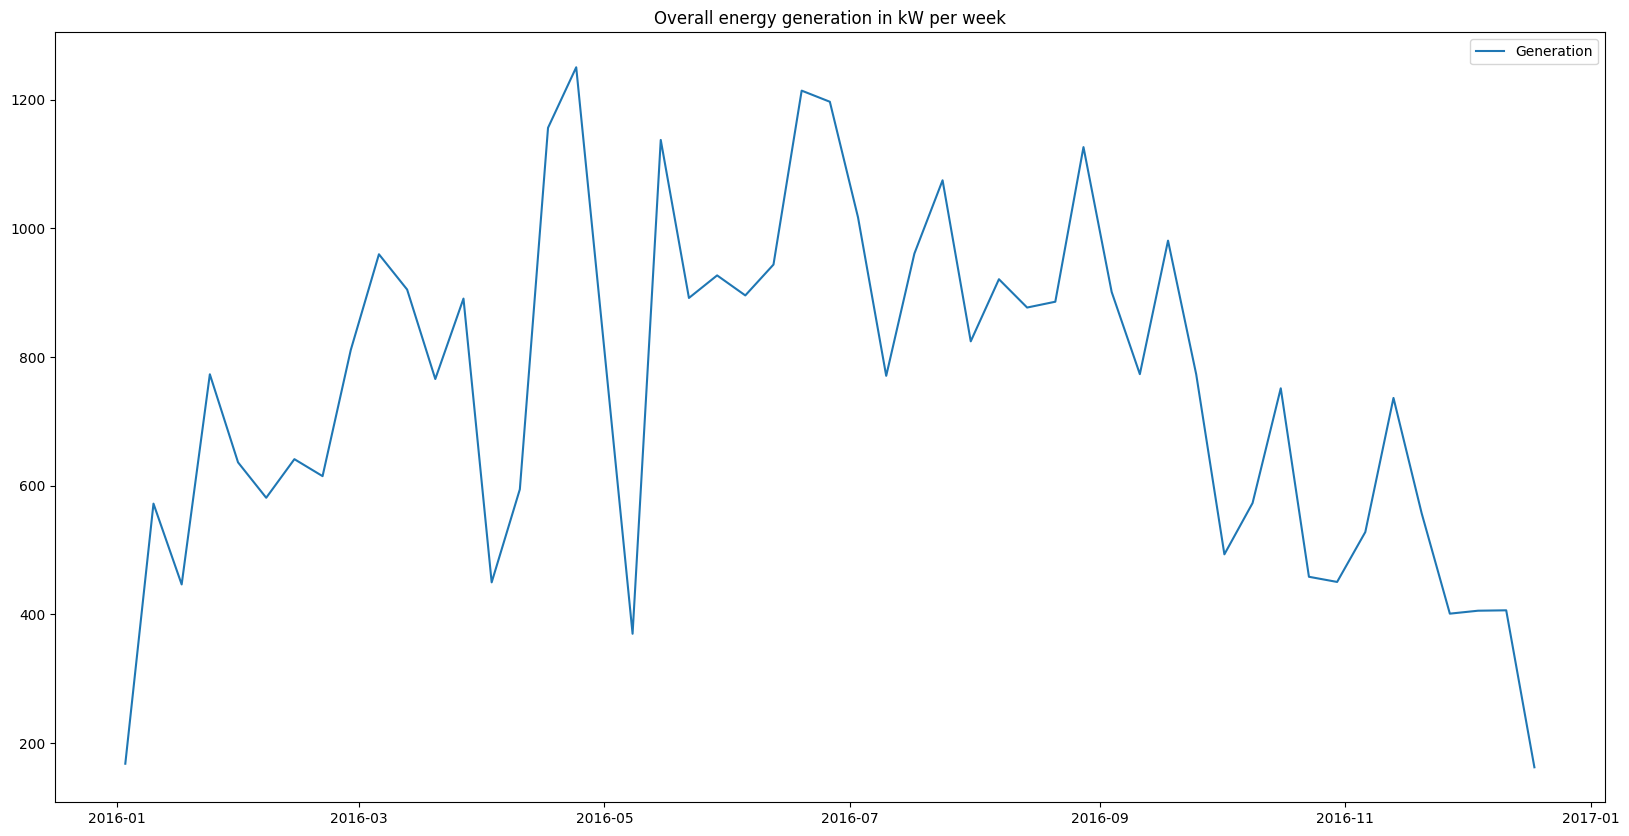

In [ ]:
#Set the width and height of the figure
plt.figure(figsize=(20,10))

#Add title
plt.title("Overall energy generation in kW per week")
#Plotting the energy consumption per day
sns.lineplot(data = energy_per_week.filter(items=['Generation']), dashes=False)

<Axes: title={'center': 'Overall energy generation in kW per month'}>

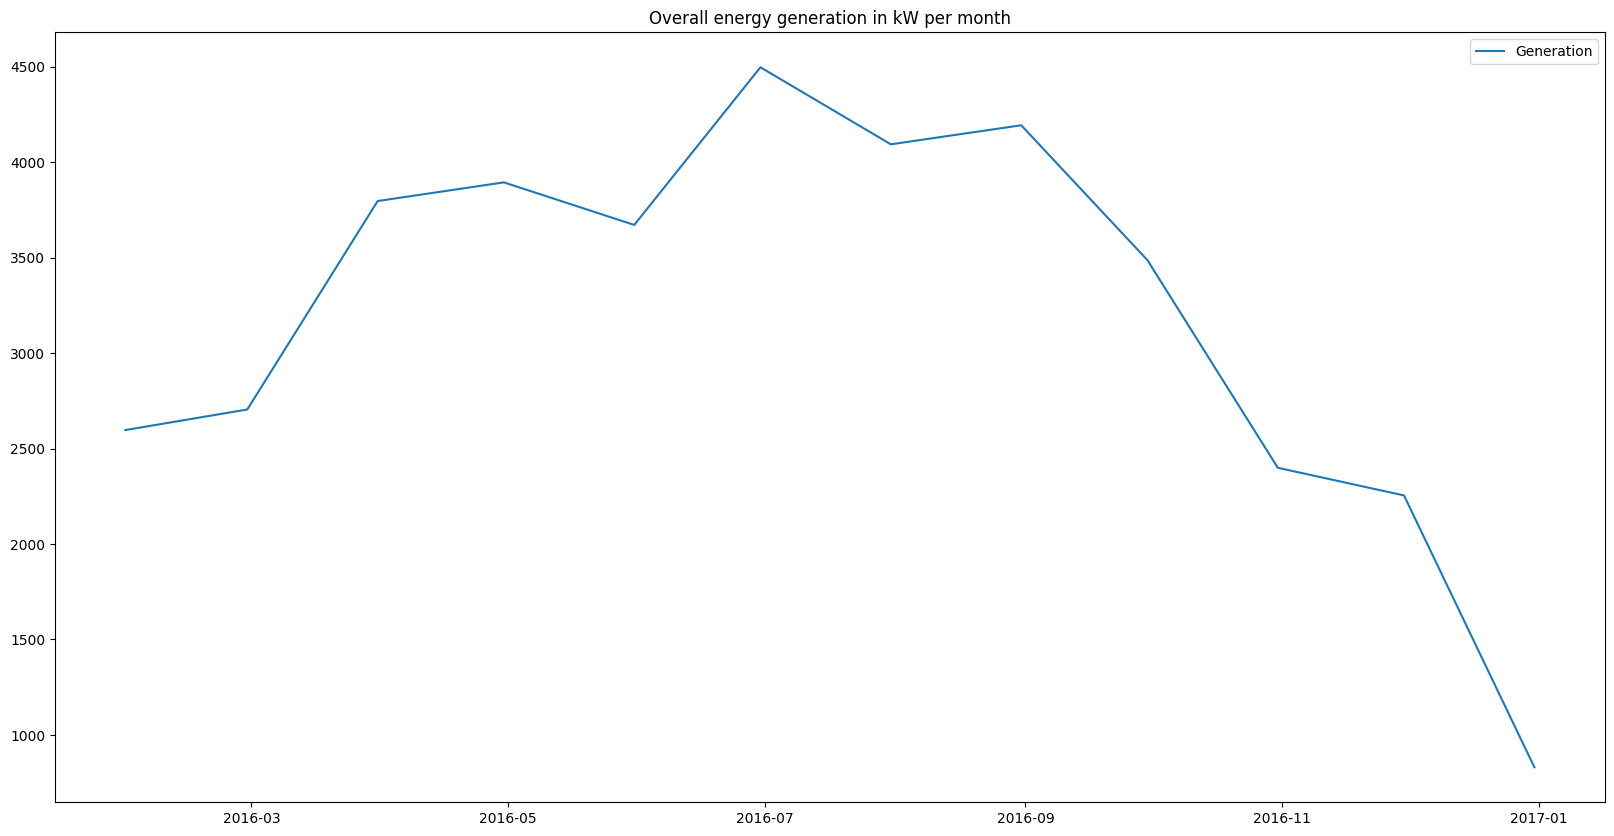

In [ ]:
#Set the width and height of the figure
plt.figure(figsize=(20,10))

#Add title
plt.title("Overall energy generation in kW per month")
#Plotting the energy consumption per day
sns.lineplot(data = energy_per_month.filter(items=['Generation']), dashes=False)

**July and September are the months with the highest energy generation as per the above plot**

<Axes: title={'center': 'Energy consumption in kW per day by individual room/appliance'}>

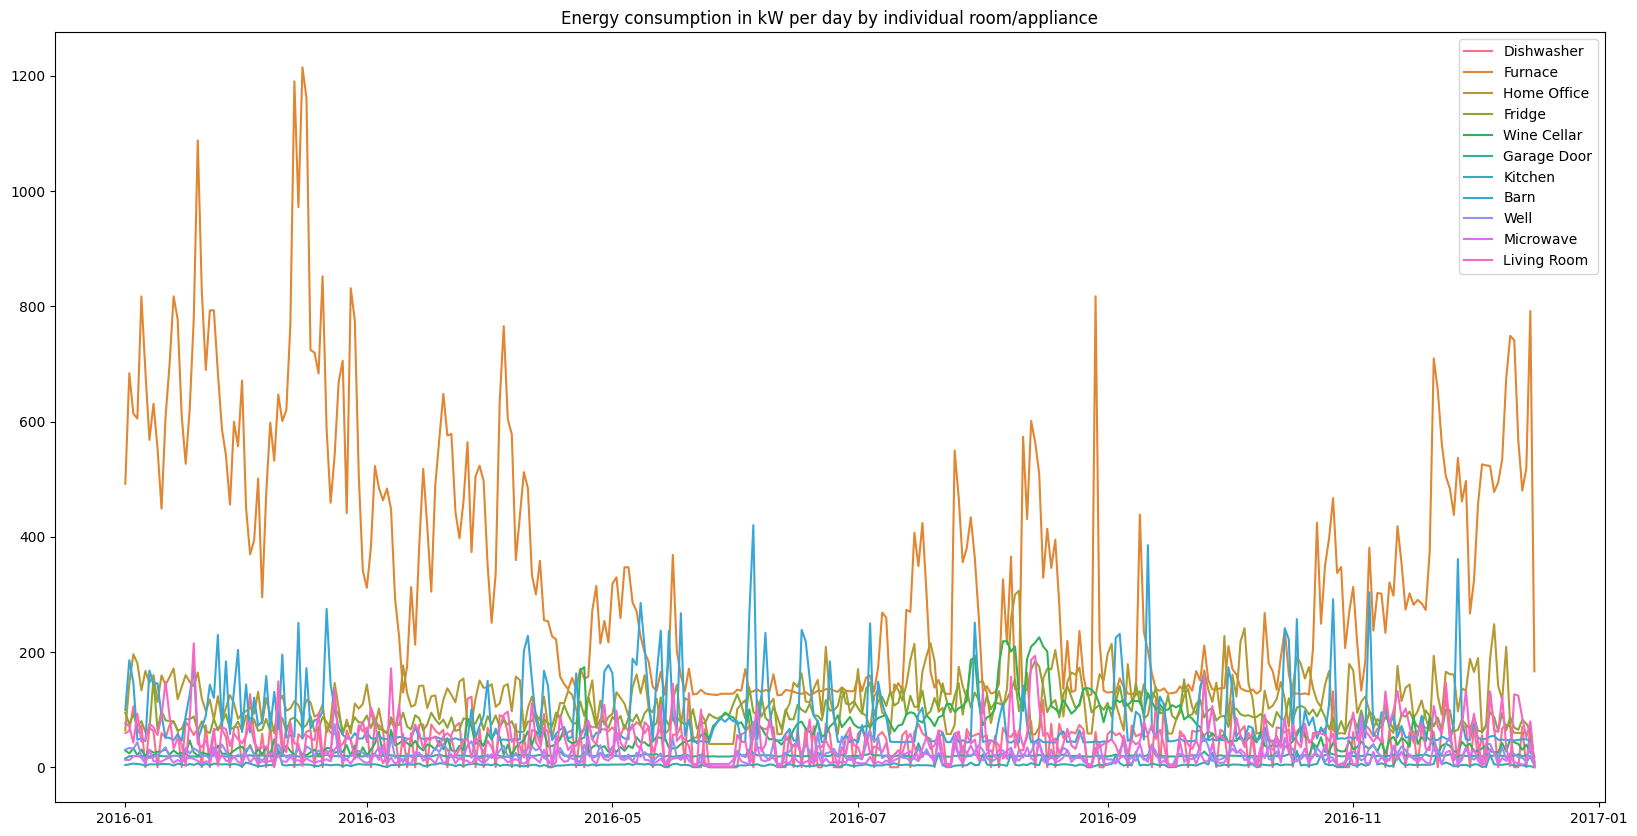

In [ ]:
plt.figure(figsize=(20,10))
plt.title("Energy consumption in kW per day by individual room/appliance")
sns.lineplot(data = energy_per_day.filter(items=['Dishwasher',
                                     'Furnace', 'Home Office', 'Fridge',
                                     'Wine Cellar', 'Garage Door', 'Kitchen', 'Barn', 'Well',
                                     'Microwave', 'Living Room']), dashes=False)

<Axes: title={'center': 'Energy consumption in kW per month by individual room/appliance'}>

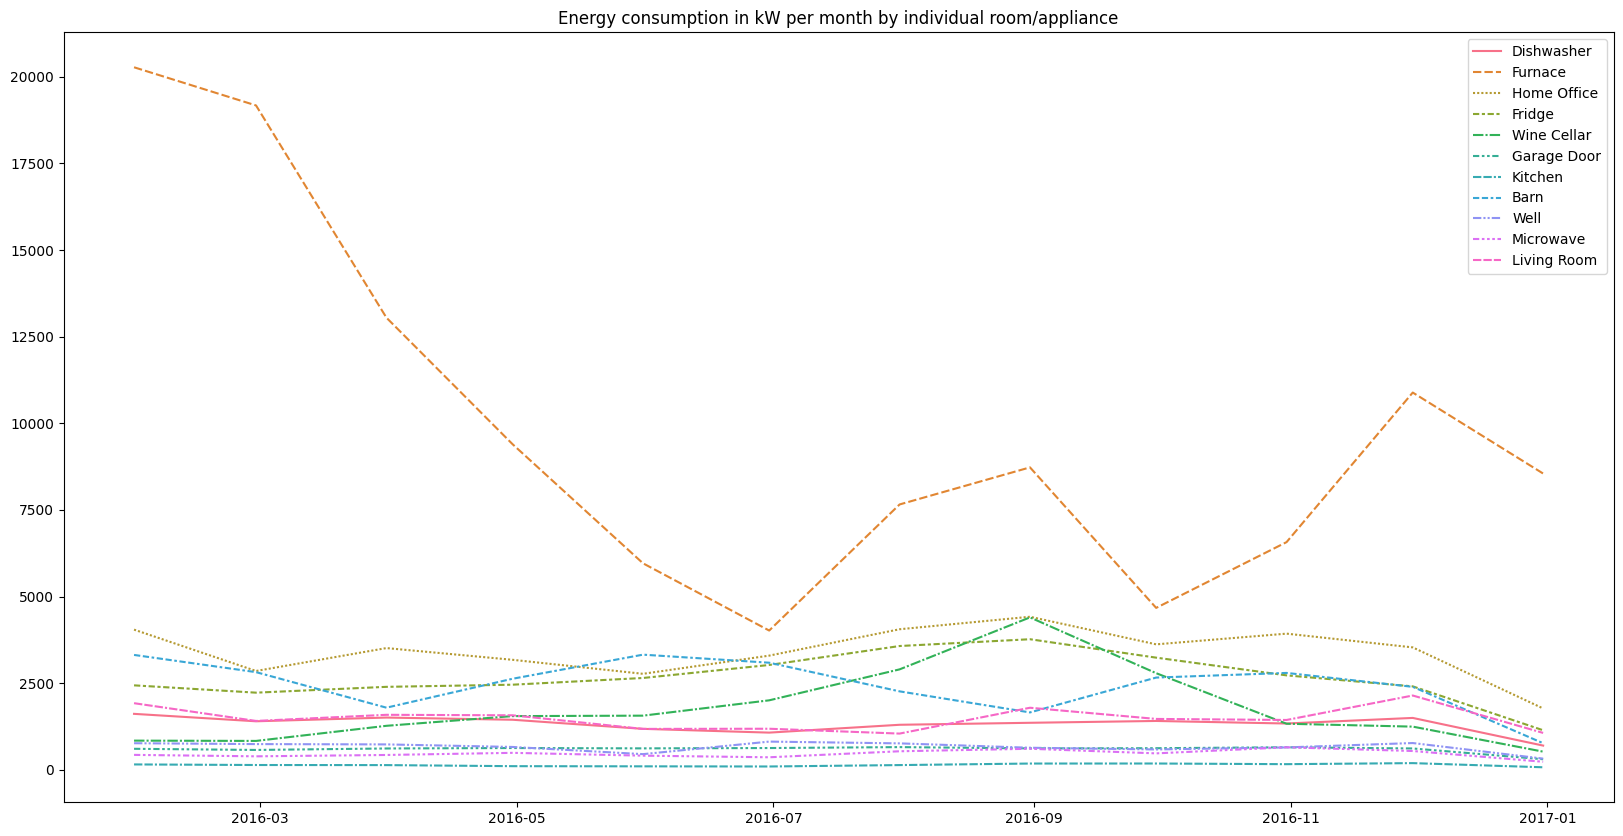

In [ ]:
plt.figure(figsize=(20,10))
plt.title("Energy consumption in kW per month by individual room/appliance")
sns.lineplot(data = energy_per_month.filter(items=['Dishwasher',
                                     'Furnace', 'Home Office', 'Fridge',
                                     'Wine Cellar', 'Garage Door', 'Kitchen', 'Barn', 'Well',
                                     'Microwave', 'Living Room']), dashes=True)

**The above plot indicates that furnace has the highest energy consumption among the rooms/devices and Kitchen has the lowest in the smart home in a month.**

In [ ]:
#Below we are splitting the energy consumption per month data into two sets.

#1) Energy consumed by each room in the house
energy_per_room = energy_per_month.filter(items=['Home Office',
                                     'Wine Cellar', 'Kitchen','Barn',
                                      'Living Room'])

#2) Energy consumed by each device in the house
energy_per_device = energy_per_month.filter(items=[ 'Dishwasher',
                                     'Furnace','Fridge',
                                     'Garage Door', 'Well',
                                     'Microwave'])

rooms_energy_consumption = energy_per_room.sum()
devices_energy_consumption = energy_per_device.sum()
print("Energy consumed in kW per month by each room in the house")
print(rooms_energy_consumption)

print('--------------------------------------------------------------')

print("Energy consumed in kW per month by each device in the house")
print(devices_energy_consumption)

Energy consumed in kW per month by each room in the house
Home Office    40961.277962
Wine Cellar    21233.079320
Kitchen         1644.062194
Barn           29493.633696
Living Room    17794.476716
dtype: float64
--------------------------------------------------------------
Energy consumed in kW per month by each device in the house
Dishwasher      15806.409510
Furnace        118917.457954
Fridge          32026.710600
Garage Door      7124.847316
Well             7882.163852
Microwave        5534.440218
dtype: float64


Text(0.5, 1.0, 'Energy consumption in kW by each room in the house')

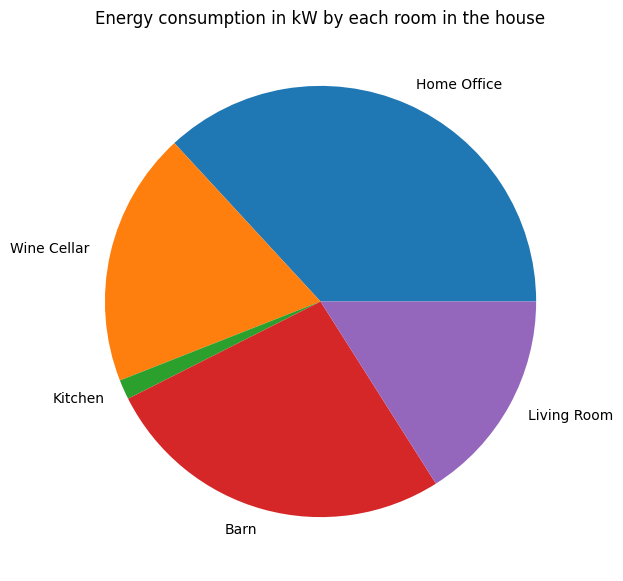

In [ ]:
plot = rooms_energy_consumption .plot(kind = "pie", figsize = (7,7))
plot.set_title("Energy consumption in kW by each room in the house")

**Home office has the highest energy consumption and kitchen the lowest among all the rooms in the house.**

Text(0.5, 1.0, 'Energy consumption in kW by each device in the house')

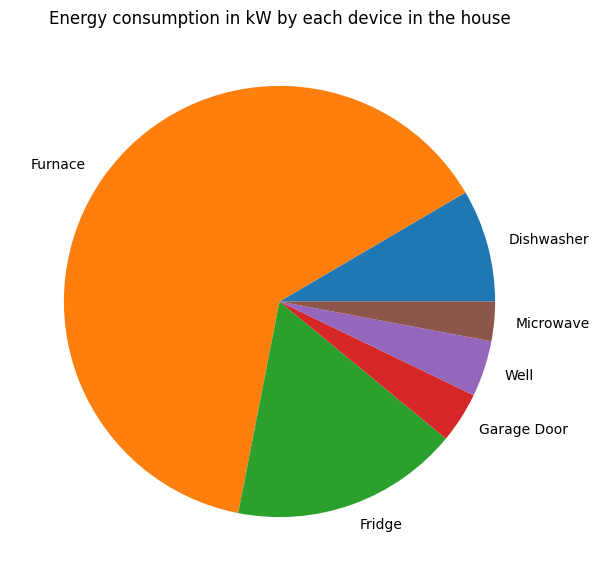

In [ ]:
plot = devices_energy_consumption .plot(kind = "pie", figsize = (7,7))
plot.set_title("Energy consumption in kW by each device in the house")

**Furnace has the highest energy consumption and Microwave has the lowest among all the devices in the house.**

<Axes: title={'center': 'Temperature and Humidity Over Time'}>

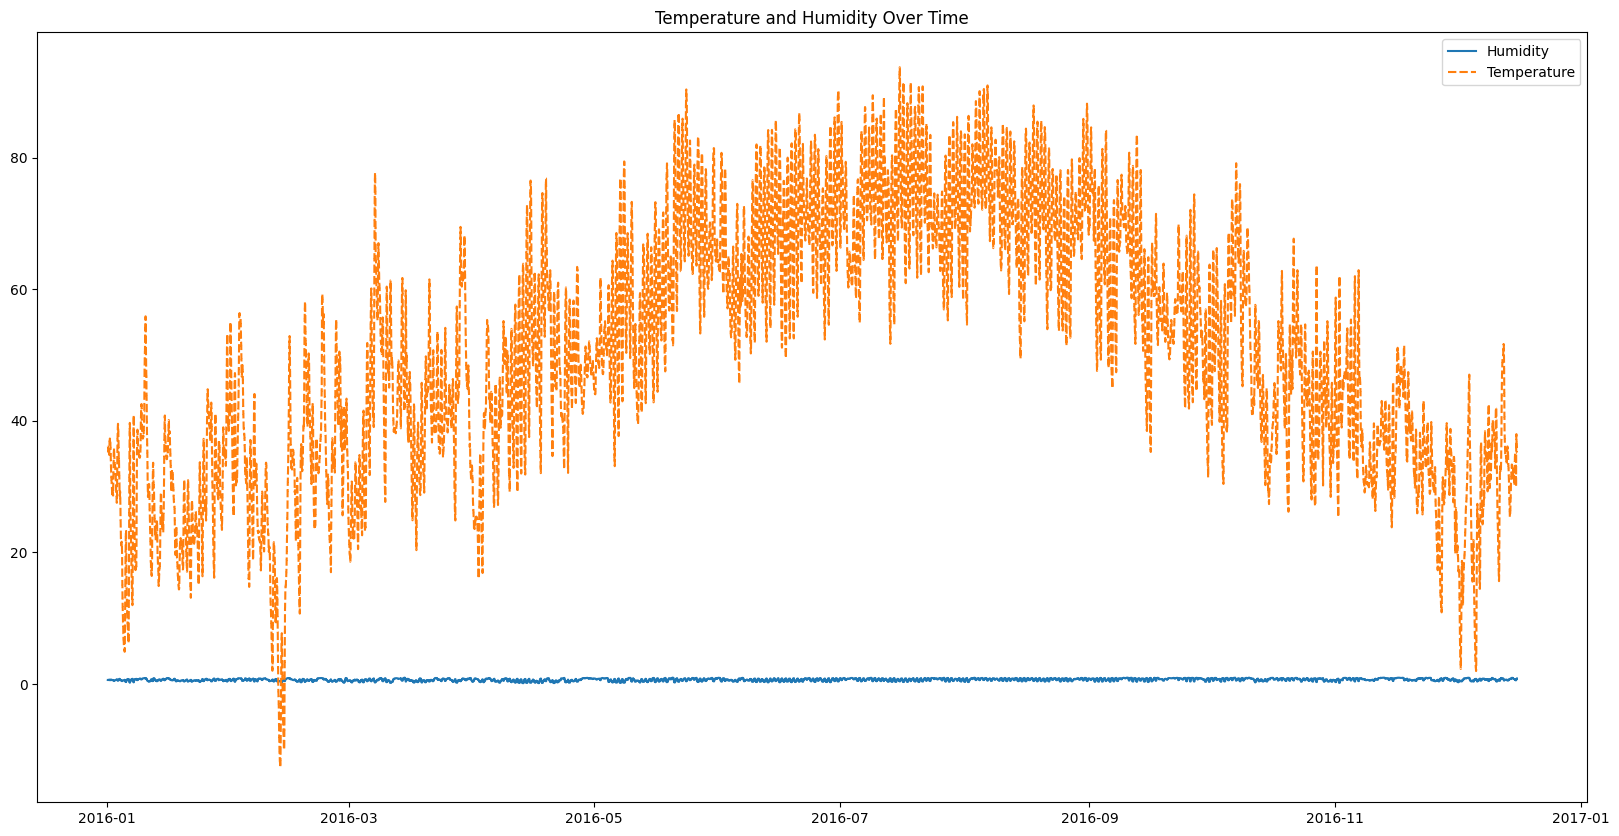

In [ ]:
plt.figure(figsize=(20,10))
plt.title("Temperature and Humidity Over Time")
sns.lineplot(data = home.filter(items=['Humidity', 'Temperature']), dashes=True)


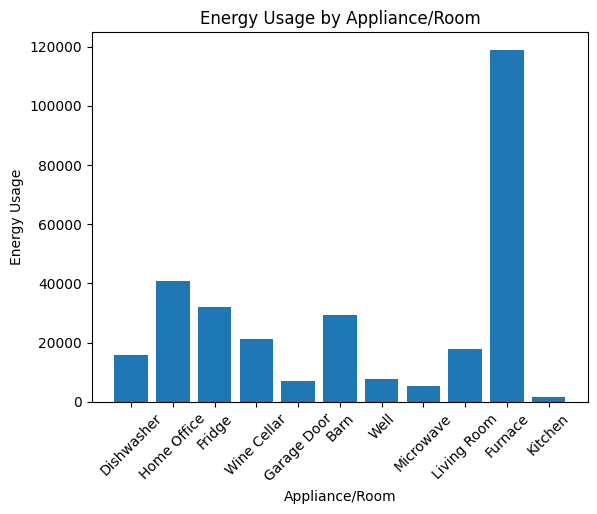

In [ ]:
categories = ['Dishwasher', 'Home Office', 'Fridge', 'Wine Cellar', 'Garage Door', 'Barn', 'Well', 'Microwave', 'Living Room', 'Furnace', 'Kitchen']

usage = [home[category].sum() for category in categories]

plt.bar(categories, usage)
plt.xlabel('Appliance/Room')
plt.ylabel('Energy Usage')
plt.title('Energy Usage by Appliance/Room')
plt.xticks(rotation=45)
plt.show()

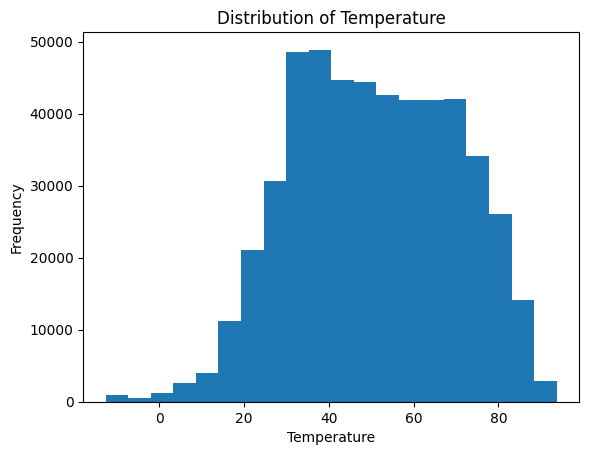

In [ ]:
plt.hist(home['Temperature'], bins=20)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title('Distribution of Temperature')
plt.show()

<Axes: title={'center': 'Energy Usage Vs Temperature'}>

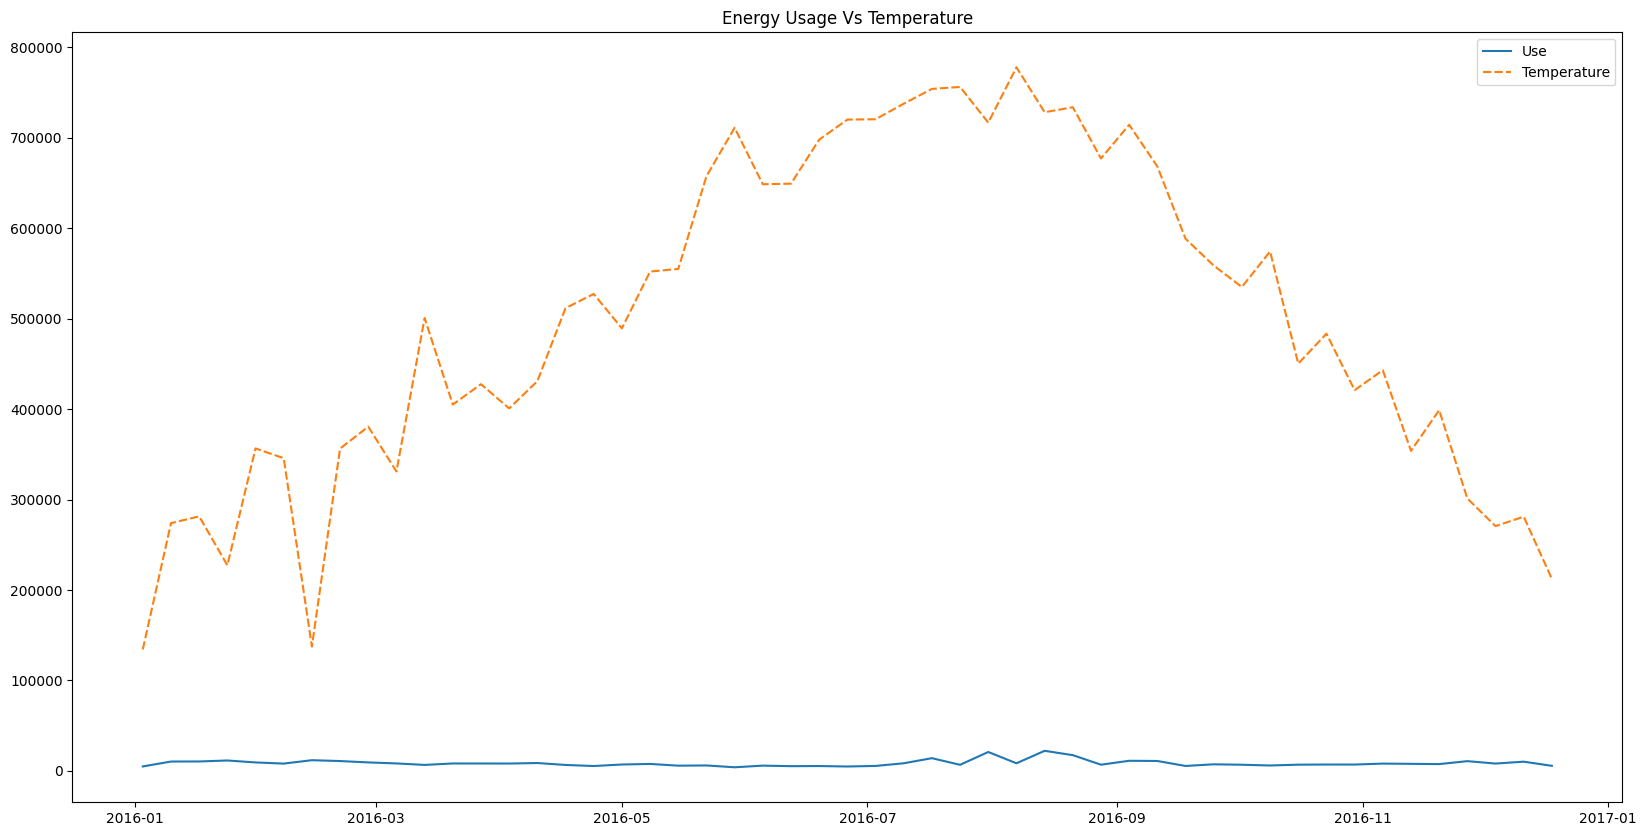

In [ ]:
plt.figure(figsize=(20,10))
plt.title("Energy Usage Vs Temperature")
sns.lineplot(data = data_per_week.filter(items=['Use', 'Temperature']), dashes=True)

<Axes: title={'center': 'Generation Vs Temperature'}>

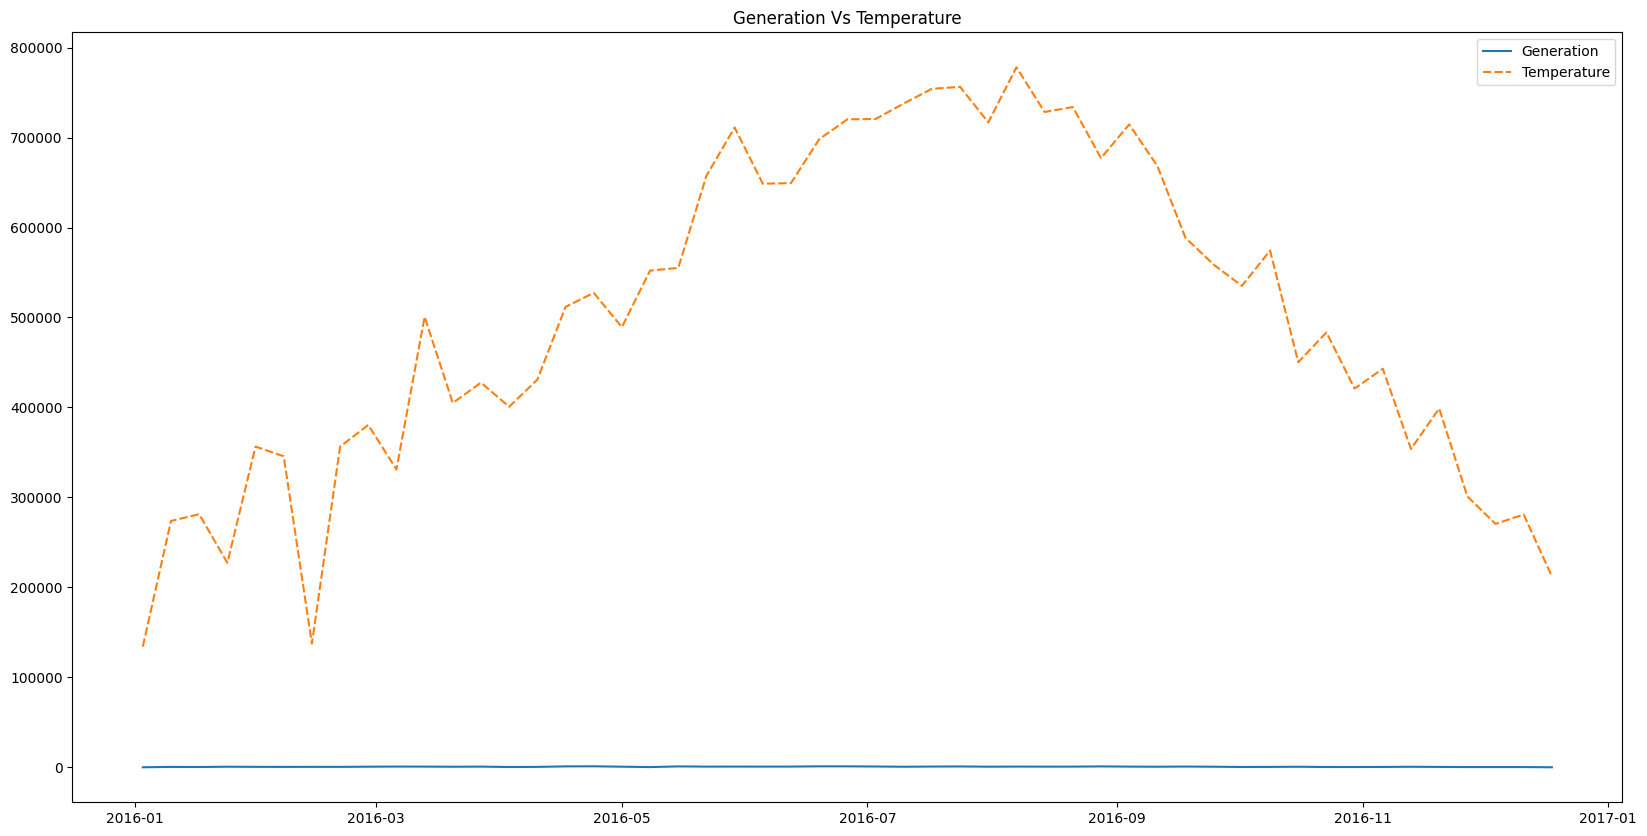

In [ ]:
plt.figure(figsize=(20,10))
plt.title("Generation Vs Temperature")
sns.lineplot(data = data_per_week.filter(items=['Generation', 'Temperature']), dashes=True)

## Part 4 - Correlation between features

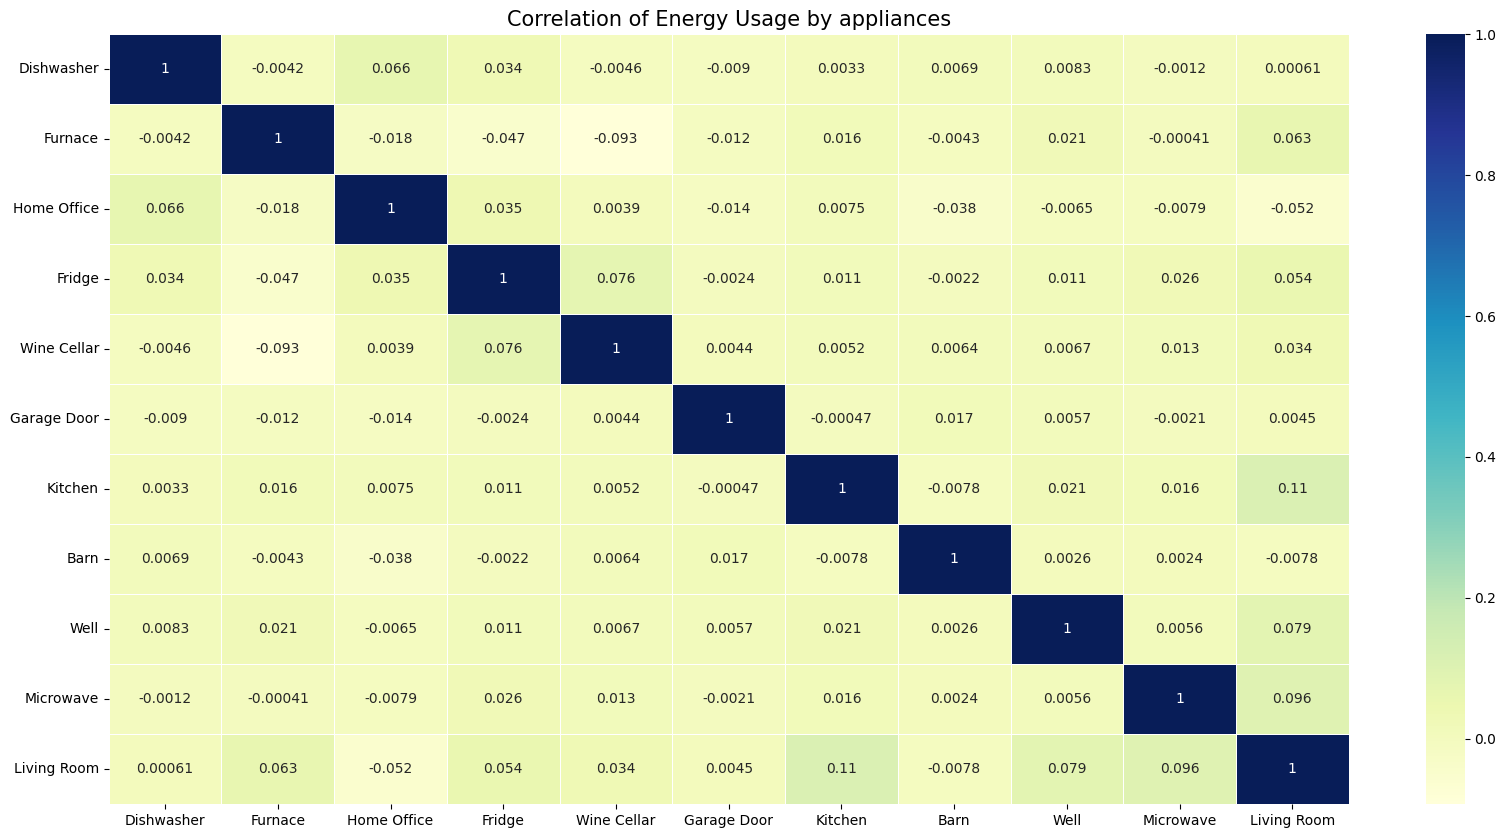

In [ ]:
#Correlation of energy usage by home appliances

energy_corr = energy_data.loc[:,'Dishwasher':].corr()
fig,ax = plt.subplots(figsize=(20, 10))
sns.heatmap(energy_corr, linewidths=0.5, annot=True, cmap="YlGnBu");
ax.set_title("Correlation of Energy Usage by appliances", size=15)
plt.show()

**No significant relationship between features, positive or negative, was observed. It is safe to presume that there is no interdependency between appliances when it comes to energy consumption.**

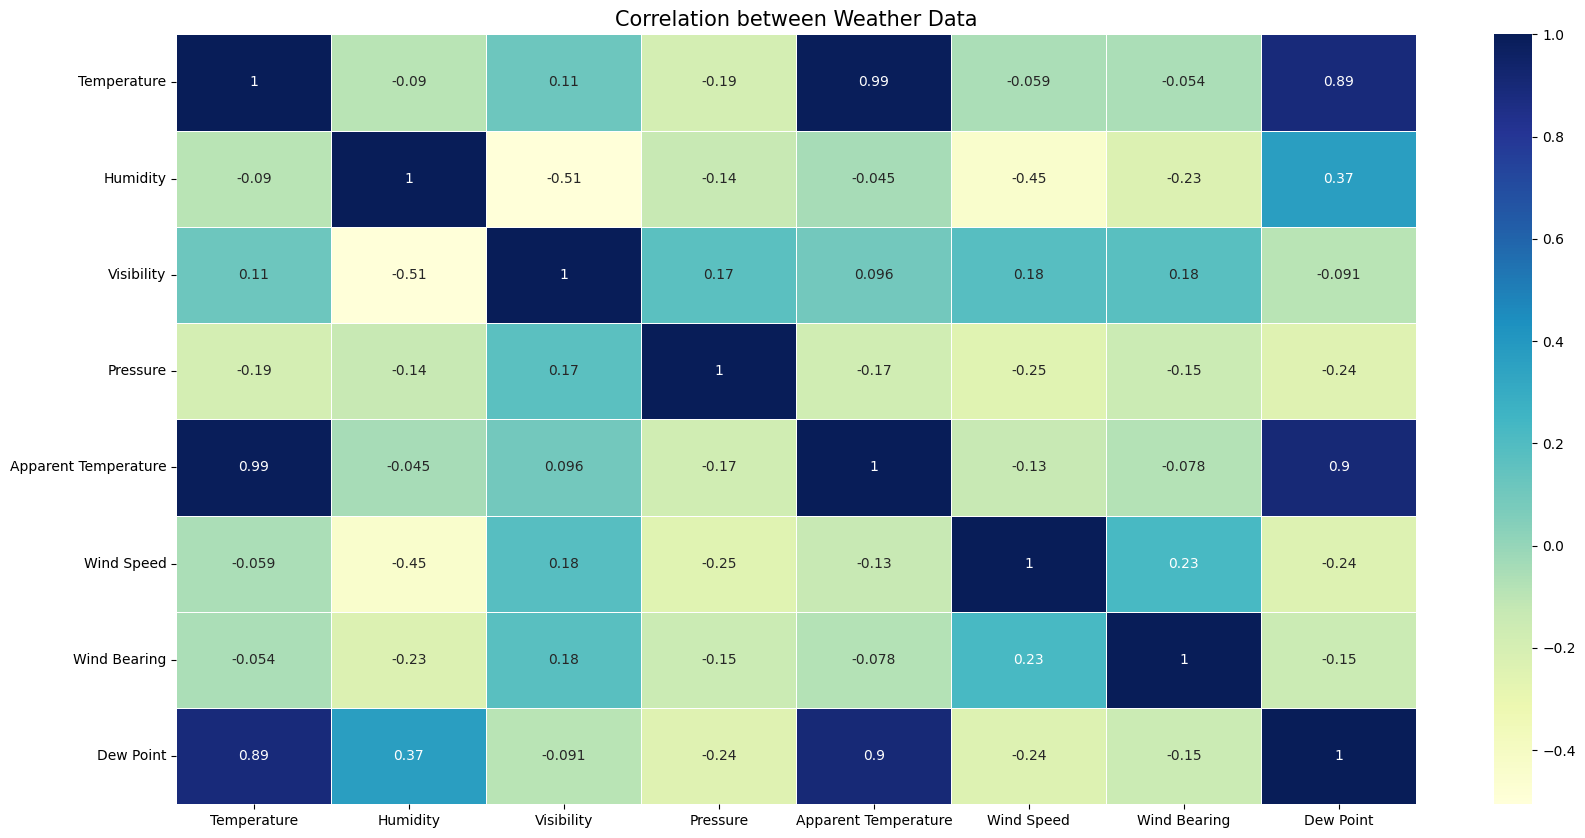

In [ ]:
#Correlation between weather data

weather_corr = weather_data.corr()
fig,ax = plt.subplots(figsize=(20, 10))
sns.heatmap(weather_corr, linewidths=0.5, annot=True, cmap="YlGnBu");
ax.set_title("Correlation between Weather Data", size=15)
plt.show()

features:**
**1. temperature and apparentTemperature (0.99)**
**2. temperature and dewPoint (0.89)**
**3. apparentTemperature and dewPoint (0.9)**

In [ ]:
# Merge energy and weather datasets
allData_df = pd.merge(energy_data.loc[:,'Dishwasher':], weather_data, left_index=True, right_index=True)
allData_df.head()

Dishwasher   Furnace  Home Office    Fridge  Wine Cellar  \
2016-01-01 05:00:00    0.000033  0.082617     0.442633  0.124150     0.006983   
2016-01-01 05:01:00    0.000000  0.084533     0.444067  0.124000     0.006983   
2016-01-01 05:02:00    0.000017  0.083017     0.446067  0.123533     0.006983   
2016-01-01 05:03:00    0.000017  0.175417     0.446583  0.123133     0.006983   
2016-01-01 05:04:00    0.000133  0.300917     0.446533  0.122850     0.006850   

                     Garage Door   Kitchen      Barn      Well  Microwave  \
2016-01-01 05:00:00     0.013083  0.000189  0.031350  0.001017   0.004067   
2016-01-01 05:01:00     0.013117  0.000189  0.031500  0.001017   0.004067   
2016-01-01 05:02:00     0.013083  0.000206  0.031517  0.001000   0.004067   
2016-01-01 05:03:00     0.013000  0.000217  0.031500  0.001017   0.004067   
2016-01-01 05:04:00     0.012783  0.000261  0.031500  0.001017   0.004067   

                     Living Room  Temperature  Humidity  Visibility  Pressure  \
2016-01-01 05:00:00     0.001517        36.14      0.62        10.0   1016.91   
2016-01-01 05:01:00     0.001650        36.14      0.62        10.0   1016.91   
2016-01-01 05:02:00     0.001650        36.14      0.62        10.0   1016.91   
2016-01-01 05:03:00     0.001617        36.14      0.62        10.0   1016.91   
2016-01-01 05:04:00     0.001583        36.14      0.62        10.0   1016.91   

                     Apparent Temperature  Wind Speed  Wind Bearing  Dew Point  
2016-01-01 05:00:00                 29.26        9.18         282.0       24.4  
2016-01-01 05:01:00                 29.26        9.18         282.0       24.4  
2016-01-01 05:02:00                 29.26        9.18         282.0       24.4  
2016-01-01 05:03:00                 29.26        9.18         282.0       24.4  
2016-01-01 05:04:00                 29.26        9.18         282.0       24.4

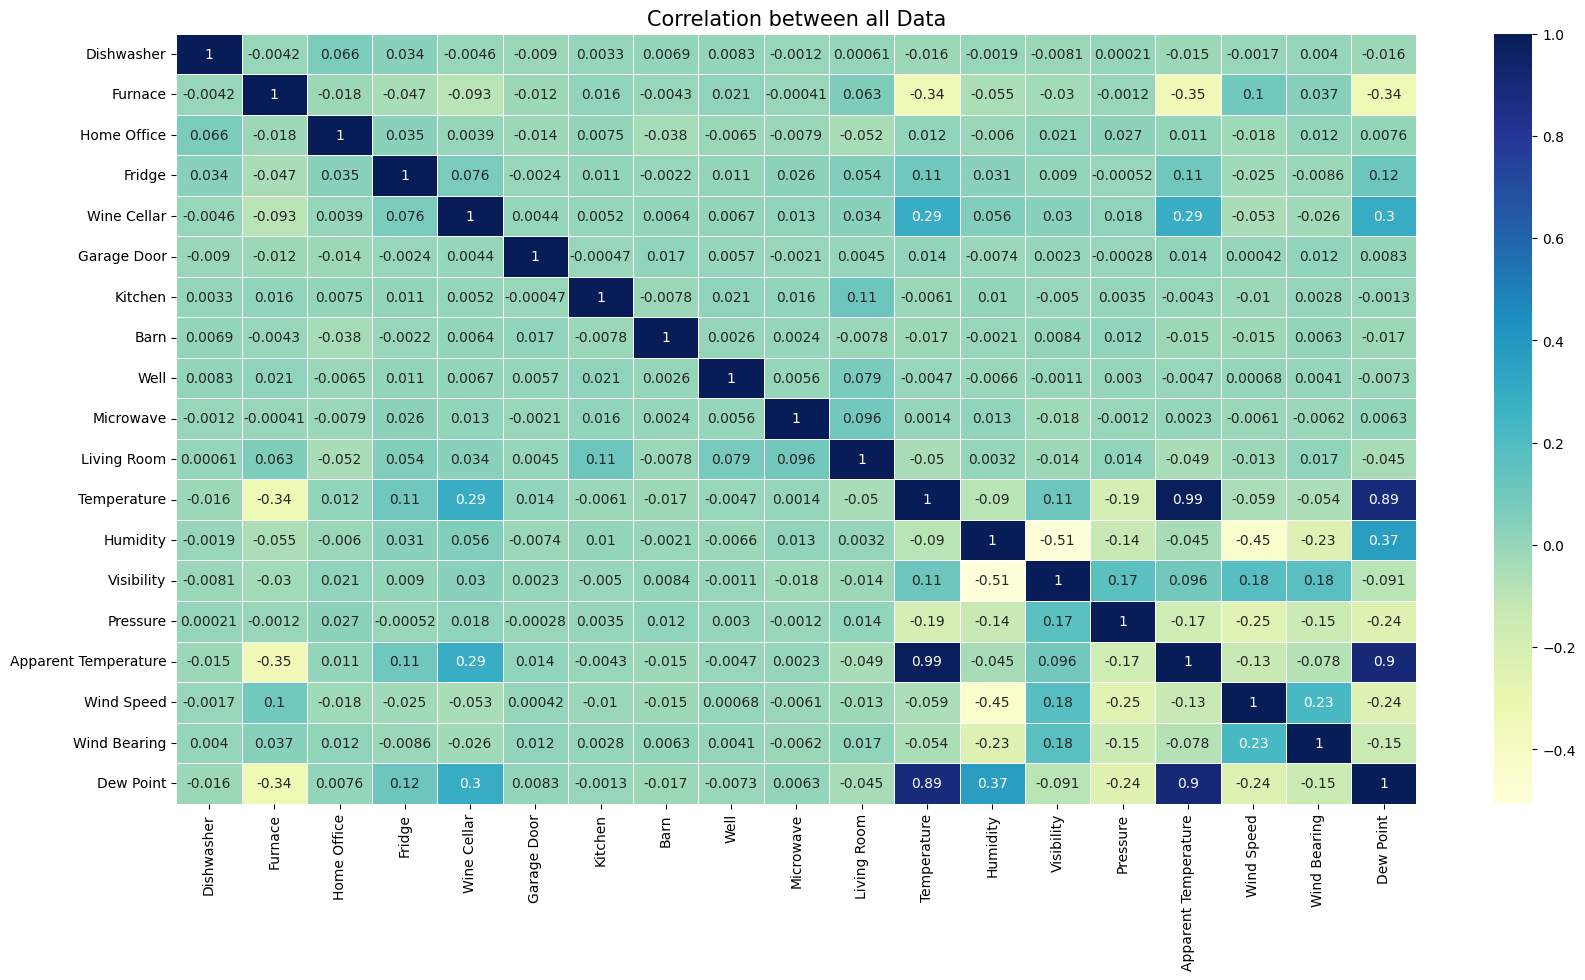

In [ ]:
#Correlation between all data

all_corr = allData_df.corr()
fig,ax = plt.subplots(figsize=(20, 10))
sns.heatmap(all_corr, linewidths=0.5, annot=True, cmap="YlGnBu");
ax.set_title("Correlation between all Data", size=15)
plt.show()

**Weak correlation between wine cellar and weather features like dewPoint(0.3), apparentTemperature(0.29) and temperature(0.29).
Relationships observed between other features as well, but not as significant.**

## Part 5 - Time Series Analysis

In [ ]:
# define function to convert hour to time of day

def convertHourToPartOfDay(x):
  if x in [22,23,0,1,2,3]:
    part = "Night"
  elif x in range (4,12):
    part = "Morning"
  elif x in range (12,17):
    part = "Afternoon"
  elif x in range (17,22):
    part = "Evening"
  else:
    part = "x"
  return part

In [ ]:
#Define function to group by time of day

def groupByPartOfDay(column):
    partOfDayDf = energy_per_part_of_day.groupby('part').agg({column:['mean']})
    partOfDayDf.columns = [f"{i[0]}_{i[1]}" for i in partOfDayDf.columns]
    partOfDayDf['part_num'] = [['Morning','Afternoon','Evening','Night'].index(i) for i in partOfDayDf.index]
    partOfDayDf.sort_values('part_num', inplace=True)
    partOfDayDf.drop('part_num', axis=1, inplace=True)
    return partOfDayDf

In [ ]:
# Create column to indicate time of day in dataset

energy_per_part_of_day = energy_data.loc[:]
energy_per_part_of_day['hour'] = energy_per_part_of_day.index.map(lambda x: x.hour)
energy_per_part_of_day['part'] = energy_per_part_of_day['hour'].apply(convertHourToPartOfDay)

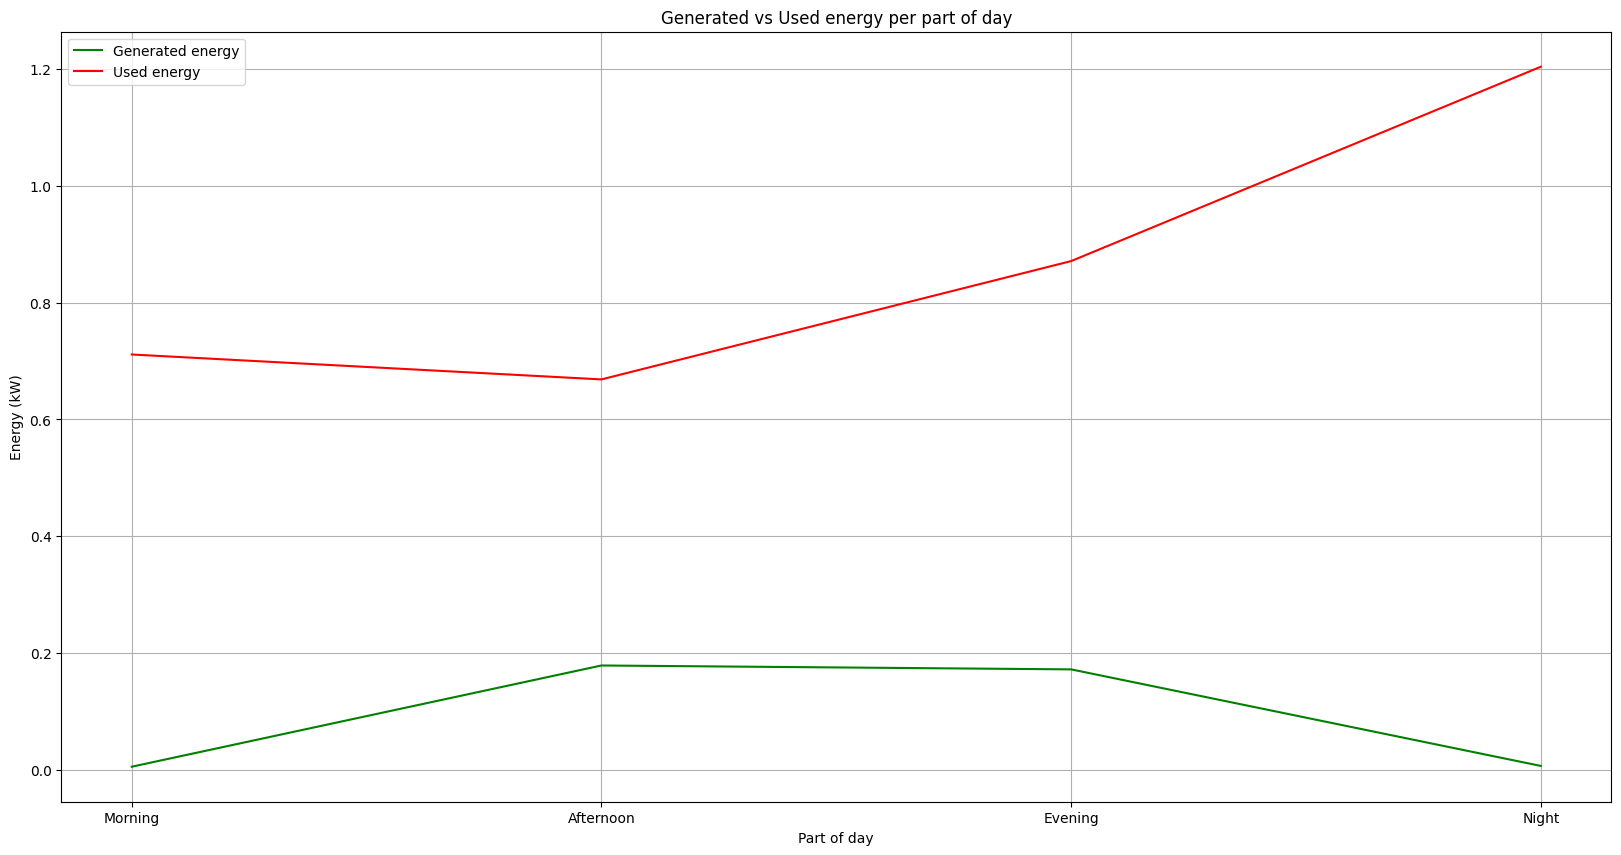

In [ ]:
# Plot generated vs used energy per part of day

plt.figure(figsize=(20,10))
plt.plot(groupByPartOfDay('Generation'), 'g', label='Generated energy')
plt.plot(groupByPartOfDay('Use'), 'r', label='Used energy')
plt.title('Generated vs Used energy per part of day')
plt.ylabel('Energy (kW)')
plt.xlabel('Part of day')
plt.legend()
plt.grid(True)
plt.show()

**Highest energy usage is observed during evening and night. The energy generation is relatively higher during afternoon and evening.**

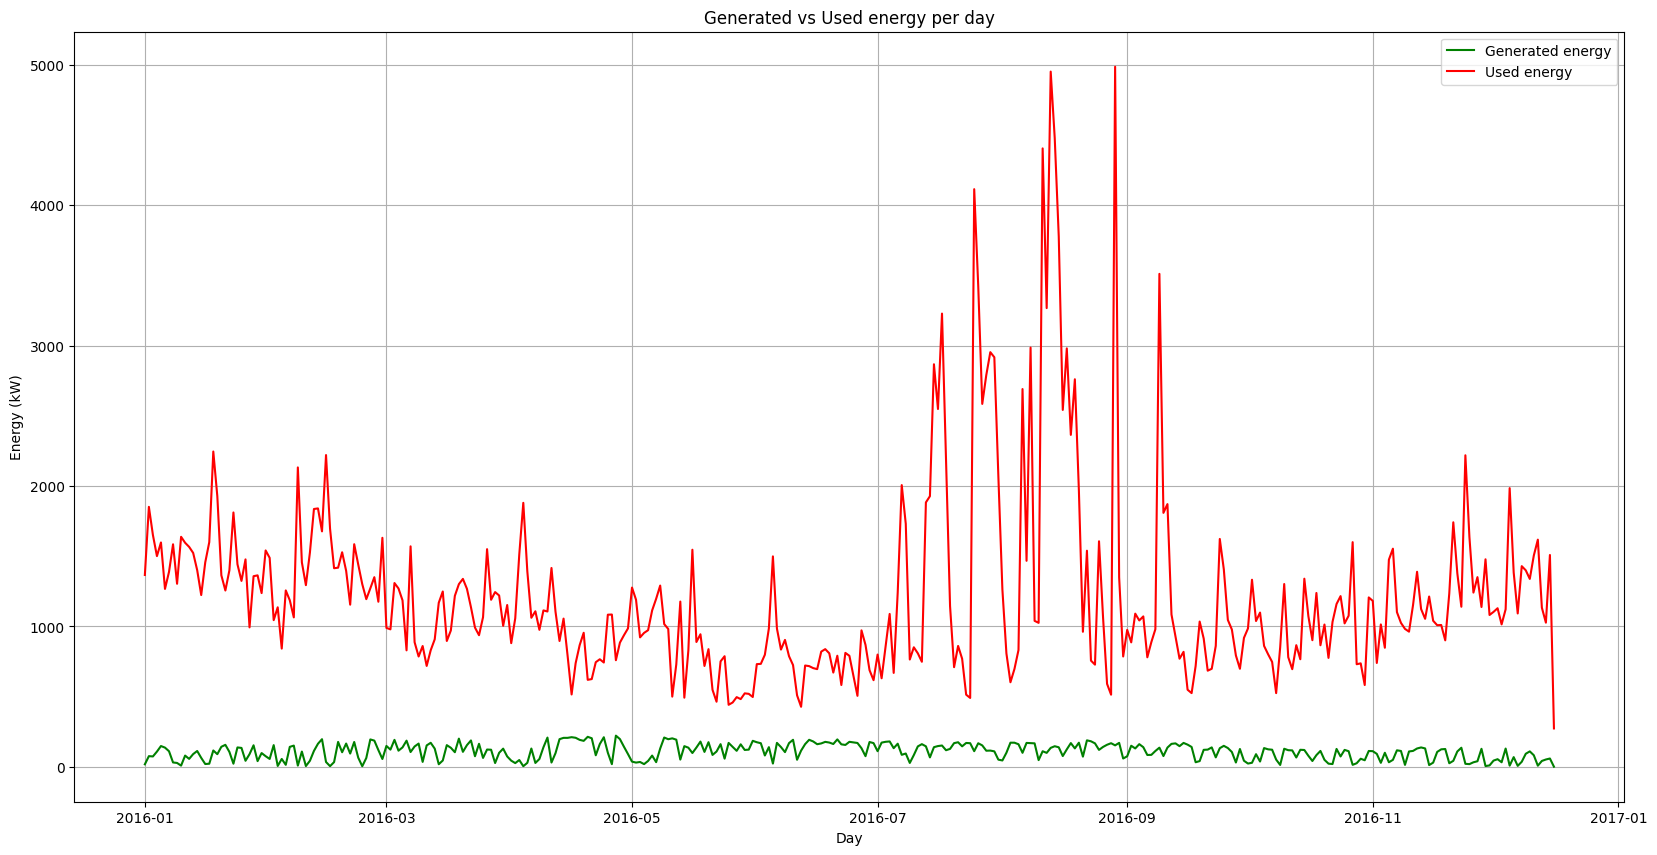

In [ ]:
# Plot generated vs used energy per day

plt.figure(figsize=(20,10))
plt.plot(energy_per_day.Generation, 'g', label='Generated energy')
plt.plot(energy_per_day.Use, 'r', label='Used energy')
plt.title('Generated vs Used energy per day')
plt.ylabel('Energy (kW)')
plt.xlabel('Day')
plt.legend()
plt.grid(True)
plt.show()

**Highest energy usage is observed in the days between July and September. The energy generation is mostly consistent throughtout the year.**

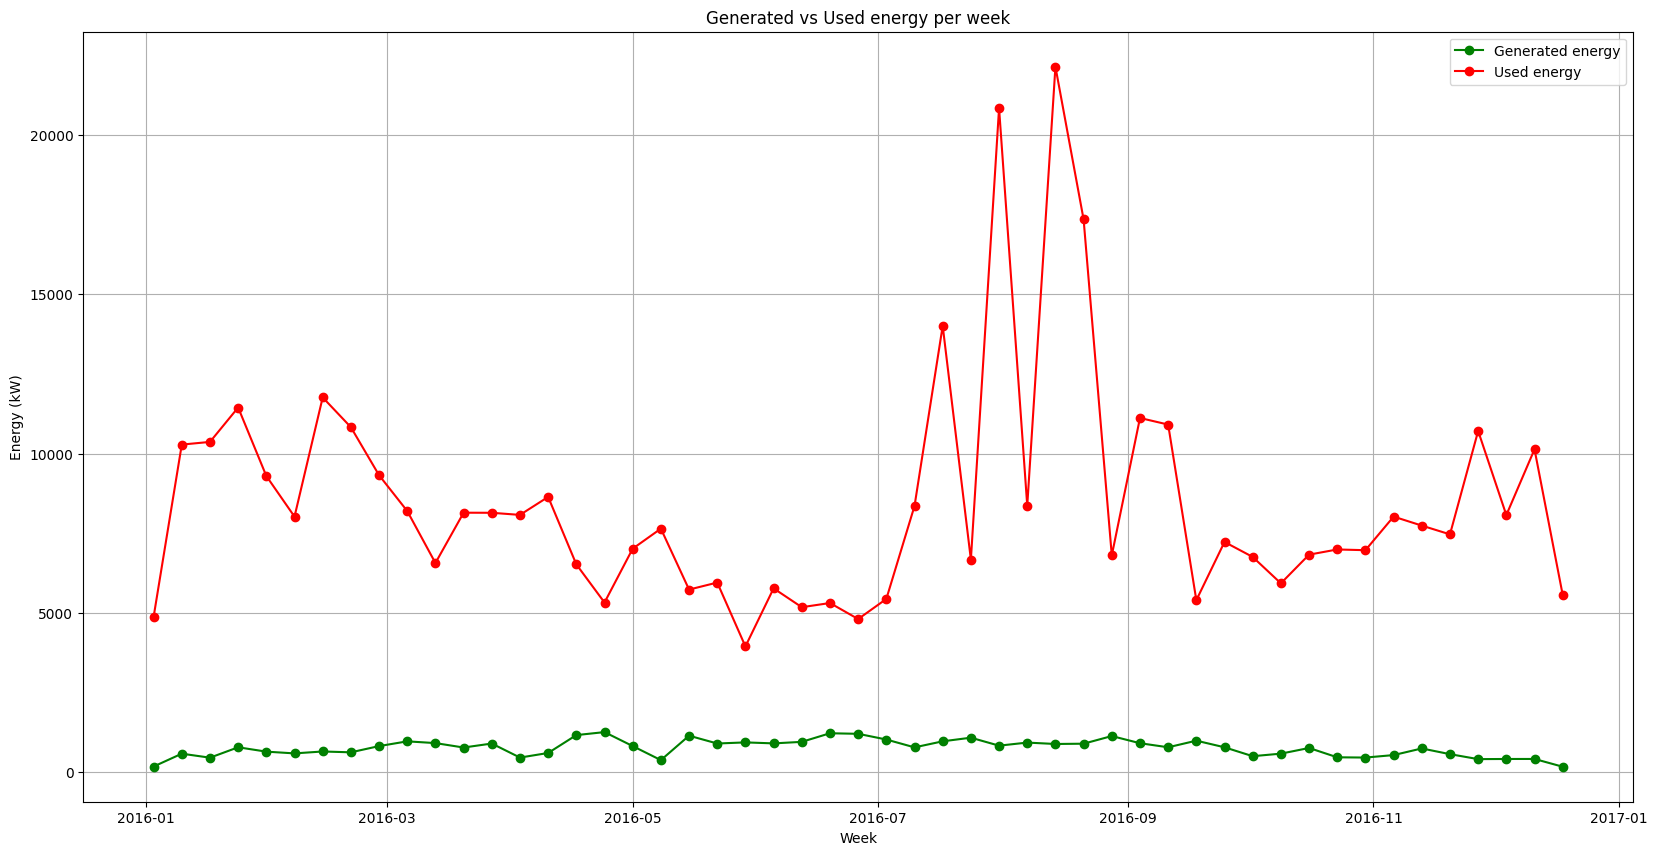

In [ ]:
# Plot generated vs used energy per week

plt.figure(figsize=(20,10))
plt.plot(energy_per_week.Generation, 'go-', label='Generated energy')
plt.plot(energy_per_week.Use, 'ro-', label='Used energy')
plt.title('Generated vs Used energy per week')
plt.ylabel('Energy (kW)')
plt.xlabel('Week')
plt.grid(True)
plt.legend()
plt.show()

**Highest energy usage is observed in the weeks between July and September. The energy generation is slightly high in the weeks between April and May but mostly consistent.**

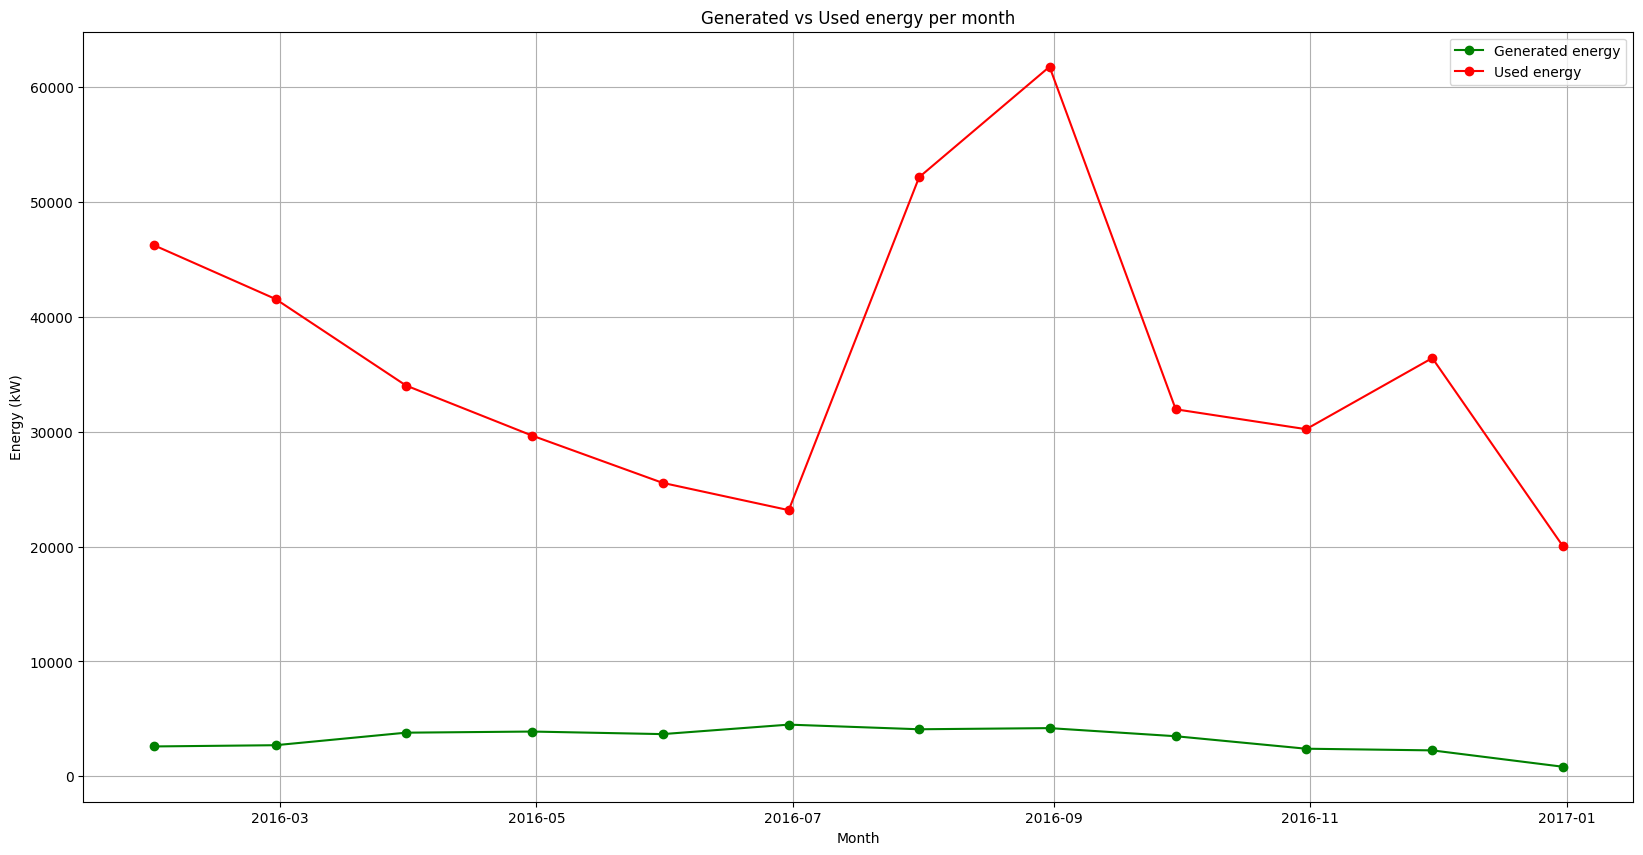

In [ ]:
# Plot generated vs used energy per month

plt.figure(figsize=(20,10))
plt.plot(energy_per_month.Generation, 'go-', label='Generated energy')
plt.plot(energy_per_month.Use, 'ro-', label='Used energy')
plt.title('Generated vs Used energy per month')
plt.ylabel('Energy (kW)')
plt.xlabel('Month')
plt.grid(True)
plt.legend()
plt.show()

**Highest energy usage is observed in the month of September. Months like August, February, March, April and December show high usage as well. The energy generation is slightly high in the month of July but mostly consistent.**

## 3 main factors of Time-Series Analysis:
### 1. Autocorrelation
### 2. Seasonality
### 3. Stationarity

**1. Autocorrelation**

Autocorrelation for 'Generation' =  0.4124176621101414


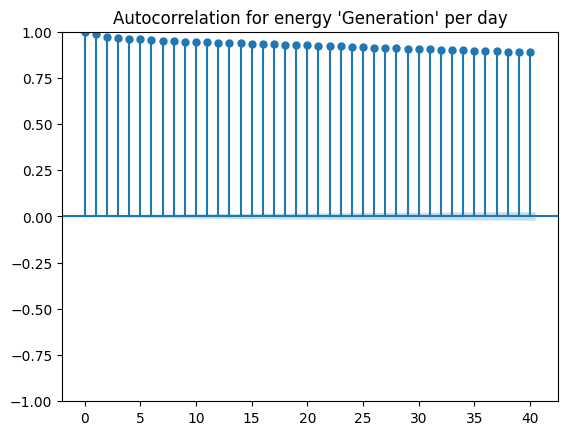

In [ ]:
#Plot ACF for energy 'gen'

print("Autocorrelation for 'Generation' = ", energy_per_day['Generation'].autocorr())
fig = plot_acf(energy_data['Generation'], lags=40, title="Autocorrelation for energy 'Generation' per day")
plt.show()

**Data has positive autocorrelation. It provides good predictability with autocorrelation value = 0.41.**

Autocorrelation for 'Use' =  0.6107009825029094


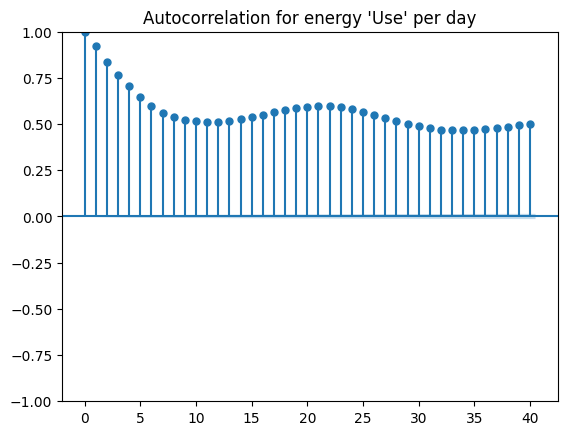

In [ ]:
#Plot ACF for energy 'use'

print("Autocorrelation for 'Use' = ", energy_per_day['Use'].autocorr())
fig = plot_acf(energy_data['Use'], lags=40, title="Autocorrelation for energy 'Use' per day")
plt.show()

**Data has positive autocorrelation. It provides good predictability with autocorrelation value = 0.61.**

**2. Seasonality**

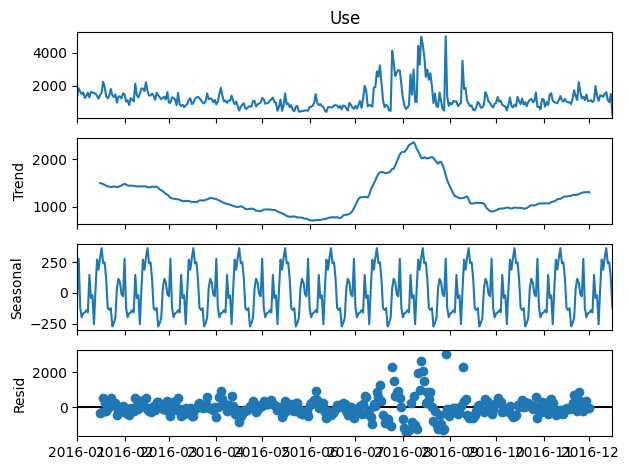

In [ ]:
#Seasonal decomposition is performed on the dataset to see if there is seasonality displayed in the per-day dataset at a frequency of 30 days(monthly)

result = seasonal_decompose(energy_per_day['Use'], model='additive', period=30)
result.plot()
plt.show()

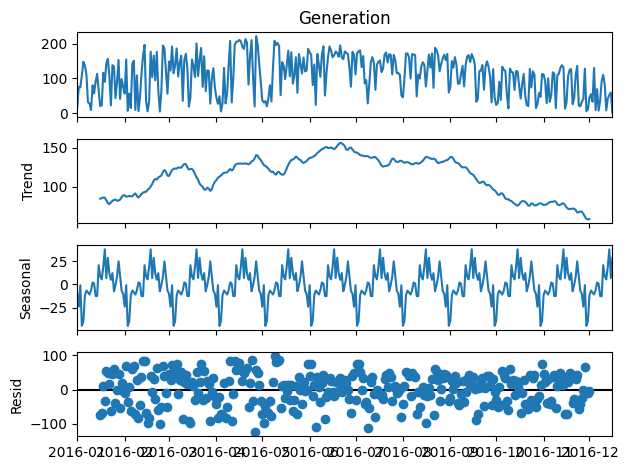

In [ ]:
#Seasonal decomposition is performed on the dataset to see if there is seasonality displayed in the per-day dataset at a frequency of 30 days(monthly)

result = seasonal_decompose(energy_per_day['Generation'], model='additive', period=30)
result.plot()
plt.show()

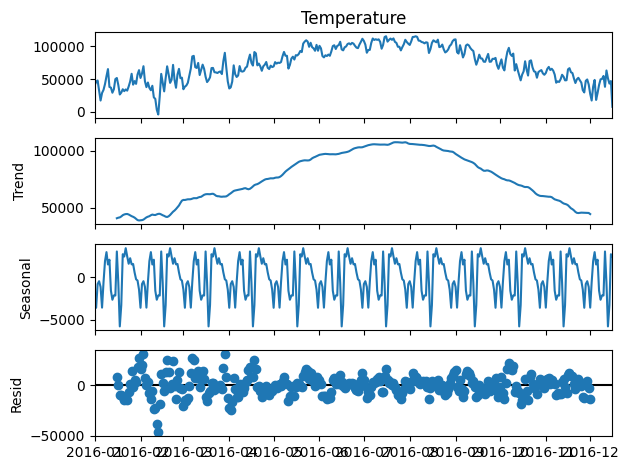

In [ ]:
#Seasonal decomposition is performed on the dataset to see if there is seasonality displayed in the per-day dataset at a frequency of 30 days(monthly)

result = seasonal_decompose(data_per_day['Temperature'], model='additive', period=30)
result.plot()
plt.show()

**It is observed in the figure above that the per-day usage and temperature displays a seasonal behavior at a frequency of 30**

**3. Stationarity**

In [ ]:
# split the dataset into two, and calculate mean and variance for both subsets

X = energy_data.values
split = round(len(X) / 2)
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()

print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

mean1=0.113294, mean2=0.121690
variance1=0.092859, variance2=0.212700


**The dataset is splitted into two contiguous halves. Mean and variance is calculated for each subset. There is a little difference observed but it can be concluded that the values are essentially in the same ballpark.**

## Part 6 - Anomaly Detection


### Energy Generation - Anomaly Detecion

In [ ]:
data = energy_per_day.filter(items=['Generation'])
df = data

isolation_forest = IsolationForest(n_estimators=100)
isolation_forest.fit(data.values.reshape(-1, 1))
xx = np.linspace(data.min(), data.max(), len(data)).reshape(-1,1)

df['scores']=isolation_forest.decision_function(df[['Generation']])
df['anomaly']=isolation_forest.predict(df[['Generation']])
df.head(5)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but IsolationForest was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but IsolationForest was fitted without feature names
  warnings.warn(


Generation    scores  anomaly
2016-01-01   18.026200 -0.061944       -1
2016-01-02   76.051300 -0.001209       -1
2016-01-03   74.081433 -0.016783       -1
2016-01-04  108.525017  0.037178        1
2016-01-05  148.107500  0.024444        1

In [ ]:
anomaly=df.loc[df['anomaly']==-1]
anomaly_index=list(anomaly.index)
print(anomaly)

            Generation    scores  anomaly
2016-01-01   18.026200 -0.061944       -1
2016-01-02   76.051300 -0.001209       -1
2016-01-03   74.081433 -0.016783       -1
2016-01-08   31.267217 -0.001415       -1
2016-01-10    8.630967 -0.064843       -1
...                ...       ...      ...
2016-12-08   36.094617 -0.021072       -1
2016-12-12    8.129833 -0.076040       -1
2016-12-14   52.339200 -0.001642       -1
2016-12-15   59.329550 -0.010550       -1
2016-12-16    0.846800 -0.195320       -1

[142 rows x 3 columns]


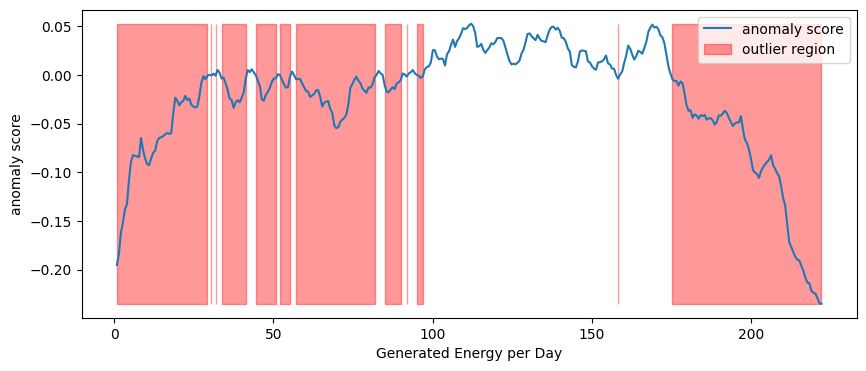

In [ ]:
# Distribution of generated energy per day
anomaly_score = isolation_forest.decision_function(xx)
outlier = isolation_forest.predict(xx)
plt.figure(figsize=(10,4))
plt.plot(xx, anomaly_score, label='anomaly score')
plt.fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score),
                 where=outlier==-1, color='r',
                 alpha=.4, label='outlier region')
plt.legend()
plt.ylabel('anomaly score')
plt.xlabel('Generated Energy per Day')
plt.show();

In [ ]:
data = energy_per_week.filter(items=['Generation'])
df = data

isolation_forest = IsolationForest(n_estimators=100)
isolation_forest.fit(data.values.reshape(-1, 1))
xx = np.linspace(data.min(), data.max(), len(data)).reshape(-1,1)

df['scores']=isolation_forest.decision_function(df[['Generation']])
df['anomaly']=isolation_forest.predict(df[['Generation']])
df.head(5)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but IsolationForest was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but IsolationForest was fitted without feature names
  warnings.warn(


Generation    scores  anomaly
2016-01-03  168.158933 -0.206184       -1
2016-01-10  572.221083  0.041687        1
2016-01-17  446.667833  0.018248        1
2016-01-24  773.163450  0.078535        1
2016-01-31  636.354167  0.018236        1

In [ ]:
anomaly=df.loc[df['anomaly']==-1]
anomaly_index=list(anomaly.index)
print(anomaly)

             Generation    scores  anomaly
2016-01-03   168.158933 -0.206184       -1
2016-04-17  1156.077233 -0.061043       -1
2016-04-24  1250.095367 -0.179477       -1
2016-05-08   370.034400 -0.103846       -1
2016-05-15  1137.199400 -0.026258       -1
2016-06-19  1213.810100 -0.095443       -1
2016-06-26  1196.532800 -0.078911       -1
2016-07-03  1016.893800 -0.034739       -1
2016-07-24  1074.534750 -0.066383       -1
2016-08-28  1126.103650 -0.032137       -1
2016-10-02   493.448750 -0.024375       -1
2016-11-06   528.045984 -0.016947       -1
2016-11-27   401.291433 -0.017714       -1
2016-12-18   162.635350 -0.206881       -1


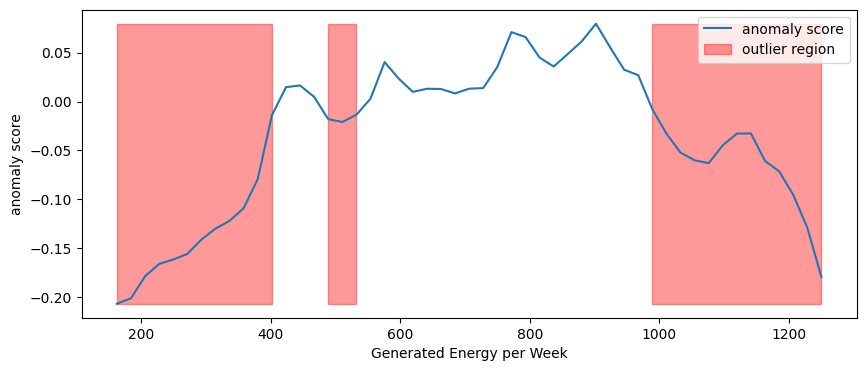

In [ ]:
# Distribution of generated energy per week
anomaly_score = isolation_forest.decision_function(xx)
outlier = isolation_forest.predict(xx)
plt.figure(figsize=(10,4))
plt.plot(xx, anomaly_score, label='anomaly score')
plt.fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score),
                 where=outlier==-1, color='r',
                 alpha=.4, label='outlier region')
plt.legend()
plt.ylabel('anomaly score')
plt.xlabel('Generated Energy per Week')
plt.show();

In [ ]:
data = energy_per_month.filter(items=['Generation'])
df = data

isolation_forest = IsolationForest(n_estimators=100)
isolation_forest.fit(data.values.reshape(-1, 1))
xx = np.linspace(data.min(), data.max(), len(data)).reshape(-1,1)

df['scores']=isolation_forest.decision_function(df[['Generation']])
df['anomaly']=isolation_forest.predict(df[['Generation']])
df.head(5)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but IsolationForest was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but IsolationForest was fitted without feature names
  warnings.warn(


Generation    scores  anomaly
2016-01-31  2596.565467  0.040589        1
2016-02-29  2704.221700  0.026702        1
2016-03-31  3795.807367  0.068664        1
2016-04-30  3893.534950  0.054463        1
2016-05-31  3670.712050  0.047994        1

In [ ]:
anomaly=df.loc[df['anomaly']==-1]
anomaly_index=list(anomaly.index)
print(anomaly)

             Generation    scores  anomaly
2016-06-30  4496.177683 -0.077475       -1
2016-12-31   830.825233 -0.232363       -1


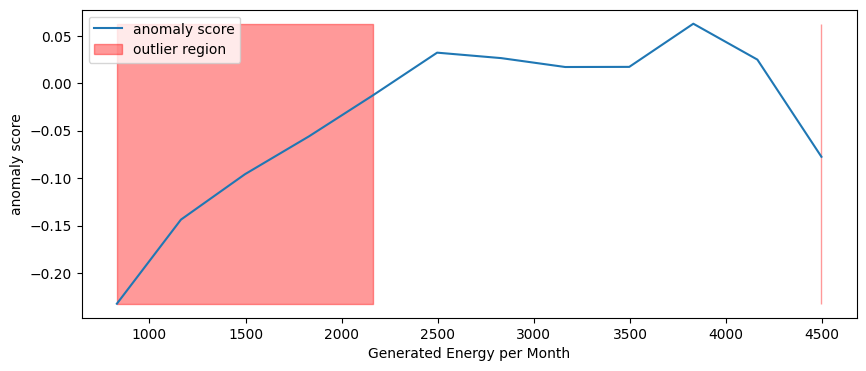

In [ ]:
# Distribution of generated energy per month
anomaly_score = isolation_forest.decision_function(xx)
outlier = isolation_forest.predict(xx)
plt.figure(figsize=(10,4))
plt.plot(xx, anomaly_score, label='anomaly score')
plt.fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score),
                 where=outlier==-1, color='r',
                 alpha=.4, label='outlier region')
plt.legend()
plt.ylabel('anomaly score')
plt.xlabel('Generated Energy per Month')
plt.show();

### Energy Use - Anomaly Detecion

In [ ]:
data = energy_per_day.filter(items=['Use'])
df = data

isolation_forest = IsolationForest(n_estimators=100)
isolation_forest.fit(data.values.reshape(-1, 1))
xx = np.linspace(data.min(), data.max(), len(data)).reshape(-1,1)

df['scores']=isolation_forest.decision_function(df[['Use']])
df['anomaly']=isolation_forest.predict(df[['Use']])
df.head(5)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but IsolationForest was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but IsolationForest was fitted without feature names
  warnings.warn(


Use    scores  anomaly
2016-01-01  1366.269517  0.068543        1
2016-01-02  1851.521067 -0.021031       -1
2016-01-03  1651.128133  0.003172        1
2016-01-04  1500.686017  0.046798        1
2016-01-05  1597.968867  0.036997        1

In [ ]:
anomaly=df.loc[df['anomaly']==-1]
anomaly_index=list(anomaly.index)
print(anomaly)

                    Use    scores  anomaly
2016-01-02  1851.521067 -0.021031       -1
2016-01-18  2245.475367 -0.092199       -1
2016-01-19  1927.057417 -0.038464       -1
2016-01-23  1811.468983 -0.035030       -1
2016-02-08  2132.309600 -0.086156       -1
...                 ...       ...      ...
2016-10-30   582.650200 -0.026658       -1
2016-11-21  1741.470633 -0.039766       -1
2016-11-24  2218.692083 -0.075000       -1
2016-12-05  1984.813883 -0.055121       -1
2016-12-16   273.442767 -0.230869       -1

[66 rows x 3 columns]


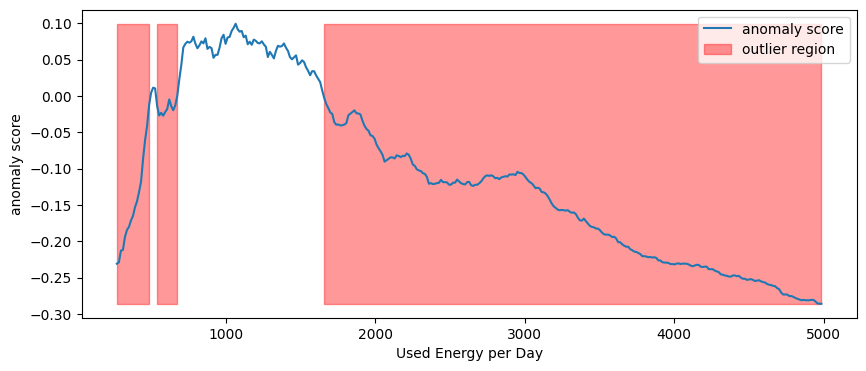

In [ ]:
# Distribution of use energy per day
anomaly_score = isolation_forest.decision_function(xx)
outlier = isolation_forest.predict(xx)
plt.figure(figsize=(10,4))
plt.plot(xx, anomaly_score, label='anomaly score')
plt.fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score),
                 where=outlier==-1, color='r',
                 alpha=.4, label='outlier region')
plt.legend()
plt.ylabel('anomaly score')
plt.xlabel('Used Energy per Day')
plt.show();

In [ ]:
data = energy_per_week.filter(items=['Use'])
df = data

isolation_forest = IsolationForest(n_estimators=100)
isolation_forest.fit(data.values.reshape(-1, 1))
xx = np.linspace(data.min(), data.max(), len(data)).reshape(-1,1)

df['scores']=isolation_forest.decision_function(df[['Use']])
df['anomaly']=isolation_forest.predict(df[['Use']])
df.head(5)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but IsolationForest was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but IsolationForest was fitted without feature names
  warnings.warn(


Use    scores  anomaly
2016-01-03   4868.918717 -0.031247       -1
2016-01-10  10281.065683  0.023610        1
2016-01-17  10365.530000  0.024788        1
2016-01-24  11446.274100 -0.021028       -1
2016-01-31   9294.364817  0.013983        1

In [ ]:
anomaly=df.loc[df['anomaly']==-1]
anomaly_index=list(anomaly.index)
print(anomaly)

                     Use    scores  anomaly
2016-01-03   4868.918717 -0.031247       -1
2016-01-24  11446.274100 -0.021028       -1
2016-02-14  11762.615333 -0.068358       -1
2016-05-29   3941.174633 -0.176651       -1
2016-06-26   4801.309567 -0.043311       -1
2016-07-17  14010.084417 -0.167415       -1
2016-07-31  20850.432700 -0.216871       -1
2016-08-14  22150.665567 -0.253907       -1
2016-08-21  17353.287067 -0.207026       -1


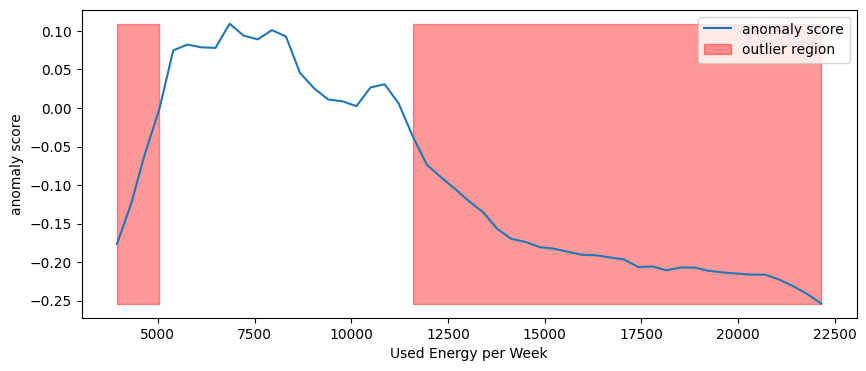

In [ ]:
# Distribution of use energy per week
anomaly_score = isolation_forest.decision_function(xx)
outlier = isolation_forest.predict(xx)
plt.figure(figsize=(10,4))
plt.plot(xx, anomaly_score, label='anomaly score')
plt.fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score),
                 where=outlier==-1, color='r',
                 alpha=.4, label='outlier region')
plt.legend()
plt.ylabel('anomaly score')
plt.xlabel('Used Energy per Week')
plt.show();

In [ ]:
data = energy_per_month.filter(items=['Use'])
df = data

isolation_forest = IsolationForest(n_estimators=100)
isolation_forest.fit(data.values.reshape(-1, 1))
xx = np.linspace(data.min(), data.max(), len(data)).reshape(-1,1)

df['scores']=isolation_forest.decision_function(df[['Use']])
df['anomaly']=isolation_forest.predict(df[['Use']])
df.head(5)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but IsolationForest was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but IsolationForest was fitted without feature names
  warnings.warn(


Use    scores  anomaly
2016-01-31  46256.153317 -0.001858       -1
2016-02-29  41558.035267  0.016820        1
2016-03-31  34026.880883  0.063826        1
2016-04-30  29662.845900  0.078783        1
2016-05-31  25550.843150  0.015773        1

In [ ]:
anomaly=df.loc[df['anomaly']==-1]
anomaly_index=list(anomaly.index)
print(anomaly)

                     Use    scores  anomaly
2016-01-31  46256.153317 -0.001858       -1
2016-07-31  52167.125350 -0.050664       -1
2016-08-31  61786.433333 -0.178926       -1
2016-12-31  20063.105200 -0.073986       -1


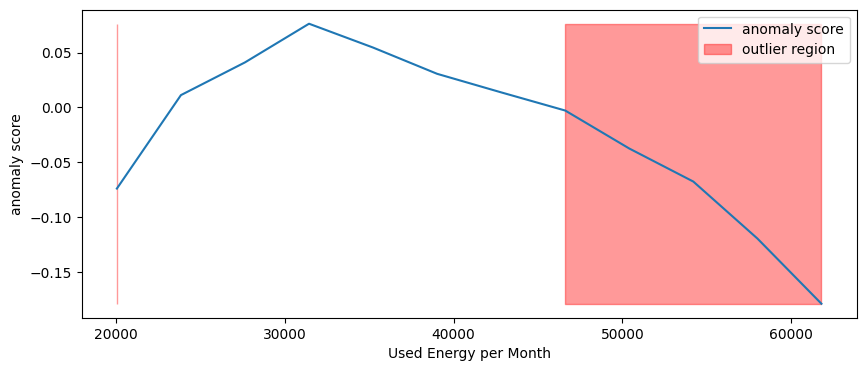

In [ ]:
# Distribution of use energy per month
anomaly_score = isolation_forest.decision_function(xx)
outlier = isolation_forest.predict(xx)
plt.figure(figsize=(10,4))
plt.plot(xx, anomaly_score, label='anomaly score')
plt.fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score),
                 where=outlier==-1, color='r',
                 alpha=.4, label='outlier region')
plt.legend()
plt.ylabel('anomaly score')
plt.xlabel('Used Energy per Month')
plt.show();

### Multivariate Anomaly Detection

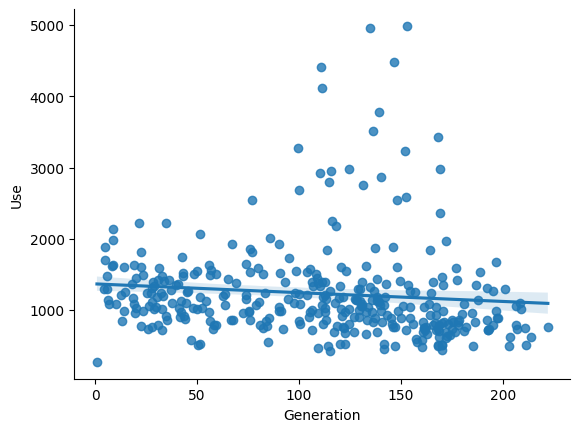

In [ ]:
# Generated vs Used Energy per day
sns.regplot(x="Generation", y="Use", data=energy_per_day)
sns.despine();

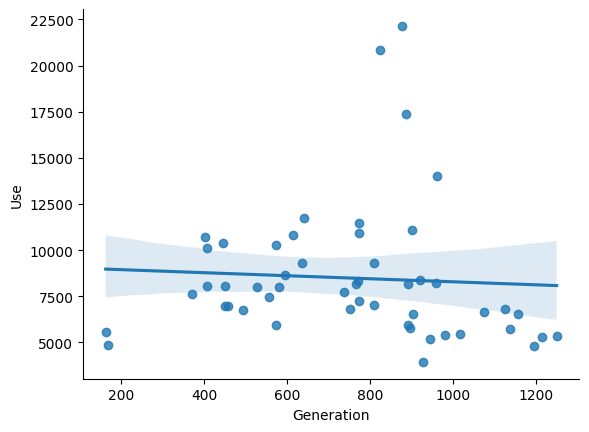

In [ ]:
# Generated vs Used Energy per week
sns.regplot(x="Generation", y="Use", data=energy_per_week)
sns.despine();

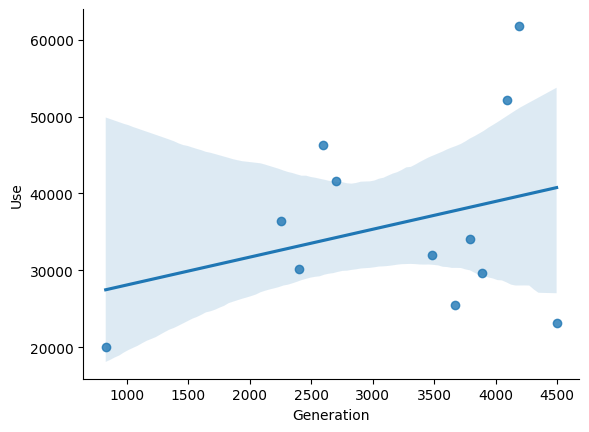

In [ ]:
# Generated vs Used Energy per month
sns.regplot(x="Generation", y="Use", data=energy_per_month)
sns.despine();

### Moving Average

#### Generation

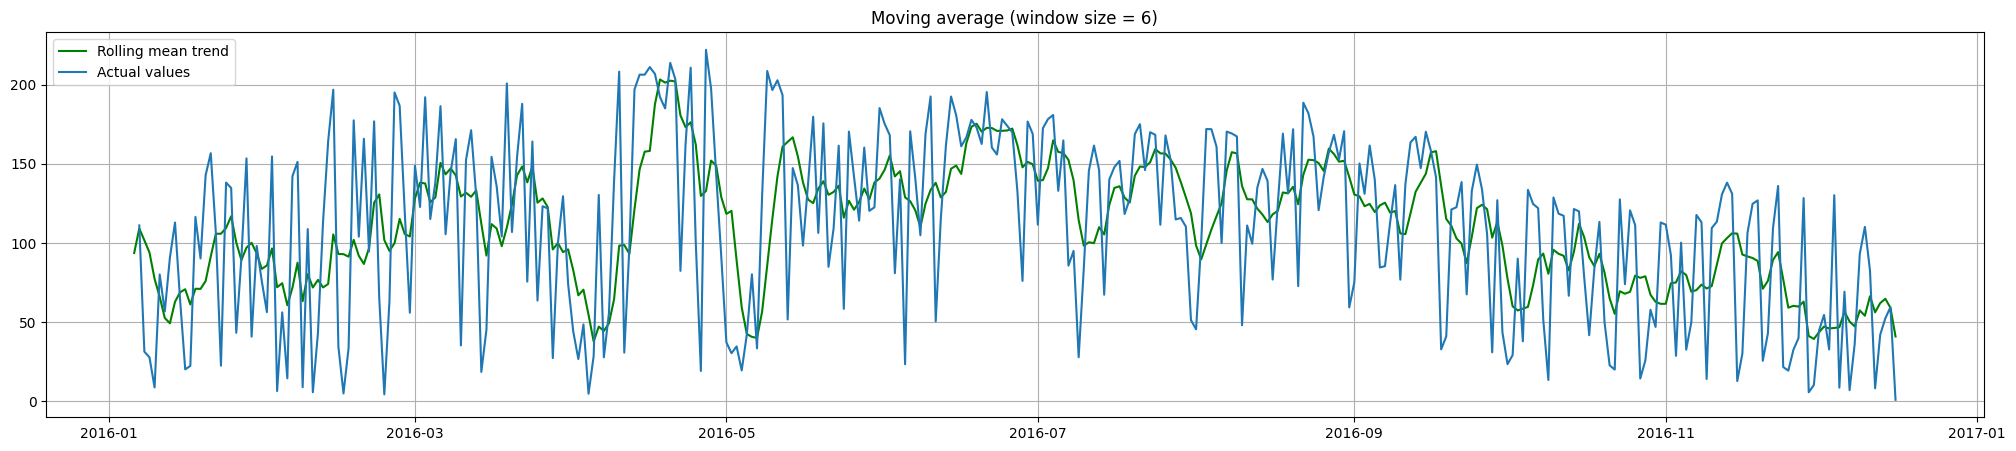

In [ ]:
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error

def plotMovingAverage(series, window, plot_intervals=False, scale=1.96, plot_anomalies=False):
  rolling_mean = series.rolling(window=window).mean()

  plt.figure(figsize=(25,5))
  plt.title("Moving average (window size = {})".format(window))
  plt.plot(rolling_mean, "g", label="Rolling mean trend")

  # Plot confidence intervals for smoothed values
  if plot_intervals:
      mae = mean_absolute_error(series[window:], rolling_mean[window:])
      deviation = np.std(series[window:] - rolling_mean[window:])
      lower_bond = rolling_mean - (mae + scale * deviation)
      upper_bond = rolling_mean + (mae + scale * deviation)
      plt.plot(upper_bond, "r--", label="Upper Bond / Lower Bond")
      plt.plot(lower_bond, "r--")

      # Having the intervals, find abnormal values
      if plot_anomalies:
          anomalies = pd.DataFrame(index=series.index, columns=series.columns)
          anomalies[series<lower_bond] = series[series<lower_bond]
          anomalies[series>upper_bond] = series[series>upper_bond]
          plt.plot(anomalies, "ro", markersize=10)

  plt.plot(series[window:], label="Actual values")
  plt.legend(loc="upper left")
  plt.grid(True)

n_samples = 24*30 # 1 month



data = energy_per_day.filter(items=['Generation'])
plotMovingAverage(data[:n_samples], window=6) # A window of 6 hours

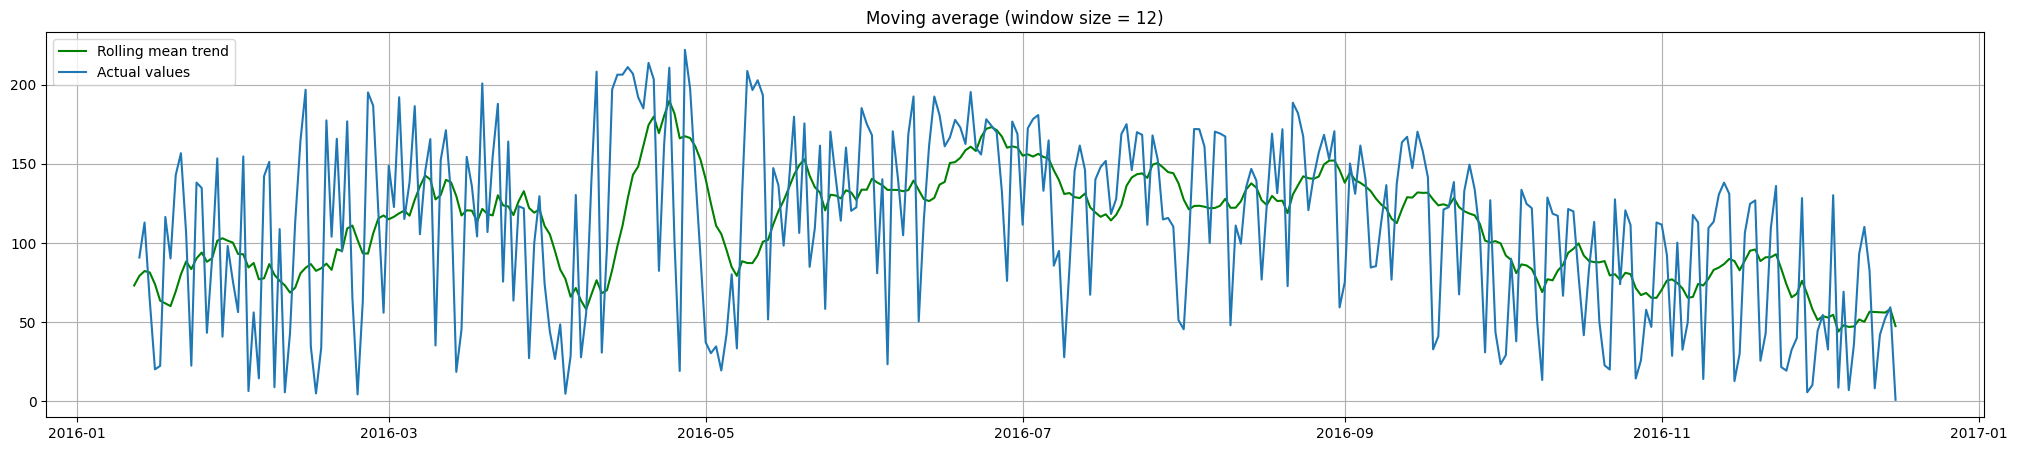

In [ ]:
plotMovingAverage(data[:n_samples], window=12) # A window of 12 hours

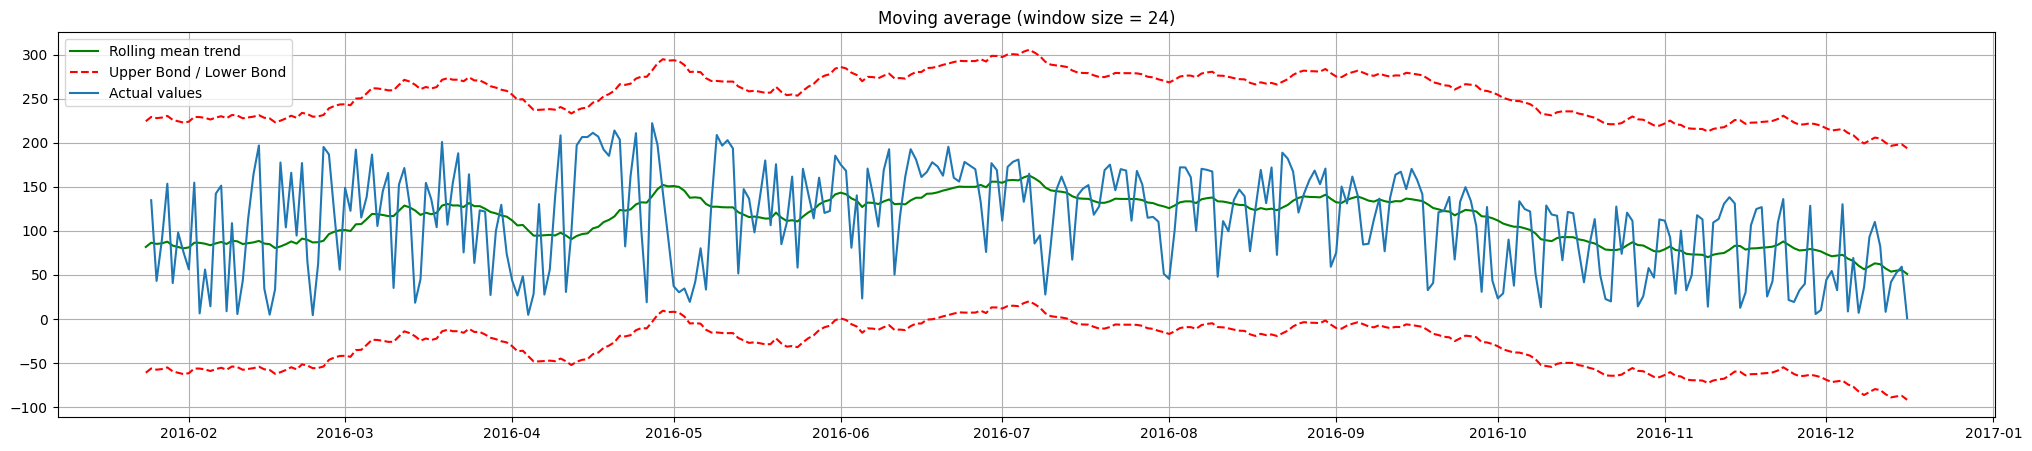

In [ ]:
plotMovingAverage(data[:n_samples], window=24, plot_intervals=True, plot_anomalies=True)

#### Use

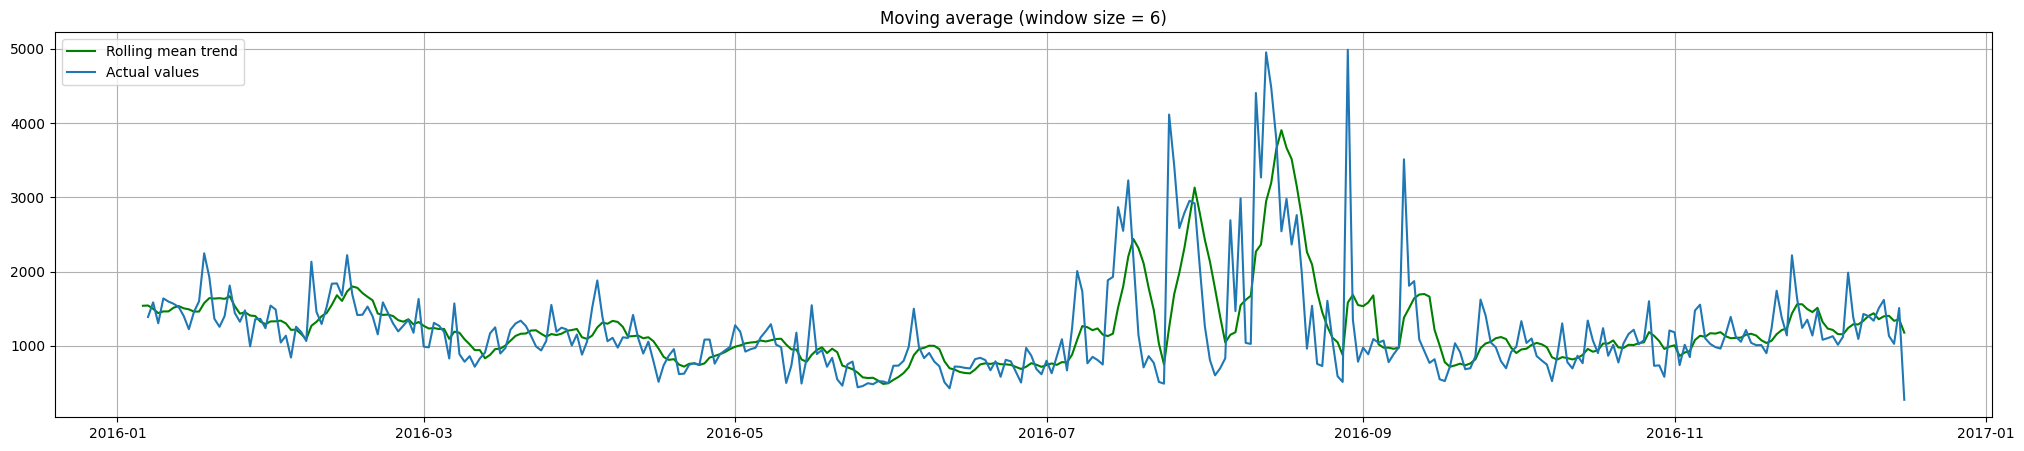

In [ ]:
data = energy_per_day.filter(items=['Use'])
plotMovingAverage(data[:n_samples], window=6) # A window of 6 hours

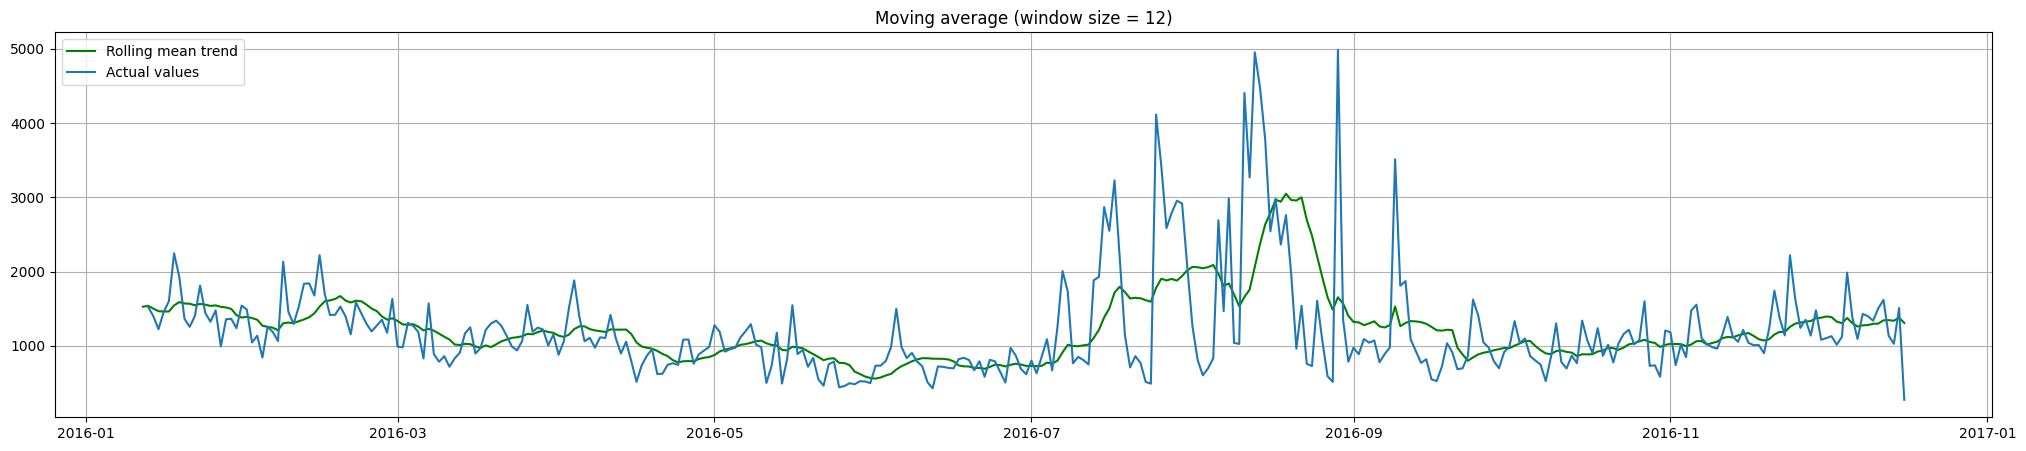

In [ ]:
plotMovingAverage(data[:n_samples], window=12) # A window of 12 hours

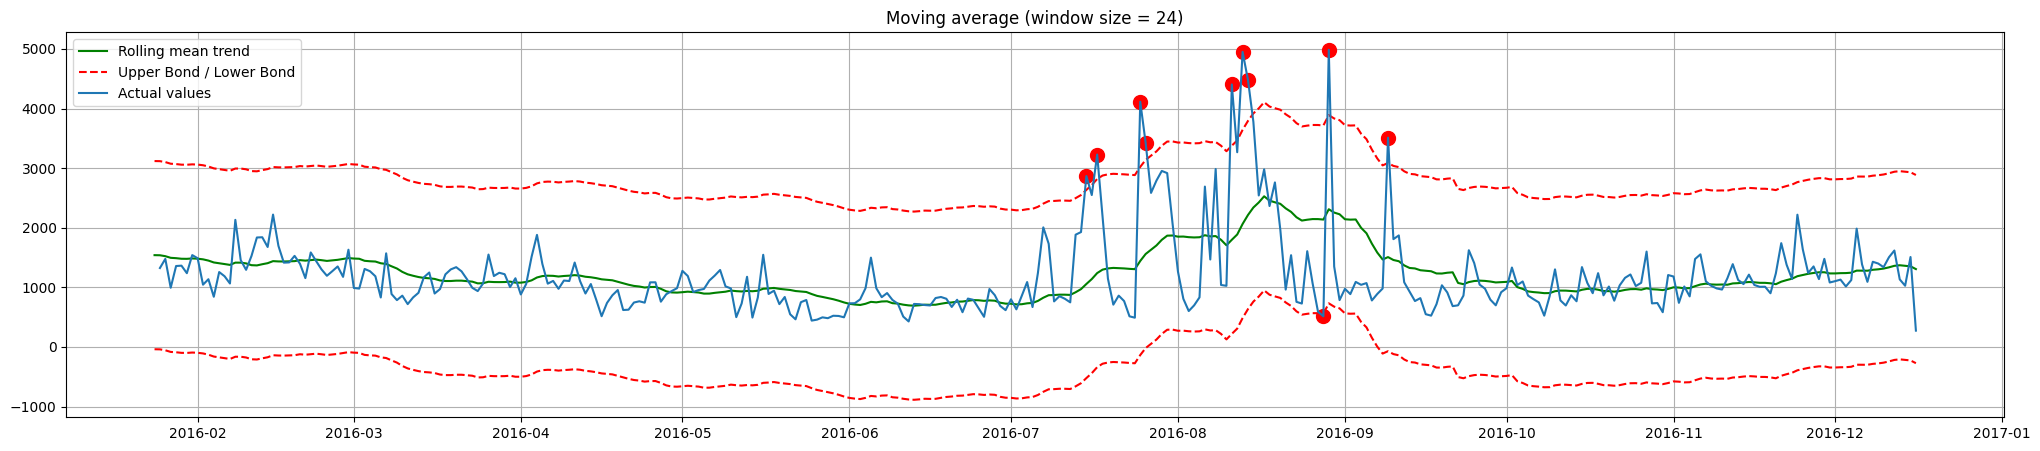

In [ ]:
plotMovingAverage(data[:n_samples], window=24, plot_intervals=True, plot_anomalies=True)

In [ ]:
home.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 503910 entries, 2016-01-01 05:00:00 to 2016-12-16 03:29:00
Freq: T
Data columns (total 24 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Use                        503910 non-null  float64
 1   Generation                 503910 non-null  float64
 2   Dishwasher                 503910 non-null  float64
 3   Home Office                503910 non-null  float64
 4   Fridge                     503910 non-null  float64
 5   Wine Cellar                503910 non-null  float64
 6   Garage Door                503910 non-null  float64
 7   Barn                       503910 non-null  float64
 8   Well                       503910 non-null  float64
 9   Microwave                  503910 non-null  float64
 10  Living Room                503910 non-null  float64
 11  Temperature                503910 non-null  float64
 12  Humidity                   503910 non-null  

## Part 7 - Baseline Model

### Sampling and Plotting

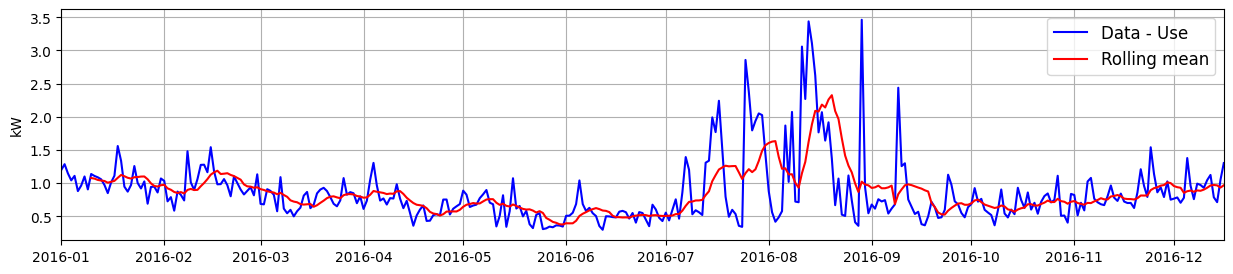

In [ ]:
# Data resampling by day
data_daily = home['Use'].resample('d').mean()
#Define la moving average
baseline = data_daily.rolling(window=10).mean()
#Plot
plt.figure(figsize=(15,3))
plt.plot(data_daily, c='blue',label='Data - Use')
plt.plot(baseline, c='red', label='Rolling mean')
plt.legend(fontsize=12)
plt.ylabel('kW')
plt.margins(x=0)
plt.grid()

Test MSE: 0.071
Test RMSE: 0.266
Test MAE: 0.177
Test MAPE: 0.236
Test MASE: 0.721
Test R^2 score: 0.077
R^2 manual: 0.0767596381423179


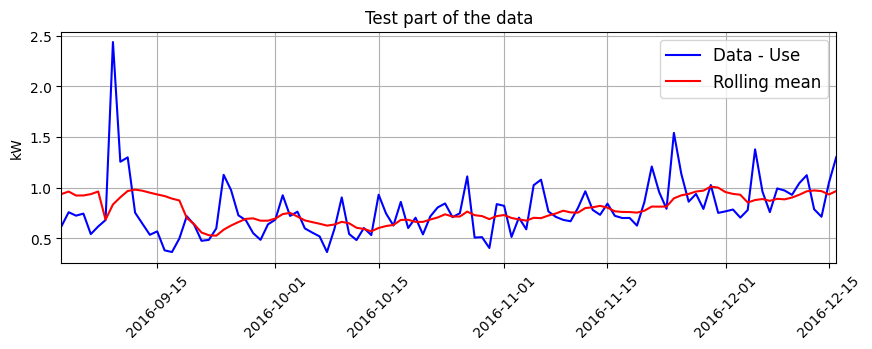

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

#Split time series and take the last 30% of it, like if it was the test part of the model
size = int(len(data_daily)*0.7)
train = data_daily[:size]
test = data_daily[size:]
#take moving average for this portion of the data
baseline_test = baseline.loc[test.index[0]:]
#Plot
plt.figure(figsize=(10,3))
plt.plot(test, c='blue',label='Data - Use')
plt.plot(baseline_test, c='red', label='Rolling mean')
plt.legend(fontsize=12)
plt.ylabel('kW')
plt.margins(x=0)
plt.title('Test part of the data'), plt.grid(), plt.xticks(rotation=45);

# calculate error
MAE = mean_absolute_error(test, baseline_test)
MAPE = np.mean(np.abs(baseline_test - test)/np.abs(test))
MASE = np.mean(np.abs(test - baseline_test))/(np.abs(np.diff(train)).sum()/(len(train)-1))
print('Test MSE: %.3f' % (mean_squared_error(test, baseline_test)))
print('Test RMSE: %.3f' % np.sqrt(mean_squared_error(test, baseline_test)))
print('Test MAE: %.3f' % MAE)
print('Test MAPE: %.3f' %MAPE)
print('Test MASE: %.3f' %MASE)
print('Test R^2 score: %.3f' % r2_score(test, baseline_test))

print('R^2 manual:', 1-(sum((baseline_test-test)**2)/sum((np.mean(test)-test)**2)))


## Part 8 - Time Series Forecasting using Arima model

Autocorrelation for 'use' =  0.6107009825029094


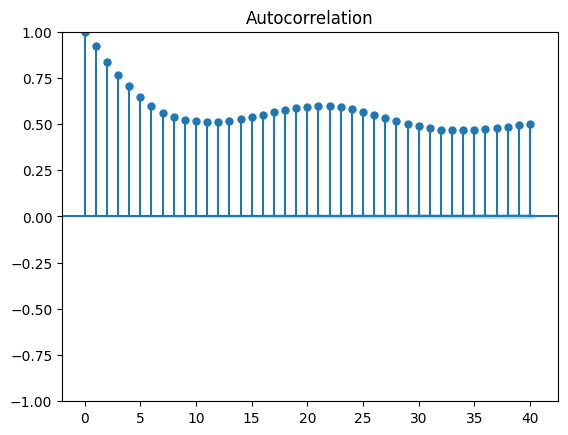

In [ ]:
#Autocorrelation plot is used to find the AR parameter p of the ARIMA model
print("Autocorrelation for 'use' = ", energy_per_day['Use'].autocorr())
fig= plot_acf(energy_data['Use'], lags=40)
plt.show()

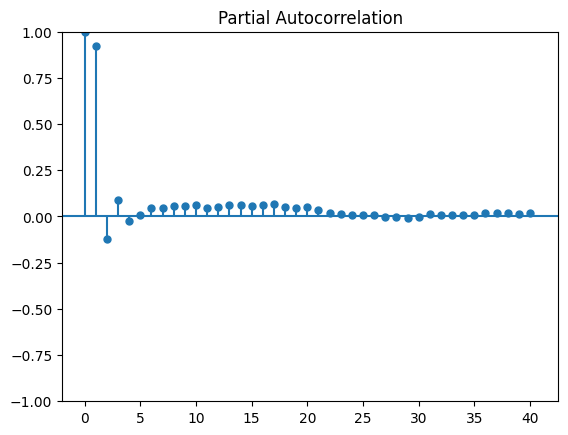

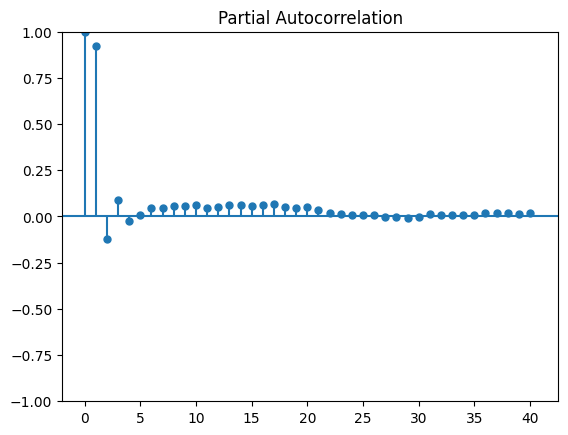

In [ ]:
plot_pacf(energy_data['Use'], lags=40)

**PACF plot cuts of quickly after 5**

In [ ]:
#We initially trained the model on a resampled dataset with 20,000 records but since it takes a
#lot of time in the order of several hours depending on the p,d,q combinations of ARIMA we have
#resampled the data with just 2000 records for the convenience of reducing the time of execution


home_arima_df= home.sample(n=2000)

**We experimented with different p and q values keeping d=1 for the ARIMA model and found that we get the best results with p=5, d=1 and q=0. Keeping the value q=1 or 2 was taking too long to train the data(more than two hours) with 20,000 records where as with q=0 we were able to train the model just under one hour(3571.43seconds) as indicated in the screenshot.**

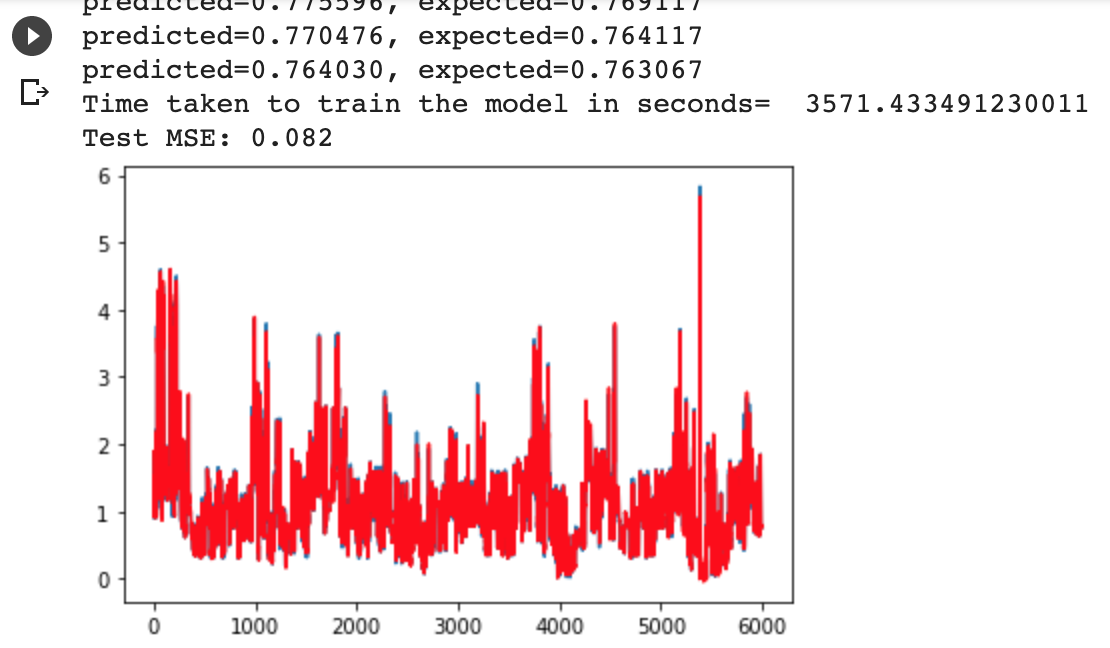

### Training an ARIMA model

predicted=0.737469, expected=0.038667
predicted=0.600871, expected=0.677917
predicted=0.683440, expected=2.282900
predicted=0.884590, expected=1.042283
predicted=0.938814, expected=4.447167
predicted=1.458639, expected=0.914667
predicted=1.630349, expected=0.381000
predicted=1.659436, expected=0.763900
predicted=1.595676, expected=1.824933
predicted=1.498002, expected=0.450700
predicted=1.638352, expected=1.657850
predicted=0.965562, expected=0.858200
predicted=0.976682, expected=1.071267
predicted=1.099488, expected=0.677017
predicted=1.122842, expected=0.071283
predicted=0.808926, expected=1.639450
predicted=0.956304, expected=0.361583
predicted=0.823088, expected=0.904400
predicted=0.800103, expected=0.531133
predicted=0.692806, expected=0.435517
predicted=0.645790, expected=0.790700
predicted=0.791205, expected=0.409833
predicted=0.577376, expected=0.556800
predicted=0.615550, expected=1.336250
predicted=0.636156, expected=0.649017
predicted=0.715106, expected=0.600283
predicted=0.

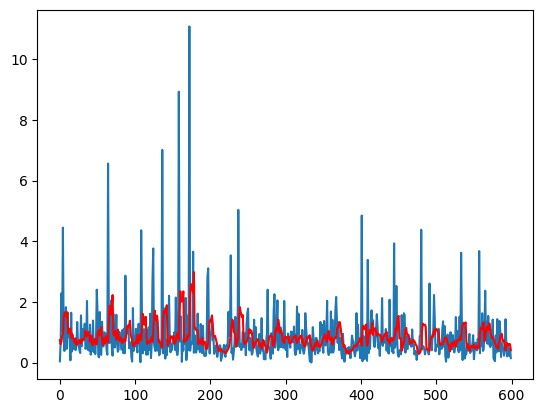

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import time
from matplotlib import pyplot as plt

X = home_arima_df['Use'].values
size = int(len(X) * 0.70)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
start_time = time.time()
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()[0]
    yhat = output
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

# Calculate evaluation metrics
mse = mean_squared_error(test, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test, predictions)
mape = np.mean(np.abs((test - predictions) / test)) * 100
mase = mae / np.mean(np.abs(np.diff(train)))  # Assuming training data is available
r2 = r2_score(test, predictions)

end_time = time.time()
time_taken = end_time - start_time
print('Time taken to train the model in seconds= ', time_taken)
print('Test MSE: %.3f' % mse)
print('Test RMSE: %.3f' % rmse)
print('Test MAE: %.3f' % mae)
print('Test MAPE: %.3f%%' % mape)
print('Test MASE: %.3f' % mase)
print('Test R^2: %.3f' % r2)

# Plot
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()



### Residual Analysis of the ARIMA model

<Axes: >

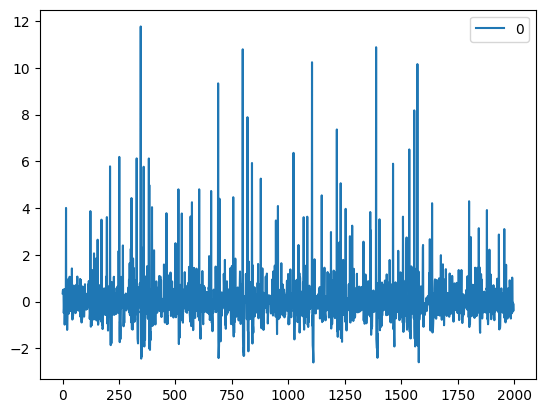

In [ ]:
from pandas import DataFrame
#We get the information if the model is accurate from the residual analysis
residuals= DataFrame(model_fit.resid)
residuals.plot()

**There is no visible trend or pattern in the residuals plot which indicates our model is accurate**

In [ ]:
residuals.describe()

0
count  1999.000000
mean     -0.000101
std       1.172981
min      -2.604229
25%      -0.504627
50%      -0.175977
75%       0.223865
max      11.765824

**The mean is centered around zero which indicates our model is accurate**

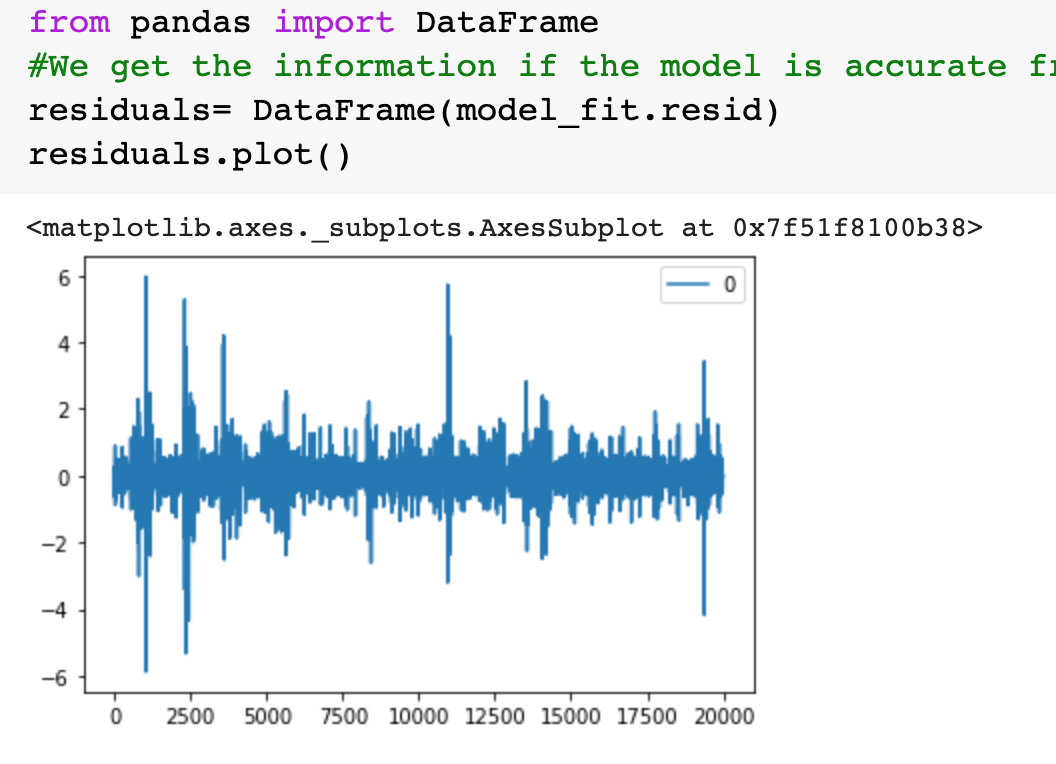

**Above is the residual plot for the model trained on 20,000 records with the parameter values p=5, d=1 and q=0. It clearly indicates there is no visible trend or pattern in the plot and hence no correlation between the residuals which indicates our model is accurate.**

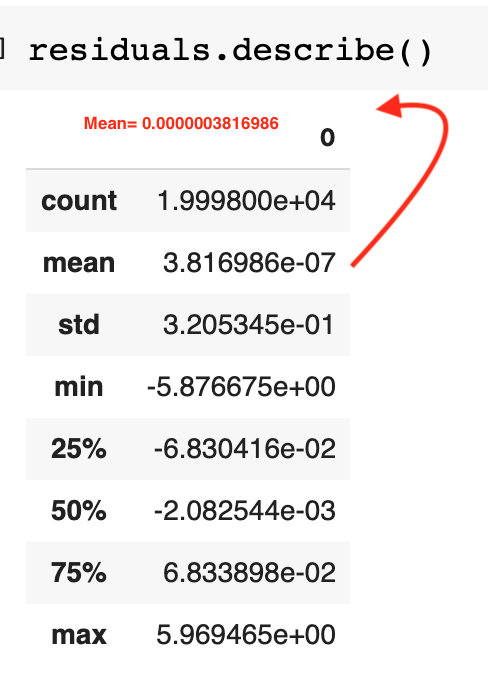

**The mean of the residuals is centered around 0 (3.816986e-07 = 0.0000003816986) for the model trained on 20,000 records which indicates our model is accurate**

## Part 9 - Time Series Forecasting using LSTM model

### Load and Preprocess Data


In [ ]:
home.columns


Index(['Use', 'Generation', 'Dishwasher', 'Home Office', 'Fridge',
       'Wine Cellar', 'Garage Door', 'Barn', 'Well', 'Microwave',
       'Living Room', 'Temperature', 'Humidity', 'Visibility',
       'Apparent Temperature', 'Pressure', 'Wind Speed', 'Cloud Cover',
       'Wind Bearing', 'Precipitation Intensity', 'Dew Point',
       'Precipitation Probability', 'Furnace', 'Kitchen'],
      dtype='object')

In [ ]:
# Reduce size of dataframe with only the columns we are interested in
data_daily = home[['Use', 'Furnace', 'Living Room', 'Barn', 'Temperature', 'Humidity',
                   'Apparent Temperature', 'Pressure', 'Cloud Cover','Wind Bearing', 'Precipitation Intensity',
                   'Dew Point', 'Precipitation Probability']]

# Rescale
data_daily = data_daily.resample('D').mean()

# Normalize the features
scaler = MinMaxScaler(feature_range=(0, 1))
data_daily[data_daily.columns[1:]] = scaler.fit_transform(data_daily[data_daily.columns[1:]])
scaler_target = MinMaxScaler(feature_range=(0, 1))
data_daily[['Use']] = scaler_target.fit_transform(data_daily[['Use']])


### Split Data into Train, Validation, and Test Sets

In [ ]:
size = int(len(data_daily) * 0.7)
data_daily_train = data_daily[:size]
data_daily_test = data_daily[size:]


### Feature and Target Construction



In [ ]:
X_train, X_test = [], []
Y_train, Y_test = [], []
n_past = 1
n_future = 1

# Construct training features and targets
for i in range(n_past, len(data_daily_train) - n_future + 1):
    X_train.append(data_daily_train.iloc[i - n_past:i, 0:data_daily.shape[1]])
    Y_train.append(data_daily_train.iloc[i + n_future - 1:i + n_future, 0])

# Construct testing features and targets
for i in range(n_past, len(data_daily_test) - n_future + 1):
    X_test.append(data_daily_test.iloc[i - n_past:i, 0:data_daily_test.shape[1]])
    Y_test.append(data_daily_test.iloc[i + n_future - 1:i + n_future, 0])

X_train, Y_train = np.array(X_train), np.array(Y_train)
X_test, Y_test = np.array(X_test), np.array(Y_test)



### Data Shapes


In [ ]:
print('X_train shape', X_train.shape)
print('X_test shape', X_test.shape)
print('Y_train shape', Y_train.shape)
print('Y_test shape', Y_test.shape)


X_train shape (244, 1, 13)
X_test shape (105, 1, 13)
Y_train shape (244, 1)
Y_test shape (105, 1)


### Define Model

In [ ]:
model = Sequential()
model.add(LSTM(25, activation='tanh', return_sequences = False, input_shape=(X_train.shape[1], X_train.shape[2])))
#model.add(LSTM(50, activation='relu', return_sequences = True))
#model.add(LSTM(15, activation='relu', return_sequences = False))
#model.add(Dropout(0.2))
model.add(Dense(Y_train.shape[1]))
model.compile(optimizer='adam', loss='mse')
model.summary()



Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 25)                3900      
                                                                 
 dense_2 (Dense)             (None, 1)                 26        
                                                                 
Total params: 3926 (15.34 KB)
Trainable params: 3926 (15.34 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Compile the Model


In [ ]:
model_fit = model.fit(X_train, Y_train, epochs=60, verbose=0)

Train_pred = model.predict(X_train, verbose=0)
Y_pred = model.predict(X_test, verbose=0)

### Plotting MSE

Train MSE minimum: 0.01641245186328888


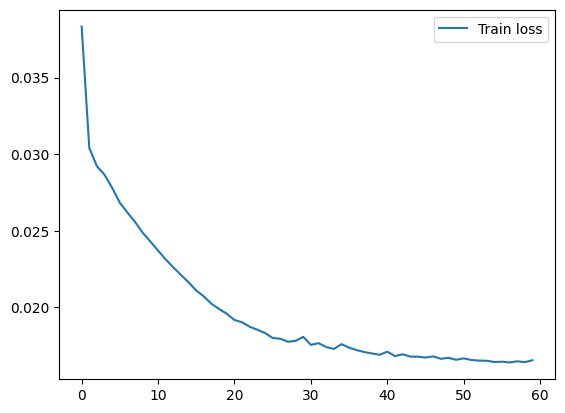

In [ ]:
plt.plot(model_fit.history['loss'], label='Train loss')
#plt.plot(model_fit.history['val_loss'], label='Validation loss')
plt.legend()
print('Train MSE minimum:', min(model_fit.history['loss']))
#print('Validation MSE minimum:', min(model_fit.history['val_loss']))

### Model Summary

### Scaling to Original Values

In [ ]:
#Invert scaling
data_daily[['Use']] = scaler_target.inverse_transform(data_daily[['Use']])
Y_pred = scaler_target.inverse_transform(Y_pred)
Train_pred = scaler_target.inverse_transform(Train_pred)

0.14031427654119946

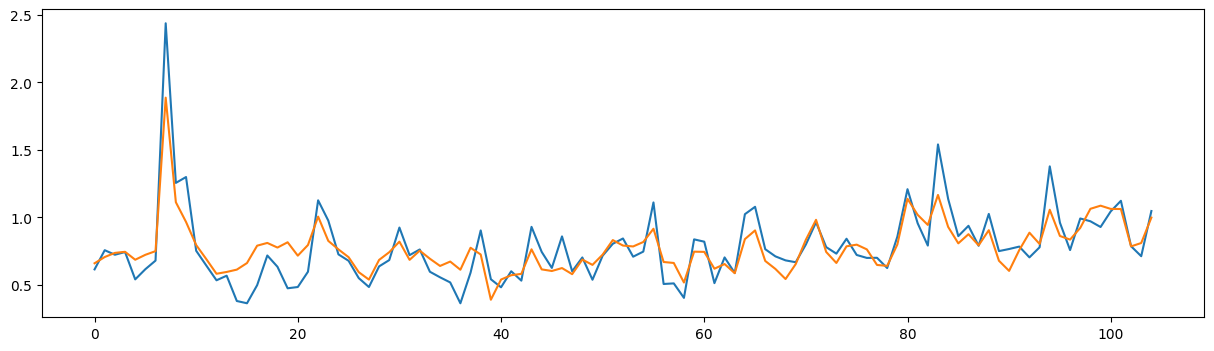

In [ ]:
plt.figure(figsize=(15,4))
plt.plot(data_daily[['Use']][size:-1].values)
plt.plot(Y_pred)
np.sqrt(mean_squared_error(Y_pred[:,0].tolist(), data_daily[['Use']][size:-1].values))

### Finding the values of R^2, MSE, RMSE, MAE, MASE and MAPE

<ipython-input-154-1c2a4dc251f3>:18: RuntimeWarning: divide by zero encountered in scalar divide
  MASE = MAE / np.mean(np.abs(Y_test[1:] - Y_test[:-1]))  # Assuming Y_test is a time series


Test MSE: 0.01969
Test RMSE: 0.14031
Test MAE: 0.105
Test MAPE: 0.148
Test MASE: inf
Test R^2 score: 0.736


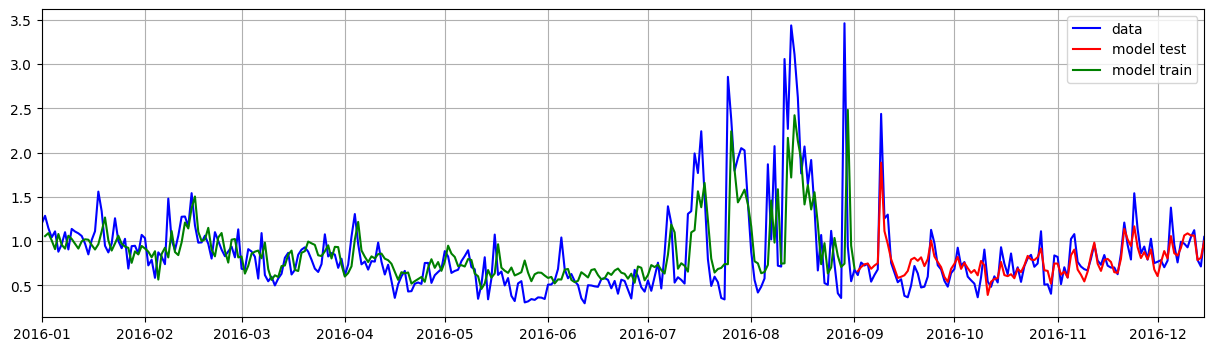

In [ ]:
Y_pred_series = pd.Series(Y_pred.flatten().tolist(), index=data_daily['Use'][size:-n_past].index)
Train_pred_series = pd.Series(Train_pred.flatten().tolist(), index=data_daily['Use'][n_past:size].index)
plt.figure(figsize=(15,4))
plt.plot(data_daily['Use'][:-n_past], c='blue', label='data')
plt.plot(Y_pred_series, c='red', label='model test')
plt.plot(Train_pred_series, c='green', label='model train')
plt.legend()
plt.grid(), plt.margins(x=0);
Y_test = data_daily['Use'][size:-n_past]



# Calculate evaluation metrics
MSE = mean_squared_error(Y_test, Y_pred)
RMSE = np.sqrt(MSE)
MAE = mean_absolute_error(Y_test, Y_pred)
MAPE = np.mean(np.abs(Y_pred[:,0] - Y_test.values)/np.abs(Y_test.values))
MASE = MAE / np.mean(np.abs(Y_test[1:] - Y_test[:-1]))  # Assuming Y_test is a time series
R2_score = r2_score(Y_test, Y_pred)

# Print evaluation metrics
print('Test MSE: %.5f' % MSE)
print('Test RMSE: %.5f' % RMSE)
print('Test MAE: %.3f' % MAE)
print('Test MAPE: %.3f' % MAPE)
print('Test MASE: %.3f' % MASE)
print('Test R^2 score: %.3f' % R2_score)

### Comparing MSE, MAE and R^2 of models.

In [ ]:
d = {'Model' : ['Baseline', 'Arima', 'LSTM'],
     'MSE': [0.071, 1.048, 0.01969],
     'MAE': [0.177, 0.596, 0.105],
     'R^2': [0.077, -0.180, 0.736],
     'RMSE': [0.266, 1.024, 0.13031],
     'MASE': [0.721, 0.692, 0.105]}
df = pd.DataFrame(data=d).set_index('Model')
df

MSE    MAE    R^2     RMSE   MASE
Model                                          
Baseline  0.07100  0.177  0.077  0.26600  0.721
Arima     1.04800  0.596 -0.180  1.02400  0.692
LSTM      0.01969  0.105  0.736  0.13031  0.105